# Normalize S2 data using NEON as a reference
step1: prepare S2 data: open S2 safe file in PCI and open 20m bands and export to a tiff file (PCI inlcuding 10m B2,3,4 in 20m as well) (not in the code)<br>
step2: subset 20m S2 using NEON 10m band as a reference using PCI<br>
step3: using GDAL the resampling method to generate 60m data for S2 and NEON in order to smooth the images<br>
step4: using NEON 60m data as the reference and S2 as input to generate linear coefficents using stats.theilslopes<br>
step5: read S2 20m file and normalizing and genereate 20m normalized S2<br>
step6: generate a 20m NEON data using GDAL average resamling method for the comparsion of the normalized S2<br>
step7: verify the normalized result through ploting normalized S2 and NEON 20,  RMSE, SSIM and R2_score.<br>

The code is implemented in an automatics way for all sites; for some site, due to the shape size not the same, an individual procedure is applied in a sepereated section.

In [1]:
# from scipy import interpolate
import numpy as np
import pandas as pd
from osgeo import gdal, osr
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import datetime
from sklearn.metrics import mean_squared_error 
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import r2_score

In [2]:
NEON_dir='F:/neon/normalization/NEON/'
S2_dir='F:/neon/normalization/S2/'

In [3]:
bands_related= [{'band': 'B2', 'NEON':2, 'S2':1}, {'band': 'B3', 'NEON':3, 'S2':2}, {'band': 'B4', 'NEON':4, 'S2':3}, {'band': 'B5', 'NEON':5, 'S2':5}, {'band': 'B6', 'NEON':6, 'S2':6}, 
                {'band': 'B7', 'NEON':7, 'S2':7},  {'band': 'B8', 'NEON':8, 'S2':4},  {'band': 'B8A', 'NEON':9, 'S2':8},  {'band': 'B11', 'NEON':12, 'S2':9},  {'band': 'B12', 'NEON':13, 'S2':10}] 

HOPB
F:/neon/normalization/S2/S2_20m_HOPB.tif
F:/neon/normalization/NEON/NEON_D01_HOPB_DP1_20190826_172857_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_HOPB.tif
F:/neon/normalization/NEON/NEON_60m_HOPB.tif
Band B2
RMSE: 0.013161264029222495 SSIM: 0.6313129178915047 R2: -5.692308532182343 60m before Norm
***************************************************************************************************************************


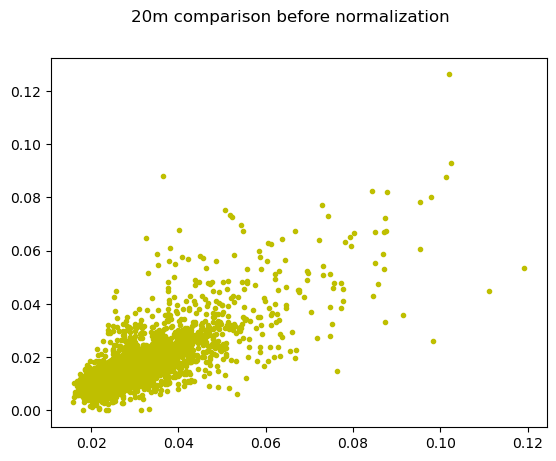

20m before Norm {'B2_RMSE': 0.013711456859065033, 'B2_SSIM': 0.5747523506701921, 'B2_R2': -3.1361047640248465}


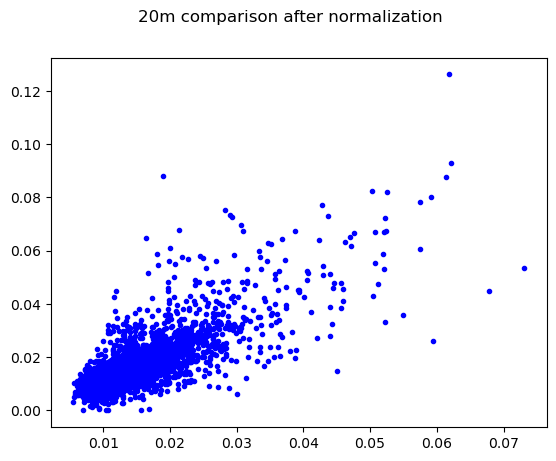

20m After norm {'B2_norm_RMSE': 0.004020341001273903, 'B2_norm_SSIM': 0.6846427343093099, 'B2_norm_R2': 0.644409532947231}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.015631560030483185 SSIM: 0.7087873082472733 R2: -5.234817016476367 60m before Norm
***************************************************************************************************************************


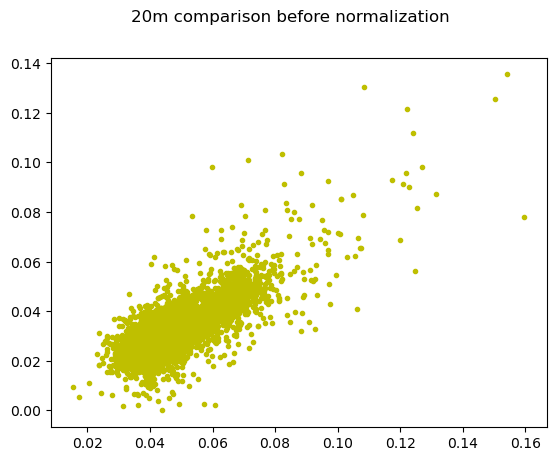

20m before Norm {'B3_RMSE': 0.016366922978798607, 'B3_SSIM': 0.612461172176995, 'B3_R2': -2.9608643154403222}


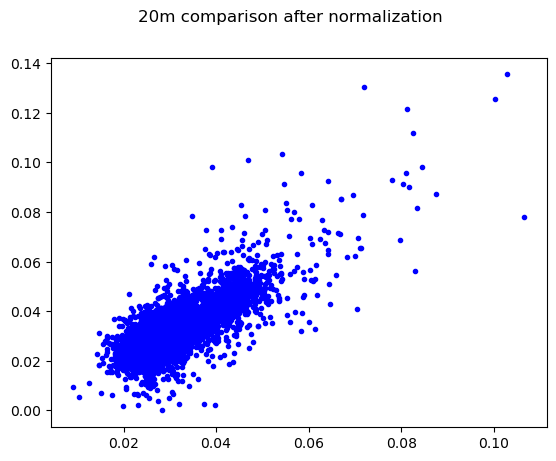

20m After norm {'B3_norm_RMSE': 0.005204445309935915, 'B3_norm_SSIM': 0.5999246472623786, 'B3_norm_R2': 0.5994979103756243}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.011689628398704802 SSIM: 0.7372840755128823 R2: -1.227847918335189 60m before Norm
***************************************************************************************************************************


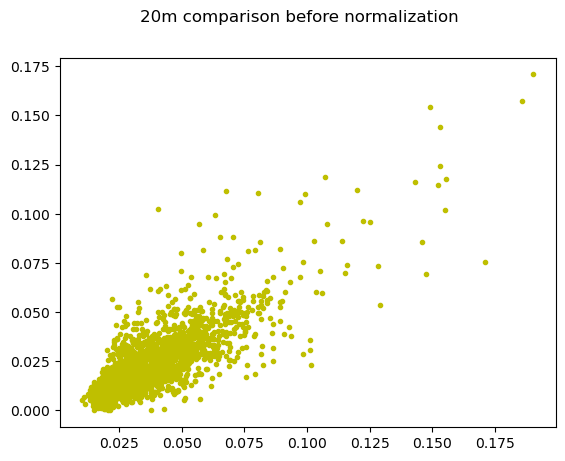

20m before Norm {'B4_RMSE': 0.012725608787579654, 'B4_SSIM': 0.6797762872399051, 'B4_R2': -0.6332719842797188}


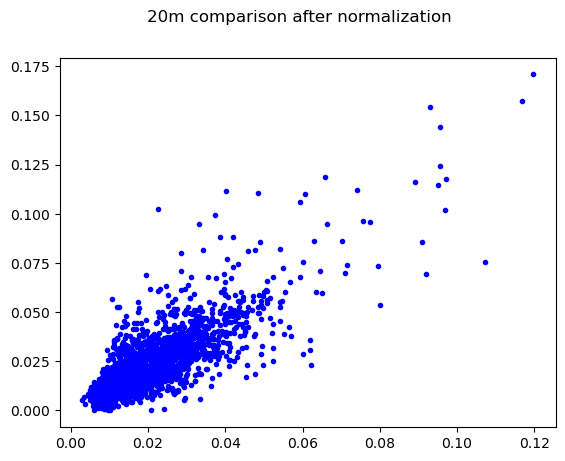

20m After norm {'B4_norm_RMSE': 0.005061736413908441, 'B4_norm_SSIM': 0.8165388320452532, 'B4_norm_R2': 0.741595288200249}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.027805212480970128 SSIM: 0.6919379705142733 R2: -7.6329706300727125 60m before Norm
***************************************************************************************************************************


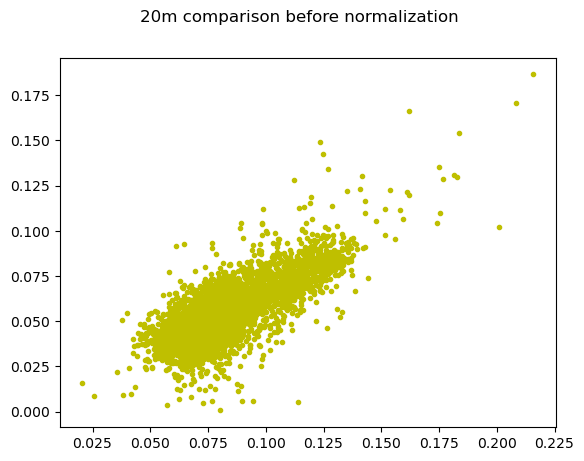

20m before Norm {'B5_RMSE': 0.02863517270614515, 'B5_SSIM': 0.5834515420460444, 'B5_R2': -4.520972428604827}


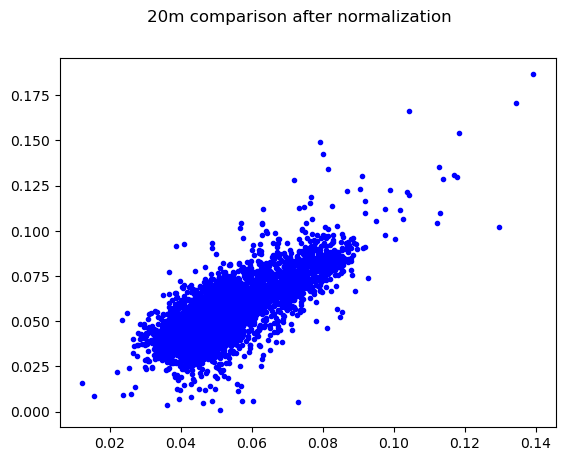

20m After norm {'B5_norm_RMSE': 0.007826777922911936, 'B5_norm_SSIM': 0.5694191738907919, 'B5_norm_R2': 0.5875398576338842}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.03270772179127042 SSIM: 0.6342255967246896 R2: -0.08268698980822342 60m before Norm
***************************************************************************************************************************


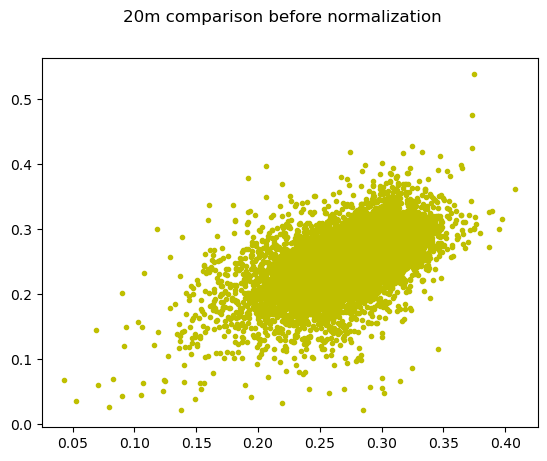

20m before Norm {'B6_RMSE': 0.04290328195324665, 'B6_SSIM': 0.4174699080105448, 'B6_R2': -0.0458887927304934}


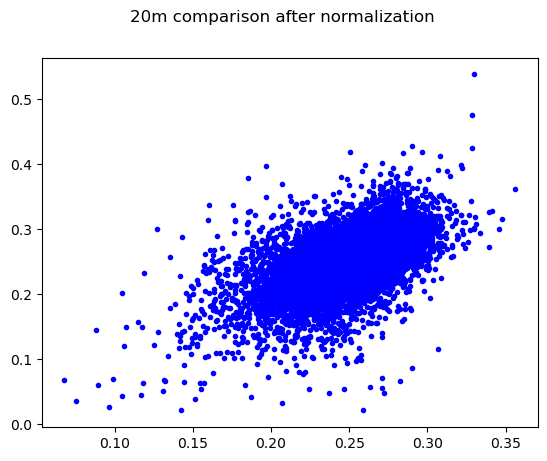

20m After norm {'B6_norm_RMSE': 0.034528482431494305, 'B6_norm_SSIM': 0.3798103400867742, 'B6_norm_R2': 0.32257774475560064}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.08659018720894875 SSIM: 0.6373854976058471 R2: -5.482971090750674 60m before Norm
***************************************************************************************************************************


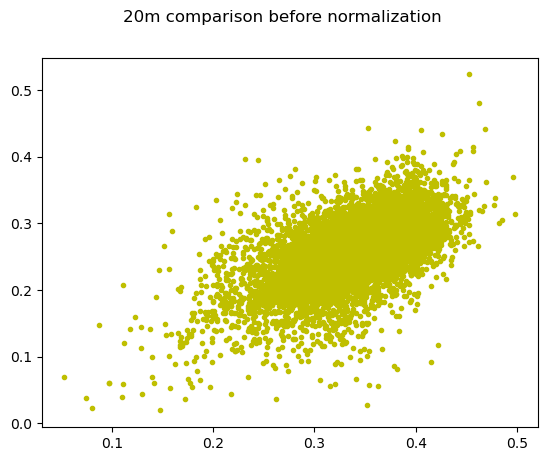

20m before Norm {'B7_RMSE': 0.0917520955224967, 'B7_SSIM': 0.43248552998066003, 'B7_R2': -3.157648898193182}


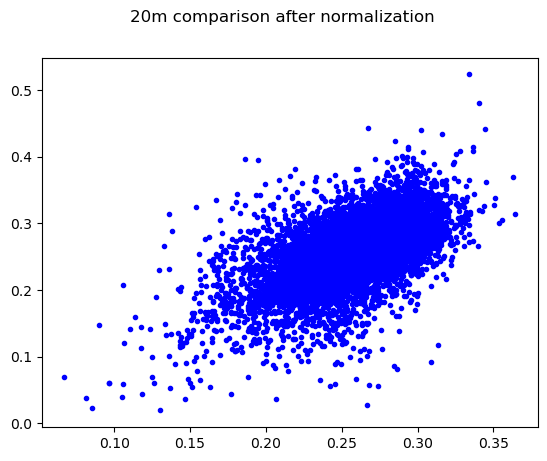

20m After norm {'B7_norm_RMSE': 0.035888736277637605, 'B7_norm_SSIM': 0.3911608283139593, 'B7_norm_R2': 0.3638900920993726}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.1376937367634628 SSIM: 0.5743218847328463 R2: -22.143256910955976 60m before Norm
***************************************************************************************************************************


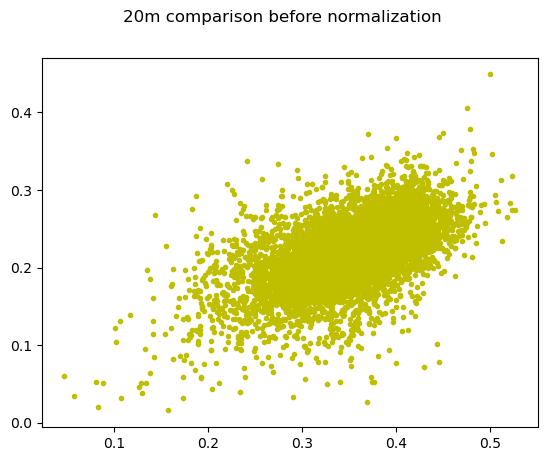

20m before Norm {'B8_RMSE': 0.140866236674928, 'B8_SSIM': 0.40533404902650033, 'B8_R2': -12.738755640376262}


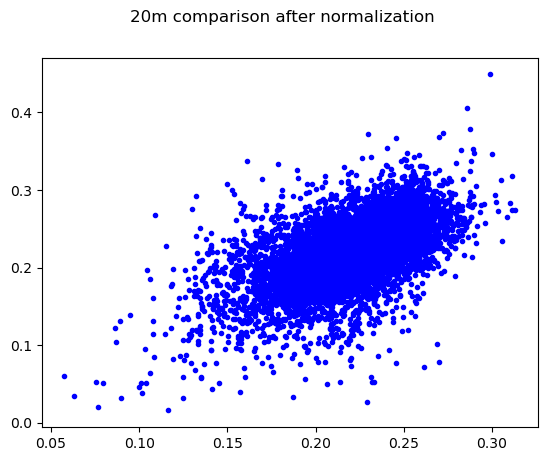

20m After norm {'B8_norm_RMSE': 0.03085853539701187, 'B8_norm_SSIM': 0.3916624683410505, 'B8_norm_R2': 0.34069830218692587}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.1490897465267079 SSIM: 0.570803676665729 R2: -26.914476431838583 60m before Norm
***************************************************************************************************************************


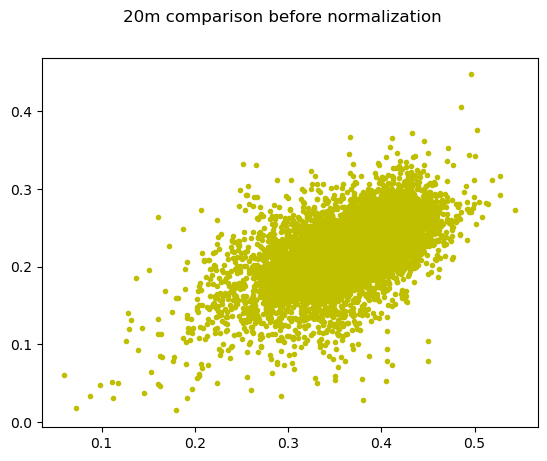

20m before Norm {'B8A_RMSE': 0.15149541088353263, 'B8A_SSIM': 0.42365977191042725, 'B8A_R2': -15.377220752531187}


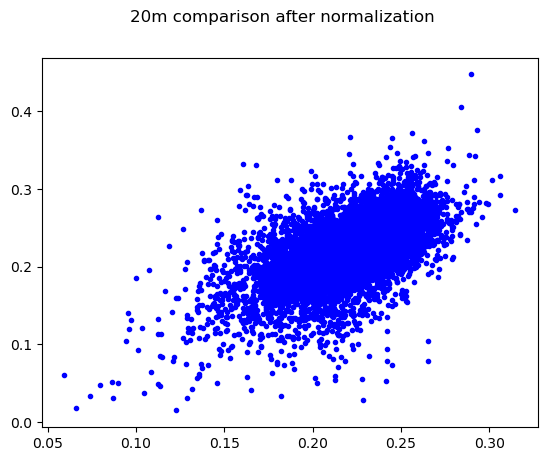

20m After norm {'B8A_norm_RMSE': 0.029776523455741156, 'B8A_norm_SSIM': 0.39747430487980073, 'B8A_norm_R2': 0.36731253612416026}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.06372756496526388 SSIM: 0.6632270446619064 R2: -12.587196482048219 60m before Norm
***************************************************************************************************************************


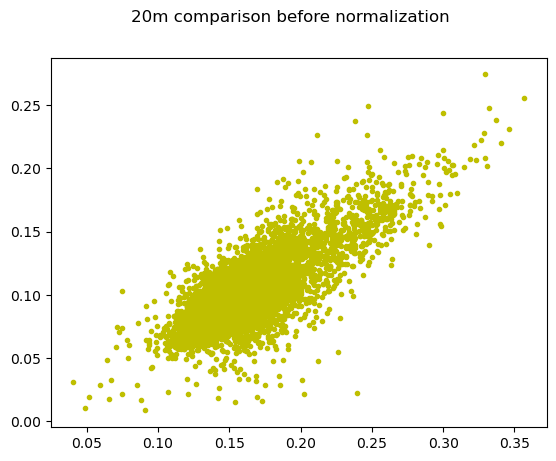

20m before Norm {'B11_RMSE': 0.06491239773063387, 'B11_SSIM': 0.5684210647559006, 'B11_R2': -7.4703686614663045}


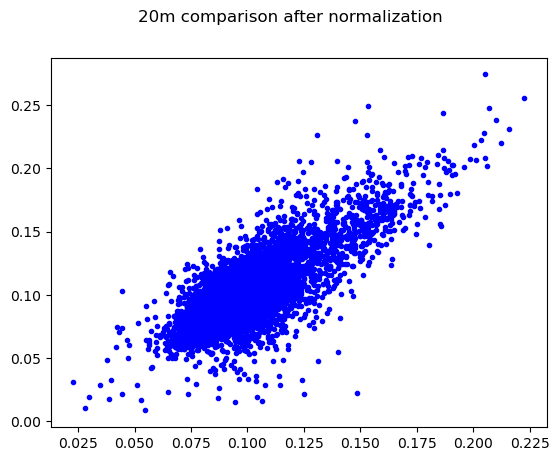

20m After norm {'B11_norm_RMSE': 0.01431527411043595, 'B11_norm_SSIM': 0.5501513678696871, 'B11_norm_R2': 0.5880482550449214}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.02721482798073089 SSIM: 0.7775497263166598 R2: -2.9716400302710655 60m before Norm
***************************************************************************************************************************


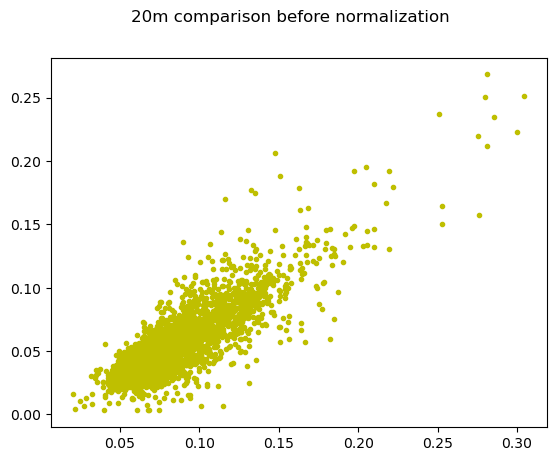

20m before Norm {'B12_RMSE': 0.02830549790639026, 'B12_SSIM': 0.7098440273897006, 'B12_R2': -1.677020106497673}


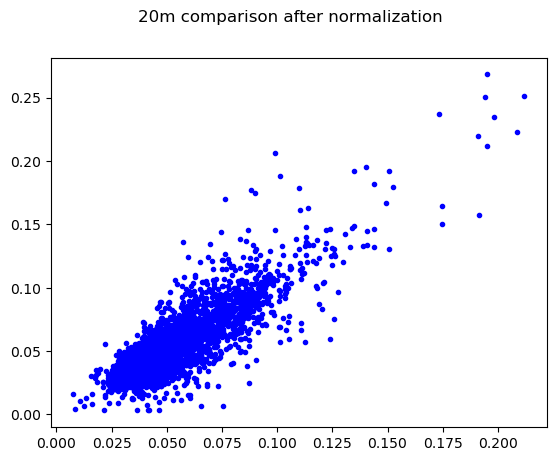

20m After norm {'B12_norm_RMSE': 0.008853100144169849, 'B12_norm_SSIM': 0.7310062994526515, 'B12_norm_R2': 0.7381209303322199}
----------------------------------------------------------------------------------------------------------------------
SERC
F:/neon/normalization/S2/S2_20m_SERC.tif
F:/neon/normalization/NEON/NEON_D02_SERC_DP1_20210811_142655_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_SERC.tif
F:/neon/normalization/NEON/NEON_60m_SERC.tif
Band B2
RMSE: 0.026867929521004953 SSIM: 0.4522334310562652 R2: -10.397906175511624 60m before Norm
***************************************************************************************************************************


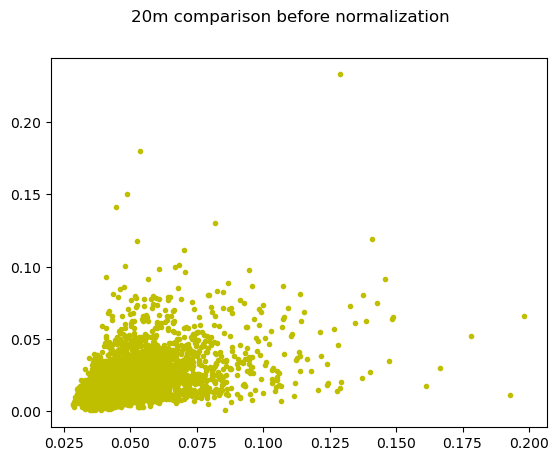

20m before Norm {'B2_RMSE': 0.028057340324513305, 'B2_SSIM': 0.40496155139355533, 'B2_R2': -6.514092590627796}


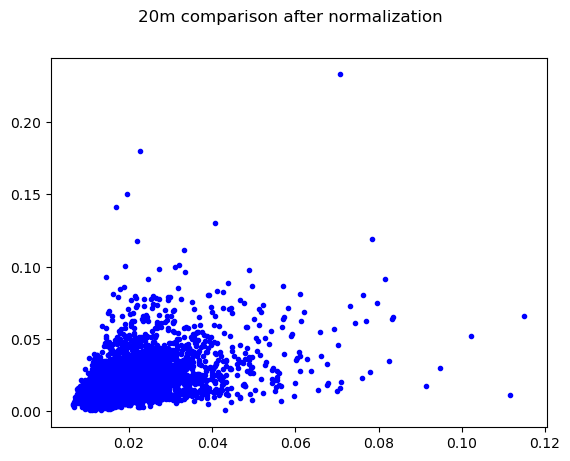

20m After norm {'B2_norm_RMSE': 0.008188703432593992, 'B2_norm_SSIM': 0.5709886582087246, 'B2_norm_R2': 0.35995010945315586}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.0281984242033925 SSIM: 0.5533541577125435 R2: -5.232164045509245 60m before Norm
***************************************************************************************************************************


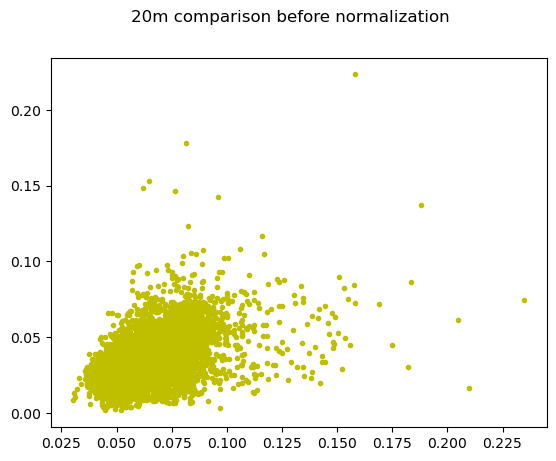

20m before Norm {'B3_RMSE': 0.0298537776281559, 'B3_SSIM': 0.42908996422672196, 'B3_R2': -3.932373744874768}


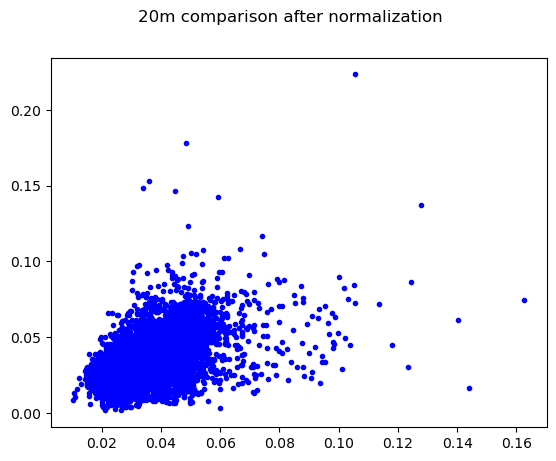

20m After norm {'B3_norm_RMSE': 0.010674439225276779, 'B3_norm_SSIM': 0.4597988394017518, 'B3_norm_R2': 0.3694093485175599}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.02220303006970172 SSIM: 0.5356664493788527 R2: -4.1727264295490905 60m before Norm
***************************************************************************************************************************


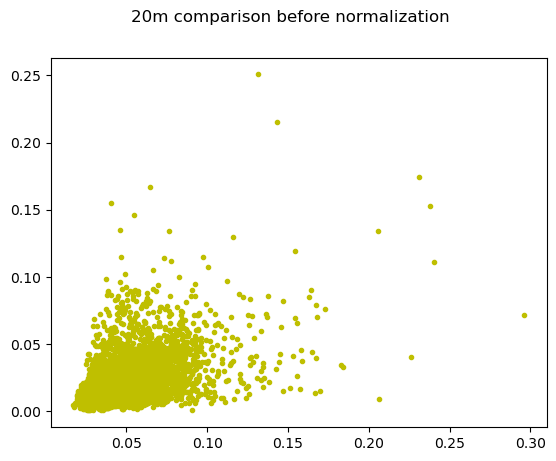

20m before Norm {'B4_RMSE': 0.024555837055760955, 'B4_SSIM': 0.49974443091866155, 'B4_R2': -2.7951231614848204}


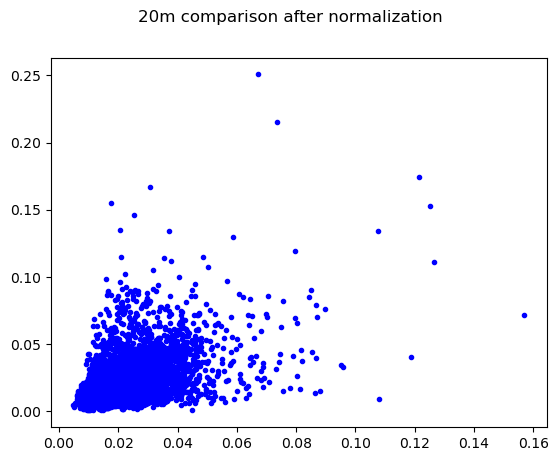

20m After norm {'B4_norm_RMSE': 0.00978622257862708, 'B4_norm_SSIM': 0.6347035039297129, 'B4_norm_R2': 0.3972370260152712}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.04298699203031155 SSIM: 0.5485788019108006 R2: -7.334346246351979 60m before Norm
***************************************************************************************************************************


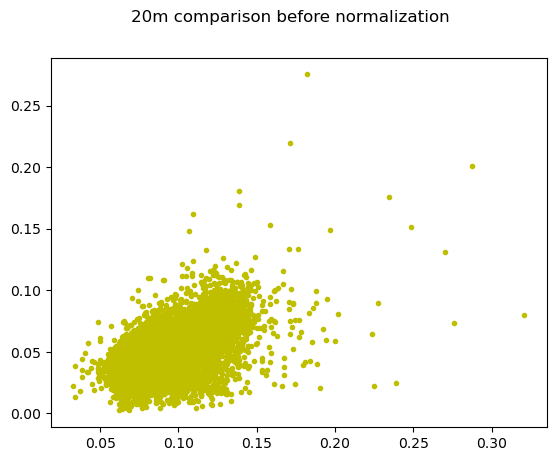

20m before Norm {'B5_RMSE': 0.044788888882240745, 'B5_SSIM': 0.41680153464927083, 'B5_R2': -5.385834222129992}


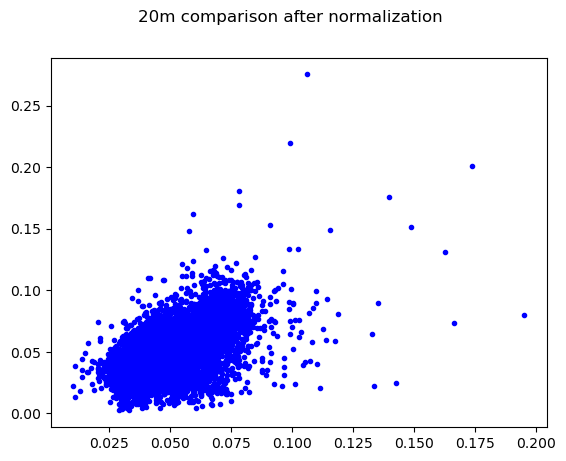

20m After norm {'B5_norm_RMSE': 0.013536656626821108, 'B5_norm_SSIM': 0.41974654391706073, 'B5_norm_R2': 0.41668937391167826}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.060109321802702245 SSIM: 0.3882368176627286 R2: -0.8325538658750371 60m before Norm
***************************************************************************************************************************


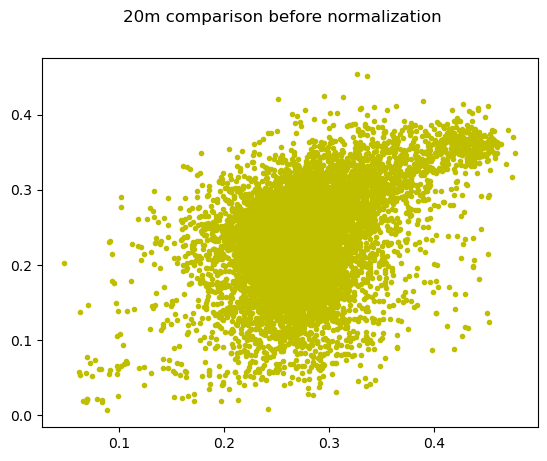

20m before Norm {'B6_RMSE': 0.07334296872413436, 'B6_SSIM': 0.14235762559326223, 'B6_R2': -0.6382038267641175}


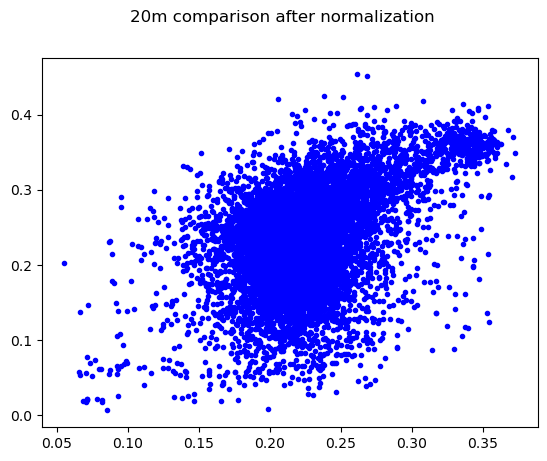

20m After norm {'B6_norm_RMSE': 0.05177652643457104, 'B6_norm_SSIM': 0.11089936446432795, 'B6_norm_R2': 0.1835740719836484}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.12124010235121527 SSIM: 0.4230509100802692 R2: -5.156016143413903 60m before Norm
***************************************************************************************************************************


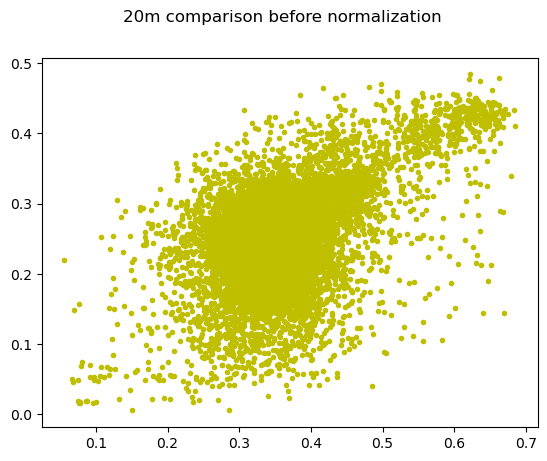

20m before Norm {'B7_RMSE': 0.13149430074121787, 'B7_SSIM': 0.1836989949205399, 'B7_R2': -3.3258238359038366}


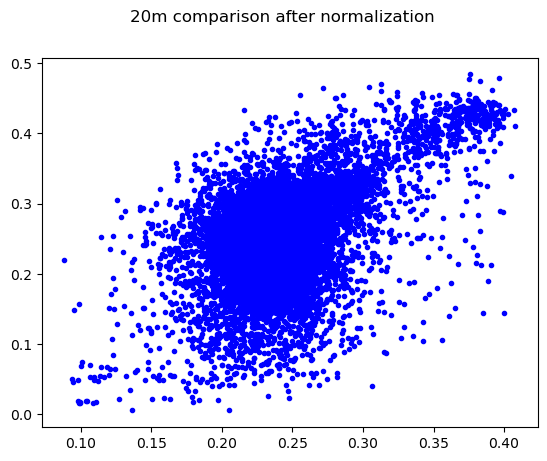

20m After norm {'B7_norm_RMSE': 0.054535857222490235, 'B7_norm_SSIM': 0.11417874477557564, 'B7_norm_R2': 0.25592064065399556}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.1584905639252663 SSIM: 0.3908374619708108 R2: -14.178064410028469 60m before Norm
***************************************************************************************************************************


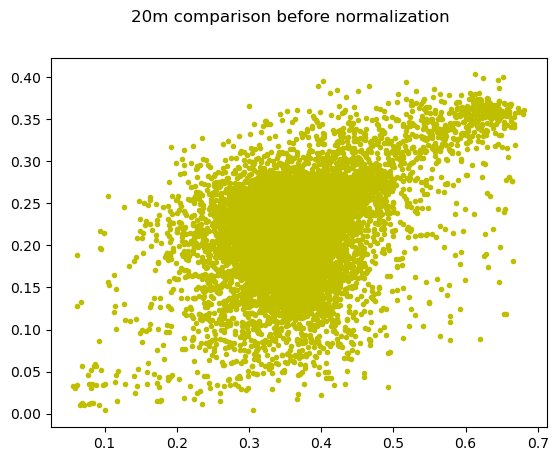

20m before Norm {'B8_RMSE': 0.16671582779968, 'B8_SSIM': 0.1389896877099672, 'B8_R2': -8.820658169748766}


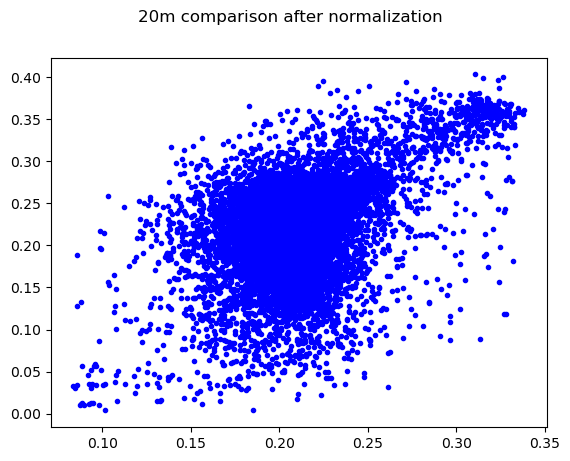

20m After norm {'B8_norm_RMSE': 0.04745410881881284, 'B8_norm_SSIM': 0.07032913086915428, 'B8_norm_R2': 0.20432709009169703}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.18358167698369354 SSIM: 0.38114583763702226 R2: -20.139913837013204 60m before Norm
***************************************************************************************************************************


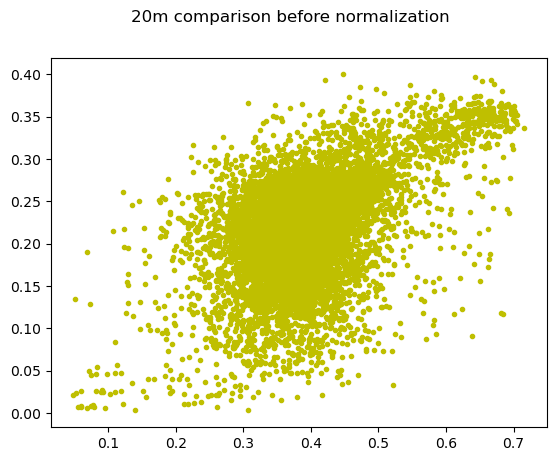

20m before Norm {'B8A_RMSE': 0.19001953673244595, 'B8A_SSIM': 0.1911720138576521, 'B8A_R2': -12.134680095658855}


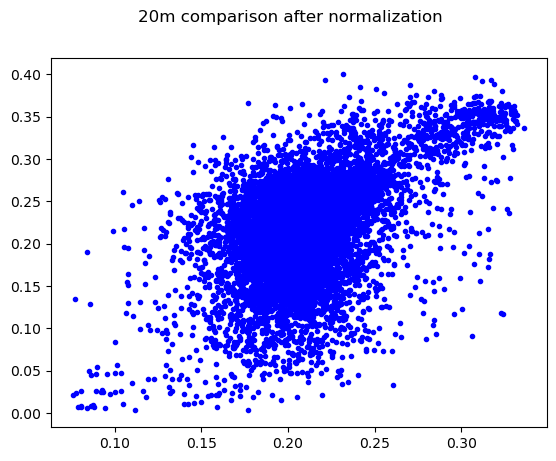

20m After norm {'B8A_norm_RMSE': 0.04581698649088262, 'B8A_norm_SSIM': 0.11128134921943597, 'B8A_norm_R2': 0.23638221999332498}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.09425512455064004 SSIM: 0.5036862229938991 R2: -12.482925611577413 60m before Norm
***************************************************************************************************************************


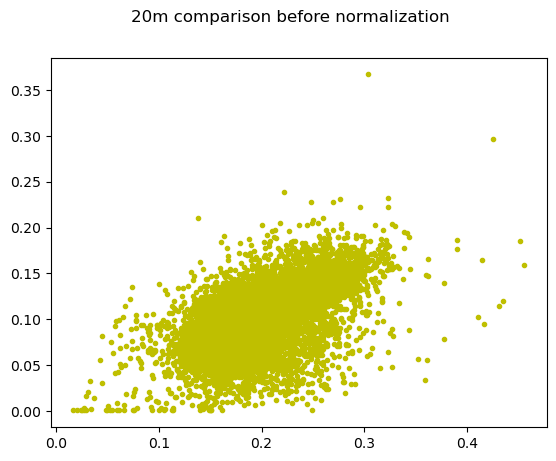

20m before Norm {'B11_RMSE': 0.09747612571817174, 'B11_SSIM': 0.3570975245361882, 'B11_R2': -8.555796508539624}


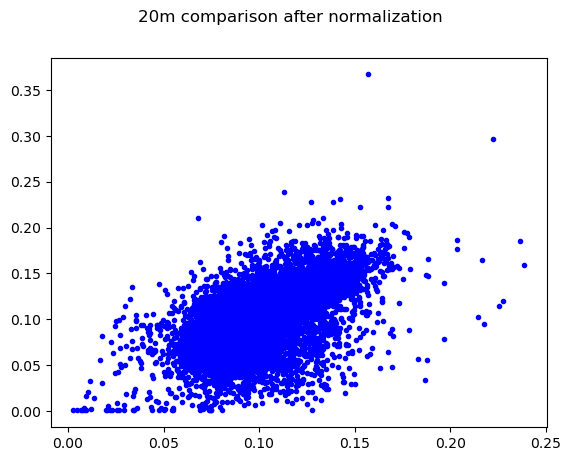

20m After norm {'B11_norm_RMSE': 0.024689174155826162, 'B11_norm_SSIM': 0.33243218014626613, 'B11_norm_R2': 0.38696749848406753}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.04661738178989193 SSIM: 0.5562865744647024 R2: -7.328495451453239 60m before Norm
***************************************************************************************************************************


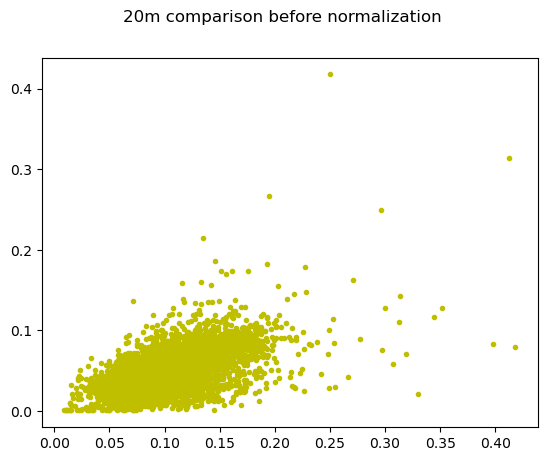

20m before Norm {'B12_RMSE': 0.049219224774207544, 'B12_SSIM': 0.4880546771815158, 'B12_R2': -5.070666381757265}


20m After norm {'B12_norm_RMSE': 0.014751146146538779, 'B12_norm_SSIM': 0.4954180834975021, 'B12_norm_R2': 0.4547215177038407}
----------------------------------------------------------------------------------------------------------------------
UNDE
F:/neon/normalization/S2/S2_20m_UNDE.tif
F:/neon/normalization/NEON/NEON_D05_UNDE_DP1_20190606_184411_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_UNDE.tif
F:/neon/normalization/NEON/NEON_60m_UNDE.tif
Band B2
RMSE: 0.009773703997685219 SSIM: 0.5688038834308785 R2: -4.236150922886795 60m before Norm
***************************************************************************************************************************


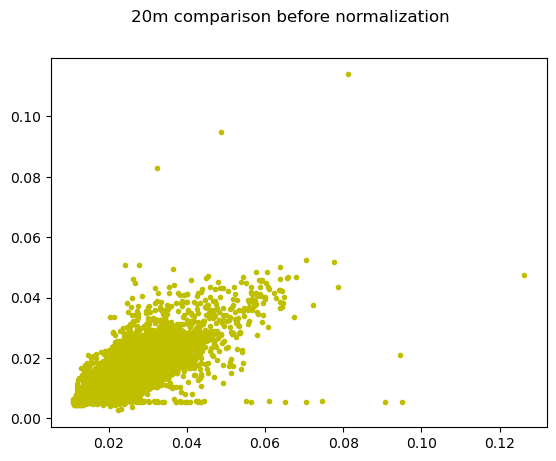

20m before Norm {'B2_RMSE': 0.010128334260578494, 'B2_SSIM': 0.6621561833390209, 'B2_R2': -3.356712937153282}


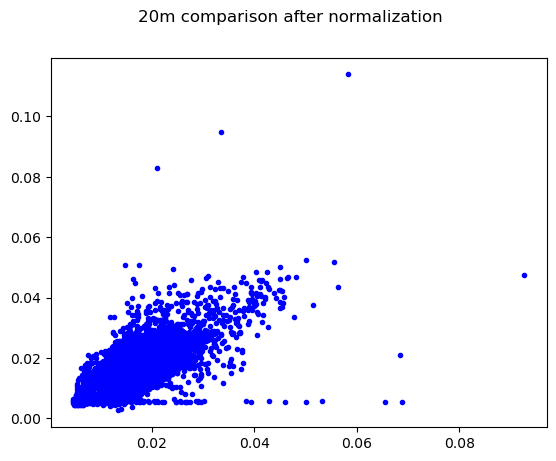

20m After norm {'B2_norm_RMSE': 0.0033822954096638298, 'B2_norm_SSIM': 0.7141735061467854, 'B2_norm_R2': 0.5141457945328947}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.019181661111353082 SSIM: 0.5772814049575378 R2: -1.988053977690075 60m before Norm
***************************************************************************************************************************


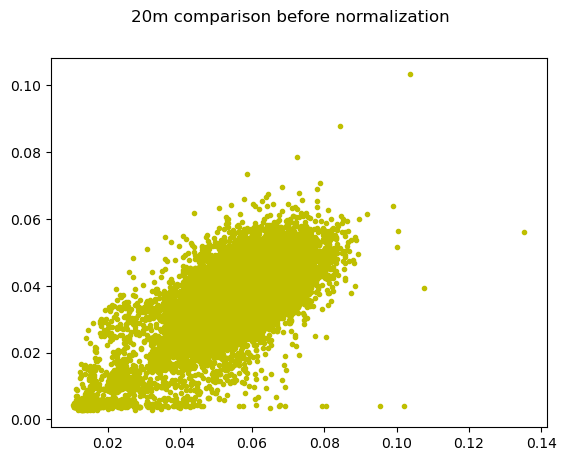

20m before Norm {'B3_RMSE': 0.019773843831545273, 'B3_SSIM': 0.49523037268103703, 'B3_R2': -1.7535016003985384}


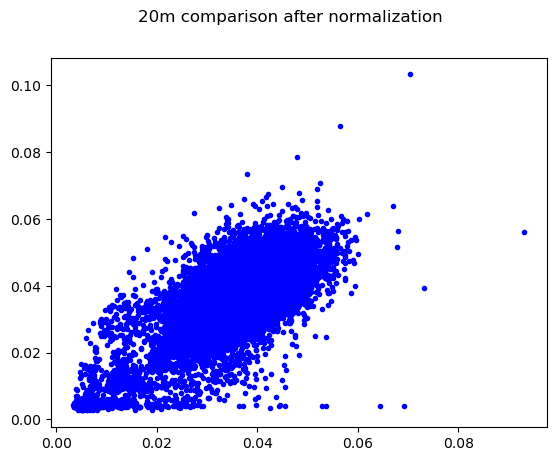

20m After norm {'B3_norm_RMSE': 0.006238080449080864, 'B3_norm_SSIM': 0.528324532023888, 'B3_norm_R2': 0.7259656049732228}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.01176997431492895 SSIM: 0.6721568659848108 R2: -1.5844233782130277 60m before Norm
***************************************************************************************************************************


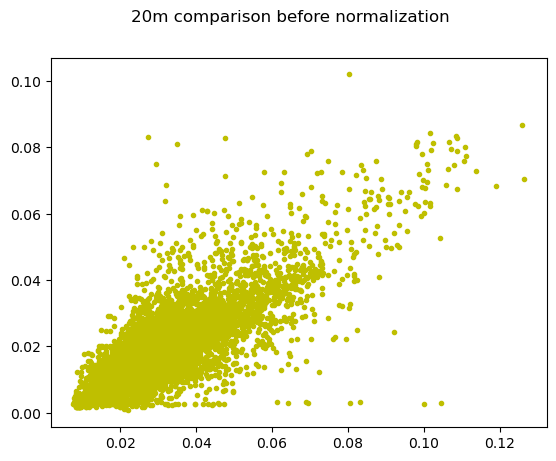

20m before Norm {'B4_RMSE': 0.012412884985213188, 'B4_SSIM': 0.6008468669184195, 'B4_R2': -1.2250454000784963}


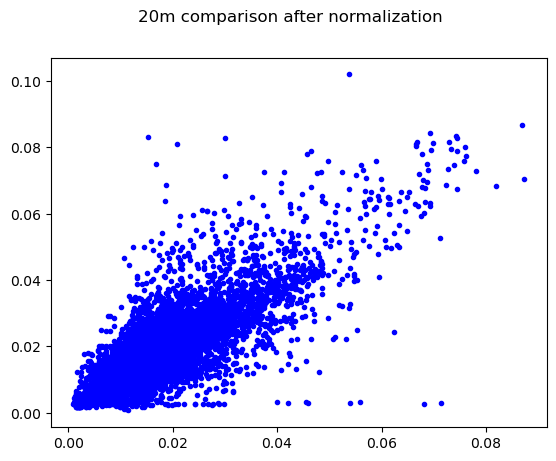

20m After norm {'B4_norm_RMSE': 0.004567038061356449, 'B4_norm_SSIM': 0.687038987193642, 'B4_norm_R2': 0.6987946537473704}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.035315291484773526 SSIM: 0.6043675853567831 R2: -1.8772616608266897 60m before Norm
***************************************************************************************************************************


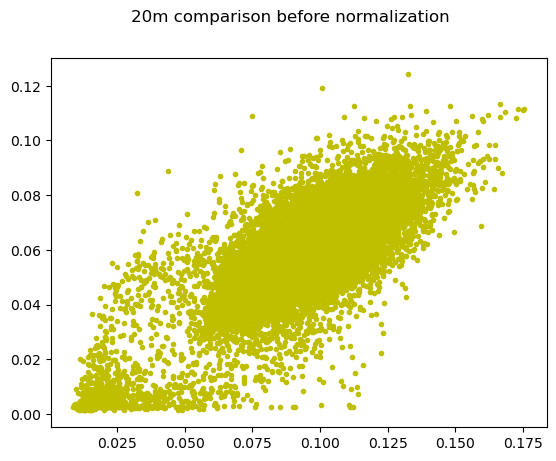

20m before Norm {'B5_RMSE': 0.03606691774443532, 'B5_SSIM': 0.46997129696299417, 'B5_R2': -1.6376903994980703}


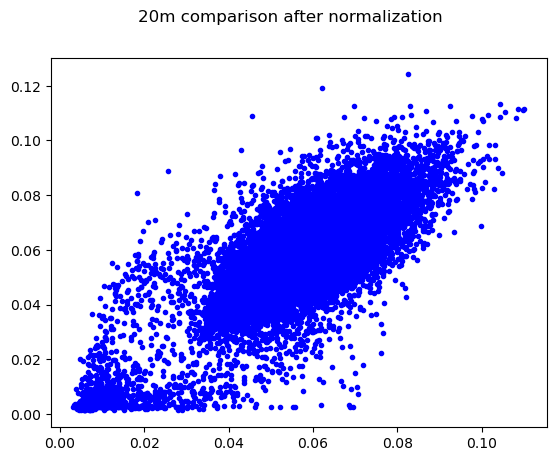

20m After norm {'B5_norm_RMSE': 0.009691182559926084, 'B5_norm_SSIM': 0.5168785578954004, 'B5_norm_R2': 0.8095595015906286}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.09328382874355563 SSIM: 0.6318040364315823 R2: -1.4021051619207516 60m before Norm
***************************************************************************************************************************


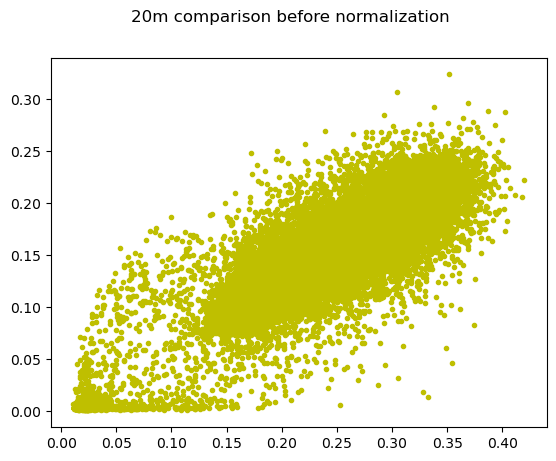

20m before Norm {'B6_RMSE': 0.09555366101000004, 'B6_SSIM': 0.45529804919698263, 'B6_R2': -1.2465692068352205}


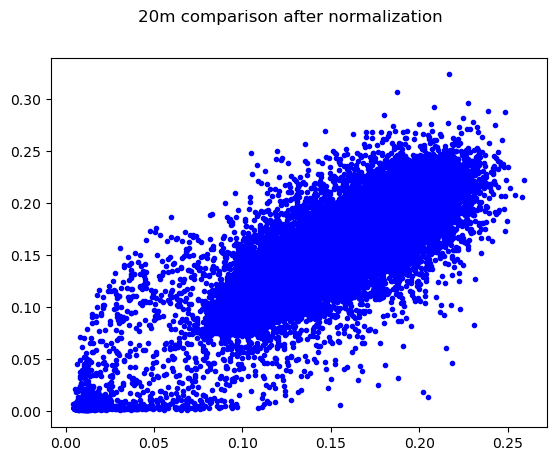

20m After norm {'B6_norm_RMSE': 0.02550133620409599, 'B6_norm_SSIM': 0.5048599978505869, 'B6_norm_R2': 0.8399885674203076}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.09727711451831658 SSIM: 0.6636905953355093 R2: -0.7998954295412337 60m before Norm
***************************************************************************************************************************


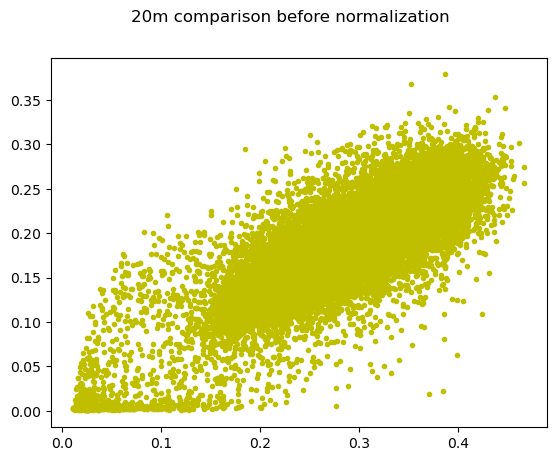

20m before Norm {'B7_RMSE': 0.10022715776515881, 'B7_SSIM': 0.47166924983768554, 'B7_R2': -0.7095157688072362}


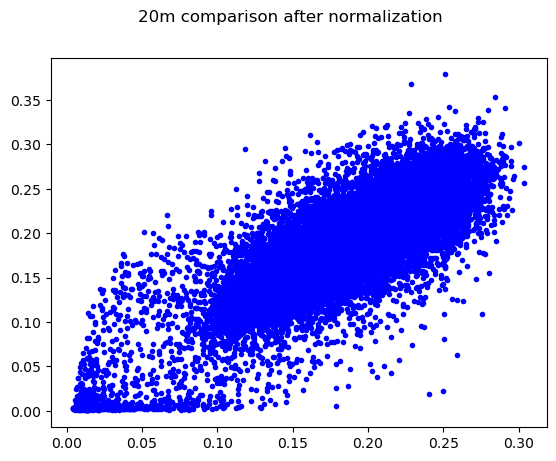

20m After norm {'B7_norm_RMSE': 0.030040275608946558, 'B7_norm_SSIM': 0.5120630410582138, 'B7_norm_R2': 0.8464286835497487}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.09341241703037809 SSIM: 0.6747847836431449 R2: -0.4760794958600829 60m before Norm
***************************************************************************************************************************


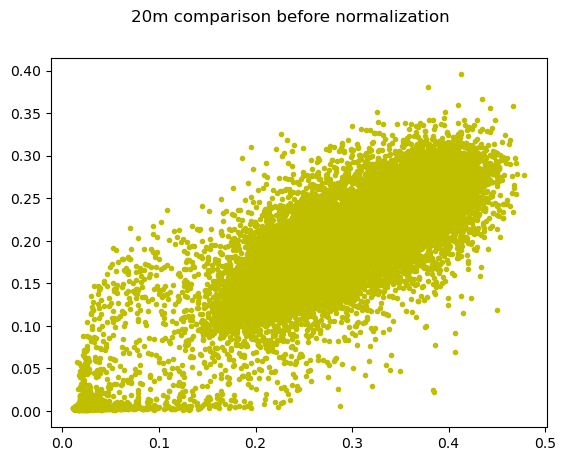

20m before Norm {'B8_RMSE': 0.09725801009301202, 'B8_SSIM': 0.45477797100426604, 'B8_R2': -0.43256521902715495}


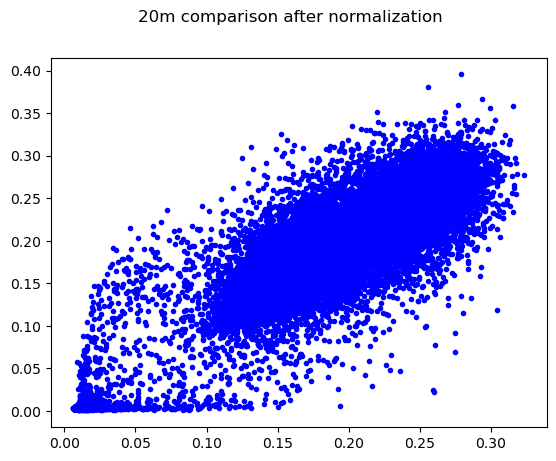

20m After norm {'B8_norm_RMSE': 0.0326425086228959, 'B8_norm_SSIM': 0.4845349160206692, 'B8_norm_R2': 0.8386270647440249}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.08548647840649805 SSIM: 0.6958849866351234 R2: -0.03391648245215051 60m before Norm
***************************************************************************************************************************


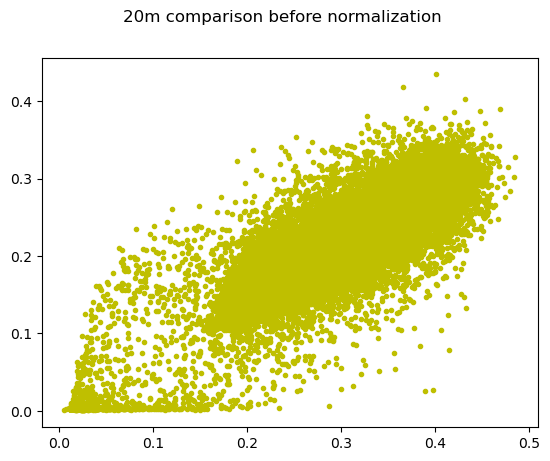

20m before Norm {'B8A_RMSE': 0.08937867890542517, 'B8A_SSIM': 0.4895358023764358, 'B8A_R2': -0.013927154935286401}


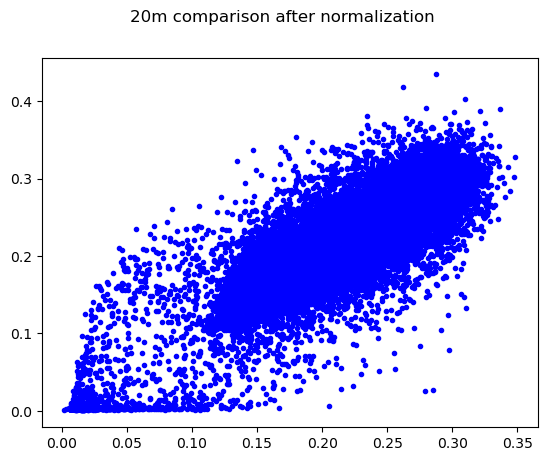

20m After norm {'B8A_norm_RMSE': 0.03431480756316442, 'B8A_norm_SSIM': 0.5042770091335976, 'B8A_norm_R2': 0.8505478979972976}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.0450886381538485 SSIM: 0.6842118946216291 R2: -0.36751993011061024 60m before Norm
***************************************************************************************************************************


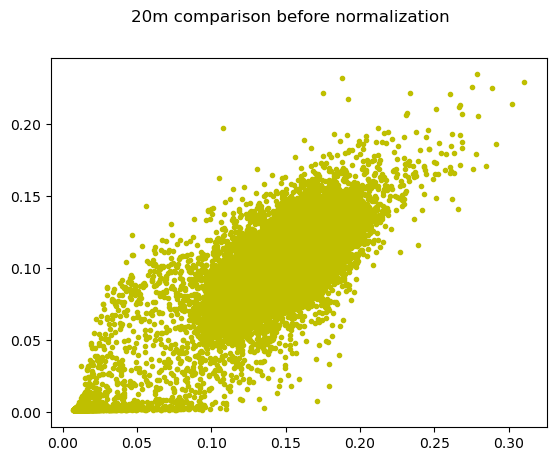

20m before Norm {'B11_RMSE': 0.046378408076485654, 'B11_SSIM': 0.5509066620407491, 'B11_R2': -0.28066471233238977}


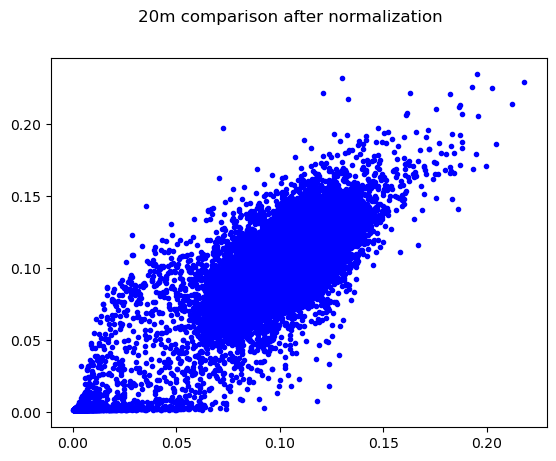

20m After norm {'B11_norm_RMSE': 0.015913479908541563, 'B11_norm_SSIM': 0.5755606683446011, 'B11_norm_R2': 0.8492233505299327}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.016647887890511165 SSIM: 0.7276328345086637 R2: 0.35984379069095773 60m before Norm
***************************************************************************************************************************


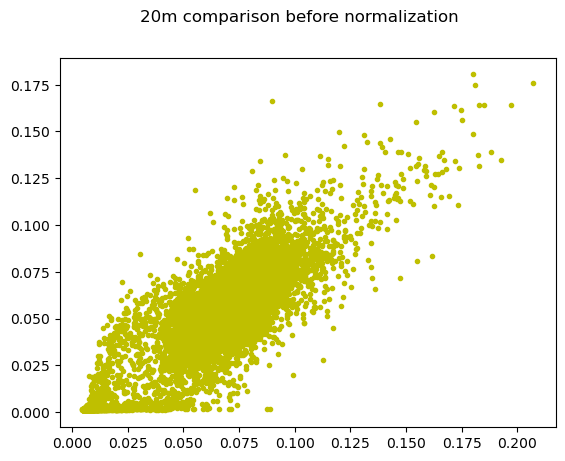

20m before Norm {'B12_RMSE': 0.017920128708537115, 'B12_SSIM': 0.601864974357284, 'B12_R2': 0.3636471796295254}


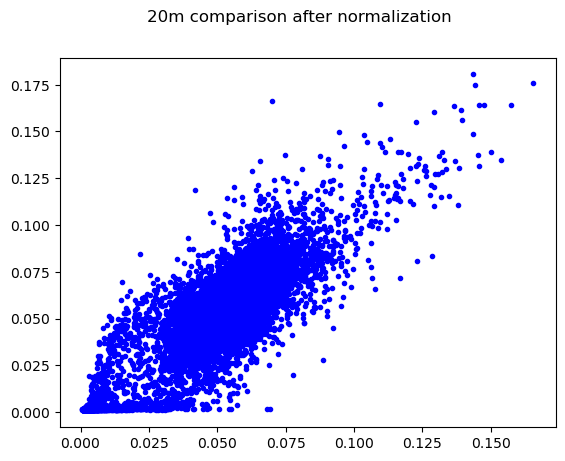

20m After norm {'B12_norm_RMSE': 0.009605638112592754, 'B12_norm_SSIM': 0.6146621522603068, 'B12_norm_R2': 0.8171612827673358}
----------------------------------------------------------------------------------------------------------------------
MCDI
F:/neon/normalization/S2/S2_20m_MCDI.tif
F:/neon/normalization/NEON/NEON_D06_MCDI_DP1_20200713_192937_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_MCDI.tif
F:/neon/normalization/NEON/NEON_60m_MCDI.tif
Band B2
RMSE: 0.011573498445168931 SSIM: 0.6697689343449803 R2: -1.954267069090991 60m before Norm
***************************************************************************************************************************


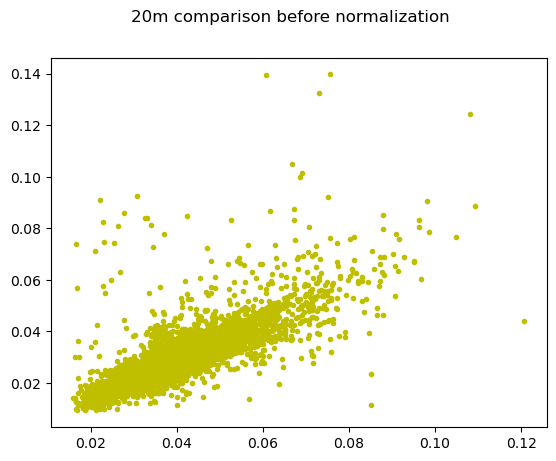

20m before Norm {'B2_RMSE': 0.012145067236140668, 'B2_SSIM': 0.7374602032016645, 'B2_R2': -1.15651139414532}


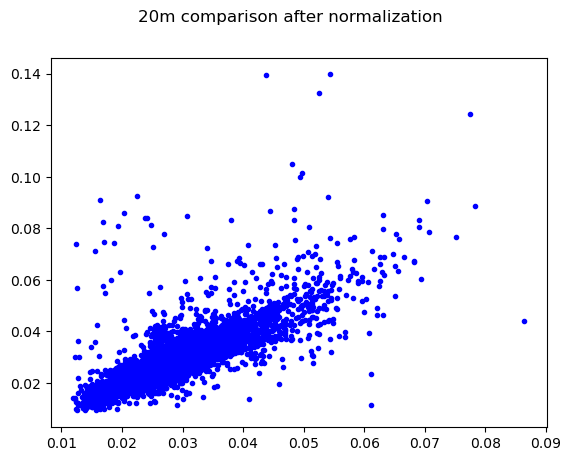

20m After norm {'B2_norm_RMSE': 0.005084369755462334, 'B2_norm_SSIM': 0.7548009474300234, 'B2_norm_R2': 0.622057124025623}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.02696106512428216 SSIM: 0.5904605165049501 R2: -14.302849587034082 60m before Norm
***************************************************************************************************************************


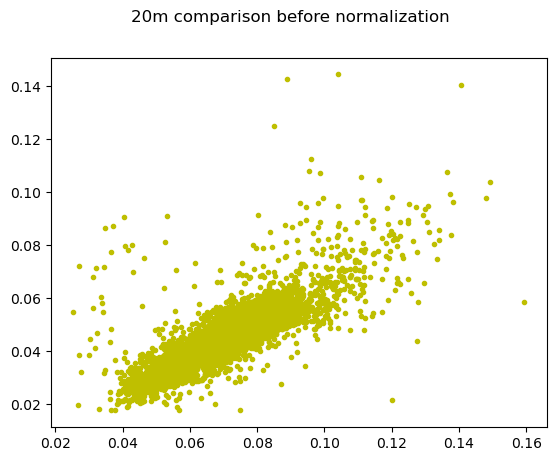

20m before Norm {'B3_RMSE': 0.027265131130911568, 'B3_SSIM': 0.6995792473728212, 'B3_R2': -9.34336945491338}


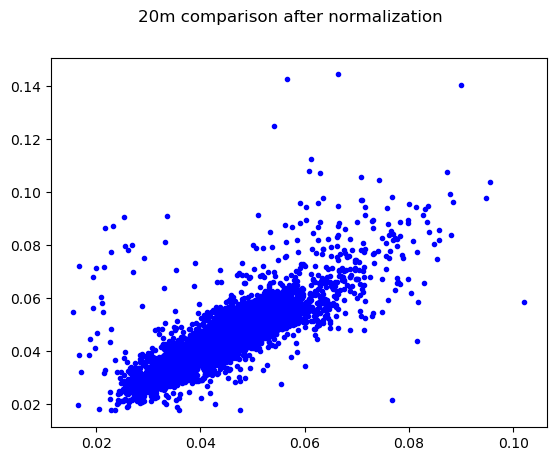

20m After norm {'B3_norm_RMSE': 0.005260728941393636, 'B3_norm_SSIM': 0.7391555747558168, 'B3_norm_R2': 0.6149308672992695}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.015121169470149031 SSIM: 0.7103463520779489 R2: -0.7965917970034047 60m before Norm
***************************************************************************************************************************


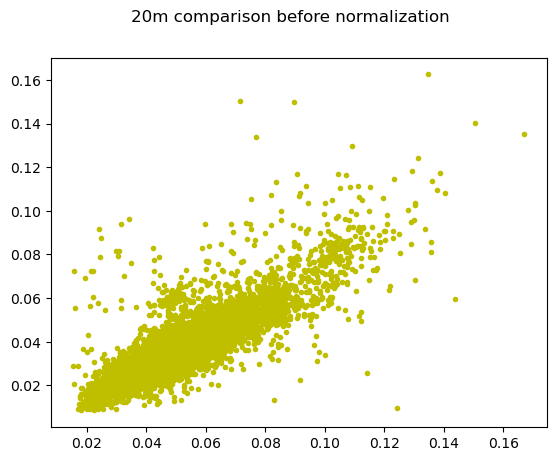

20m before Norm {'B4_RMSE': 0.01597759371792287, 'B4_SSIM': 0.7392168882279709, 'B4_R2': -0.3994722611226664}


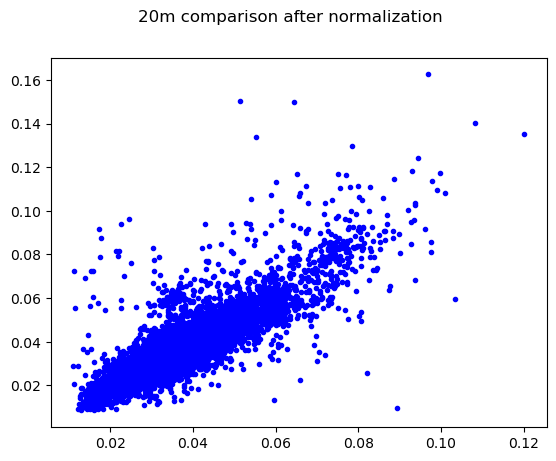

20m After norm {'B4_norm_RMSE': 0.007149666232569386, 'B4_norm_SSIM': 0.7615080064496579, 'B4_norm_R2': 0.7197709956359053}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.04785520576092135 SSIM: 0.5688115394020524 R2: -23.67138730093687 60m before Norm
***************************************************************************************************************************


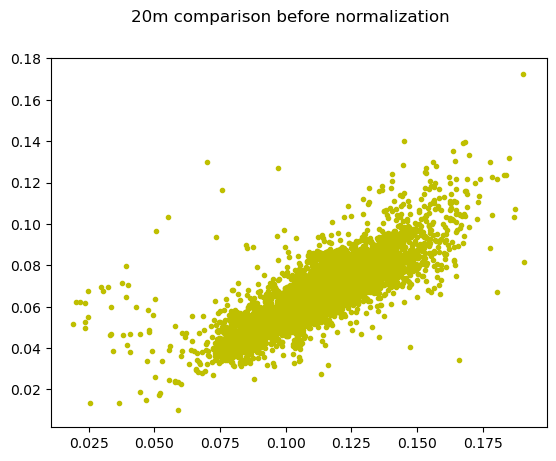

20m before Norm {'B5_RMSE': 0.04809821787824673, 'B5_SSIM': 0.6463820675775938, 'B5_R2': -16.66902639749223}


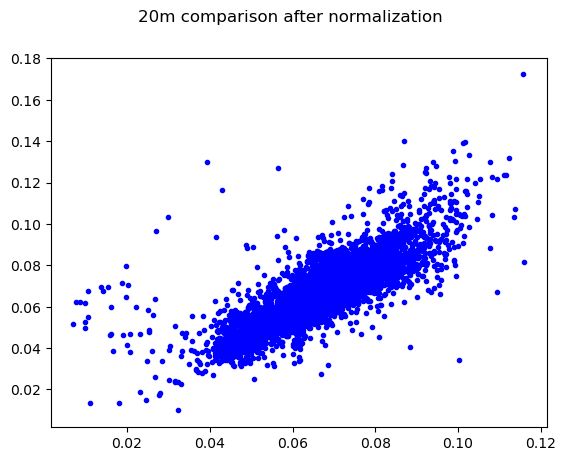

20m After norm {'B5_norm_RMSE': 0.007236258570630441, 'B5_norm_SSIM': 0.696559624383838, 'B5_norm_R2': 0.6000710868909708}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.12197306839575517 SSIM: 0.6760307968923679 R2: -31.266518929436884 60m before Norm
***************************************************************************************************************************


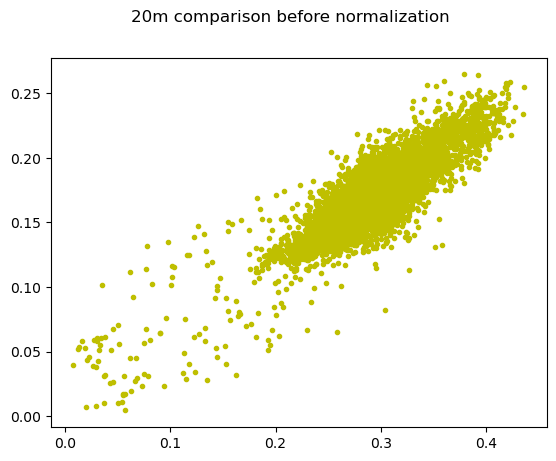

20m before Norm {'B6_RMSE': 0.12256064621421627, 'B6_SSIM': 0.6614654860904244, 'B6_R2': -23.933776665432458}


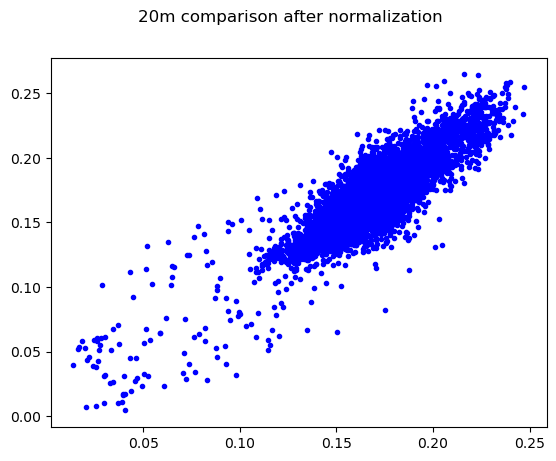

20m After norm {'B6_norm_RMSE': 0.012155147880404275, 'B6_norm_SSIM': 0.7352649997661874, 'B6_norm_R2': 0.7547514352011683}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.13401838993997284 SSIM: 0.7267129538007654 R2: -17.447862263750515 60m before Norm
***************************************************************************************************************************


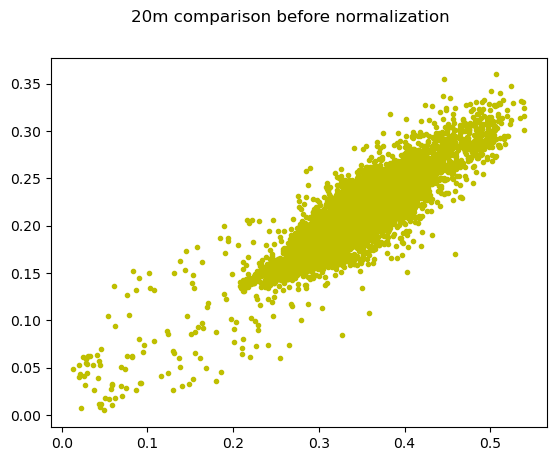

20m before Norm {'B7_RMSE': 0.13496819885968525, 'B7_SSIM': 0.688703374312353, 'B7_R2': -13.663120670314356}


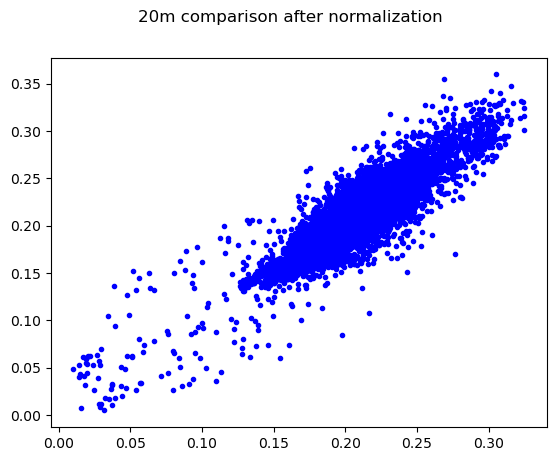

20m After norm {'B7_norm_RMSE': 0.015955246083926105, 'B7_norm_SSIM': 0.7527400765649265, 'B7_norm_R2': 0.7950865252560564}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.1257187726857849 SSIM: 0.7486911998191276 R2: -14.746285892027883 60m before Norm
***************************************************************************************************************************


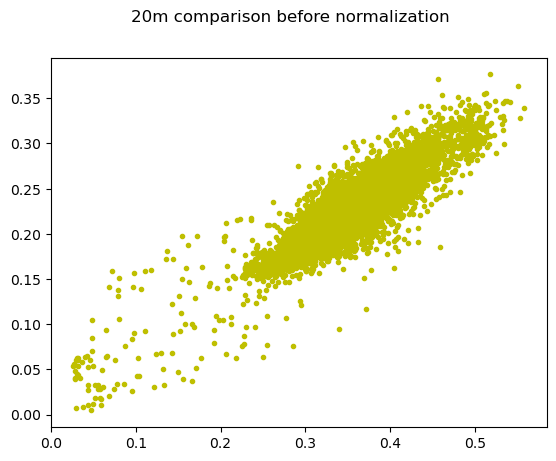

20m before Norm {'B8_RMSE': 0.1266784753202669, 'B8_SSIM': 0.7068915816424712, 'B8_R2': -11.420886059231647}


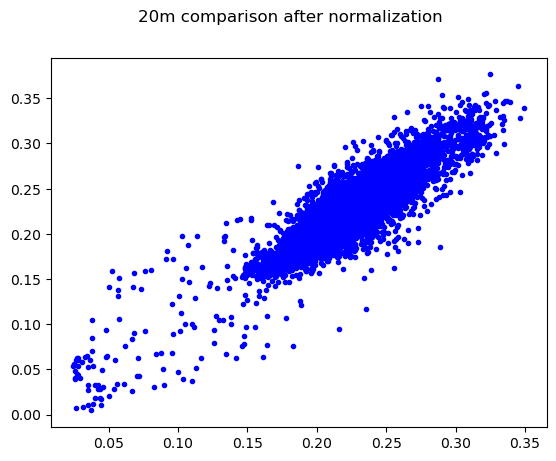

20m After norm {'B8_norm_RMSE': 0.01616277257529303, 'B8_norm_SSIM': 0.7608634440259808, 'B8_norm_R2': 0.7978011660639028}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.12285471958499224 SSIM: 0.7692954780111233 R2: -11.602304426982649 60m before Norm
***************************************************************************************************************************


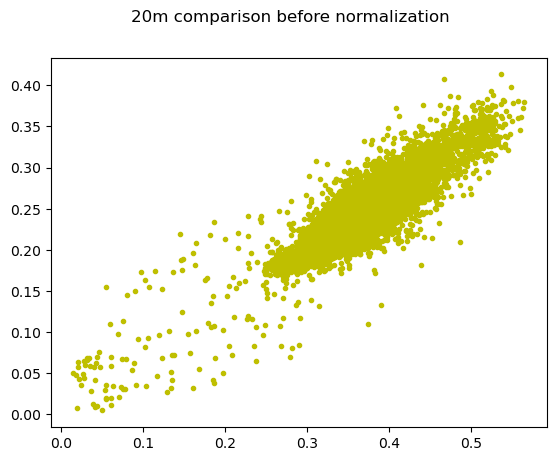

20m before Norm {'B8A_RMSE': 0.12396309243372045, 'B8A_SSIM': 0.7205879417673311, 'B8A_R2': -8.96225986348294}


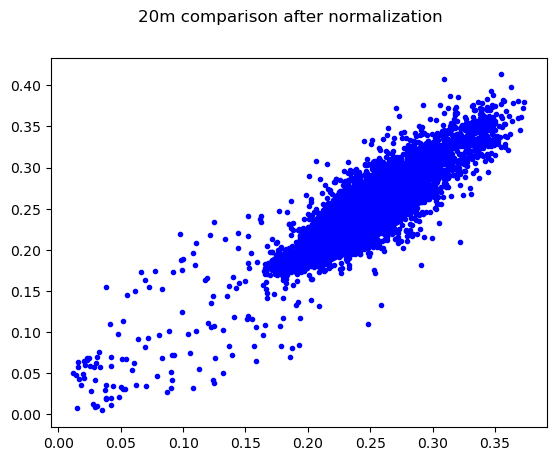

20m After norm {'B8A_norm_RMSE': 0.018023532683120073, 'B8A_norm_SSIM': 0.7503580039067177, 'B8A_norm_R2': 0.7894026513486059}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.09537587365972458 SSIM: 0.6886310820823285 R2: -18.135699572983516 60m before Norm
***************************************************************************************************************************


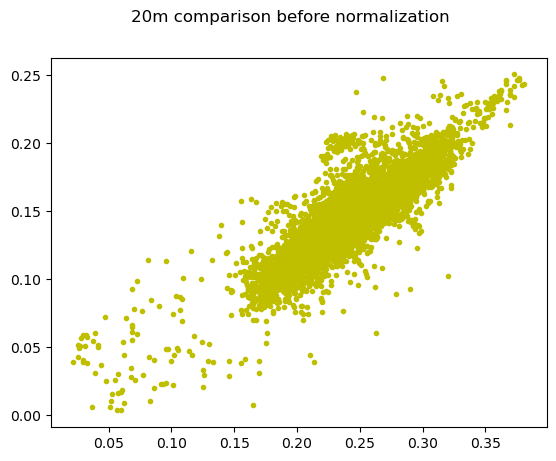

20m before Norm {'B11_RMSE': 0.09574666026295633, 'B11_SSIM': 0.6939087153039997, 'B11_R2': -13.492418867573411}


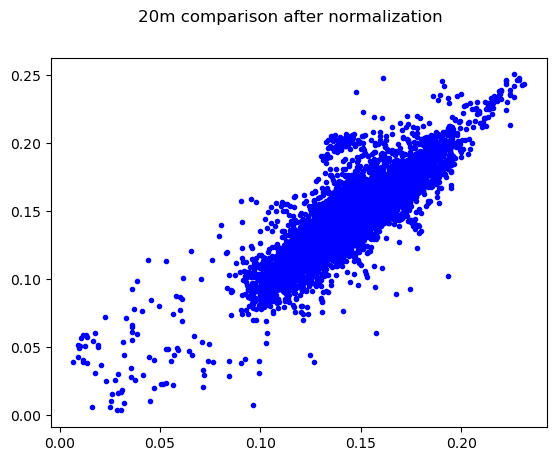

20m After norm {'B11_norm_RMSE': 0.012659540661482215, 'B11_norm_SSIM': 0.7400962204720726, 'B11_norm_R2': 0.7466449850276143}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.04223220679132255 SSIM: 0.7541407142407619 R2: -2.7597609639307024 60m before Norm
***************************************************************************************************************************


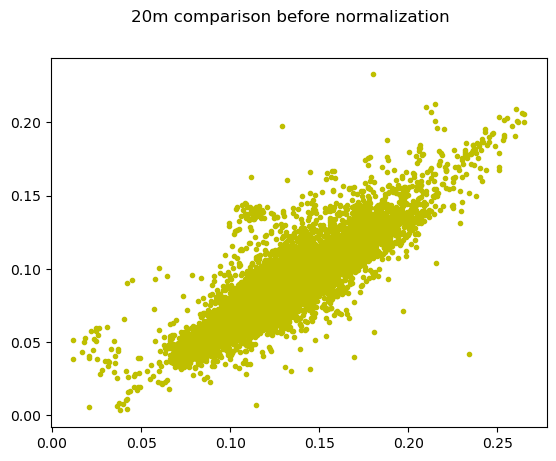

20m before Norm {'B12_RMSE': 0.042870310921894875, 'B12_SSIM': 0.7165820391331896, 'B12_R2': -1.9139279407114405}


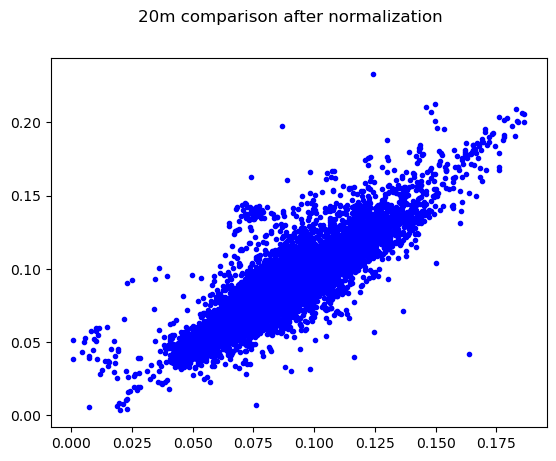

20m After norm {'B12_norm_RMSE': 0.012357858499100191, 'B12_norm_SSIM': 0.735700651356696, 'B12_norm_R2': 0.7578681181231331}
----------------------------------------------------------------------------------------------------------------------
LENO
F:/neon/normalization/S2/S2_20m_LENO.tif
F:/neon/normalization/NEON/NEON_D08_LENO_DP1_20210422_172136_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_LENO.tif
F:/neon/normalization/NEON/NEON_60m_LENO.tif
Band B2
RMSE: 0.015397270955928926 SSIM: 0.6929693301409394 R2: -0.9924562399043608 60m before Norm
***************************************************************************************************************************


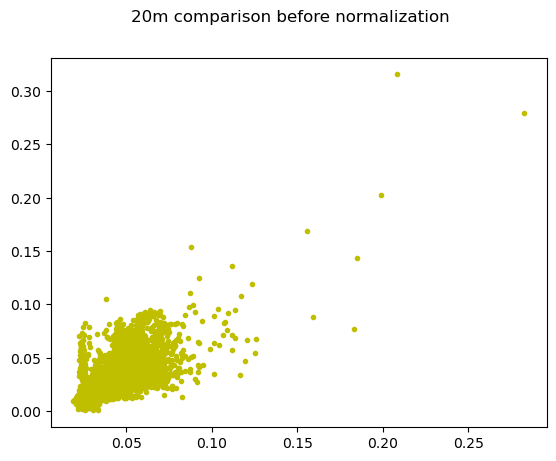

20m before Norm {'B2_RMSE': 0.016021741738327783, 'B2_SSIM': 0.7087145190737321, 'B2_R2': -0.598315080674235}


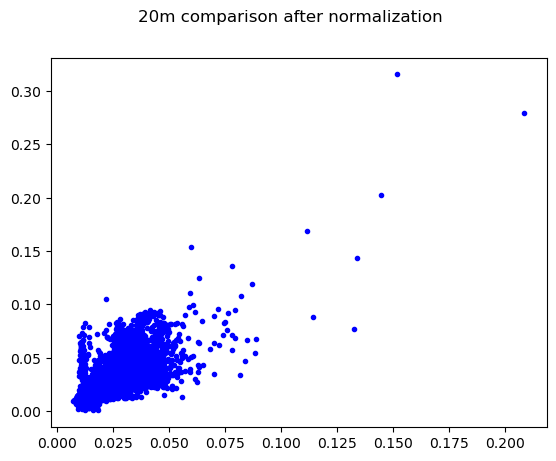

20m After norm {'B2_norm_RMSE': 0.008080023551332501, 'B2_norm_SSIM': 0.819728987485019, 'B2_norm_R2': 0.5934928425129199}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.01765283808181713 SSIM: 0.6766638009184177 R2: -1.4890424488020884 60m before Norm
***************************************************************************************************************************


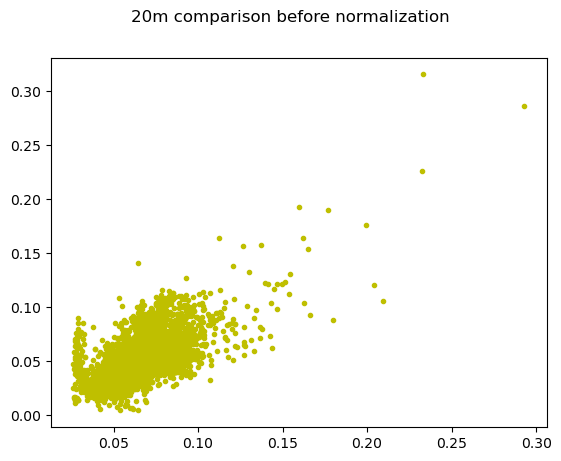

20m before Norm {'B3_RMSE': 0.01852657982343137, 'B3_SSIM': 0.7011150681472453, 'B3_R2': -0.8964617959193786}


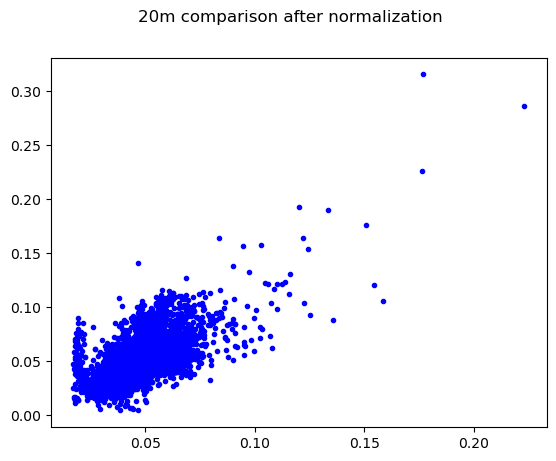

20m After norm {'B3_norm_RMSE': 0.00931969430859058, 'B3_norm_SSIM': 0.7021784430563728, 'B3_norm_R2': 0.5200931716842625}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.013822205179195347 SSIM: 0.8011145623939931 R2: 0.30345685881375106 60m before Norm
***************************************************************************************************************************


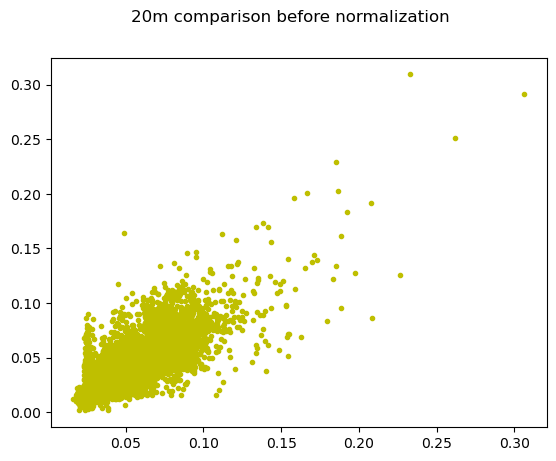

20m before Norm {'B4_RMSE': 0.015497534135563205, 'B4_SSIM': 0.7684909638040011, 'B4_R2': 0.36567023958393596}


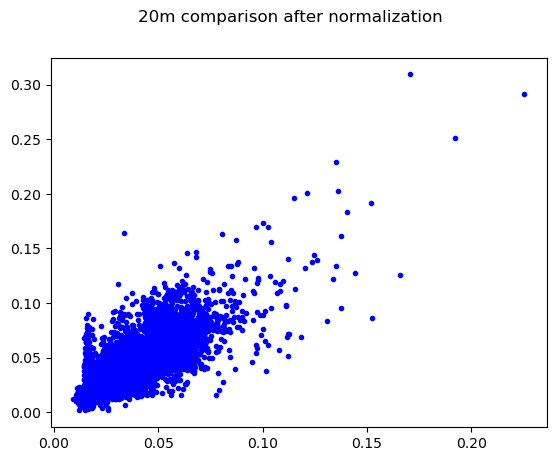

20m After norm {'B4_norm_RMSE': 0.010203366342919379, 'B4_norm_SSIM': 0.7962576907802018, 'B4_norm_R2': 0.7250353624979757}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.03286068715355472 SSIM: 0.7078847879437987 R2: -4.851223652786631 60m before Norm
***************************************************************************************************************************


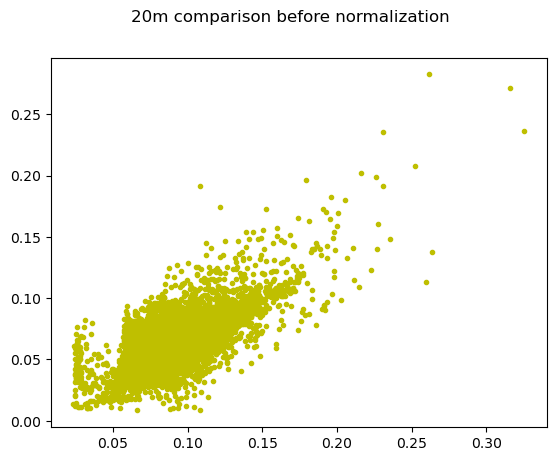

20m before Norm {'B5_RMSE': 0.03358129761162669, 'B5_SSIM': 0.6558281388695661, 'B5_R2': -2.997032438992224}


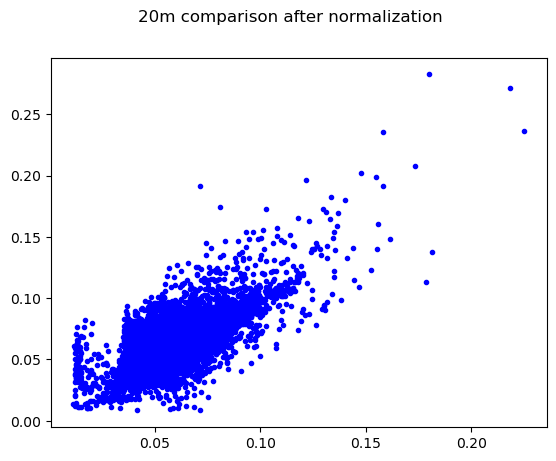

20m After norm {'B5_norm_RMSE': 0.010898378485467432, 'B5_norm_SSIM': 0.6797413378864469, 'B5_norm_R2': 0.5790151199558937}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.08286201088071841 SSIM: 0.7435770409554303 R2: -1.5613167618531945 60m before Norm
***************************************************************************************************************************


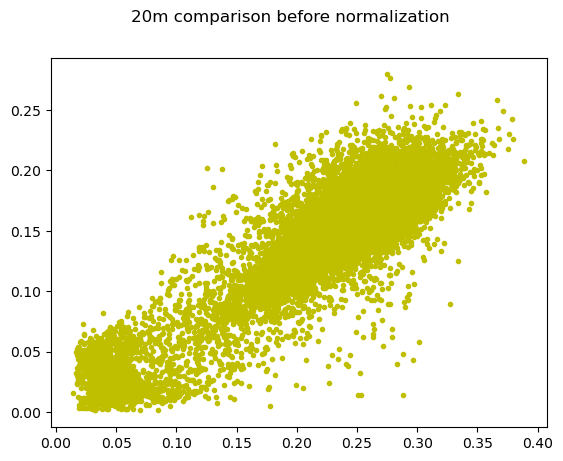

20m before Norm {'B6_RMSE': 0.08378401918245688, 'B6_SSIM': 0.6086978270548794, 'B6_R2': -1.1522085188700641}


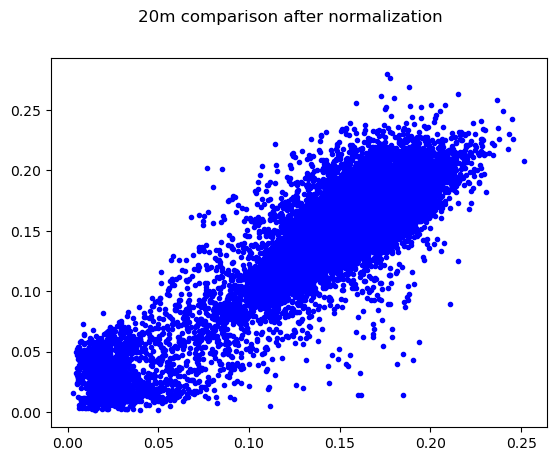

20m After norm {'B6_norm_RMSE': 0.020216127025360516, 'B6_norm_SSIM': 0.6559058062867125, 'B6_norm_R2': 0.8746980350082139}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.0932326709193206 SSIM: 0.7656743761710265 R2: -1.1550849659479017 60m before Norm
***************************************************************************************************************************


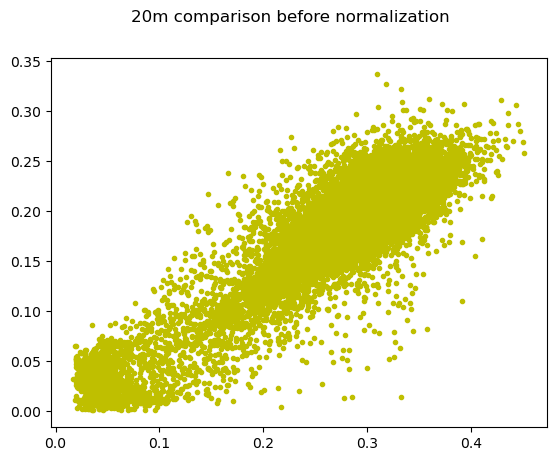

20m before Norm {'B7_RMSE': 0.09435666551099497, 'B7_SSIM': 0.6271150749993285, 'B7_R2': -0.8319790734074979}


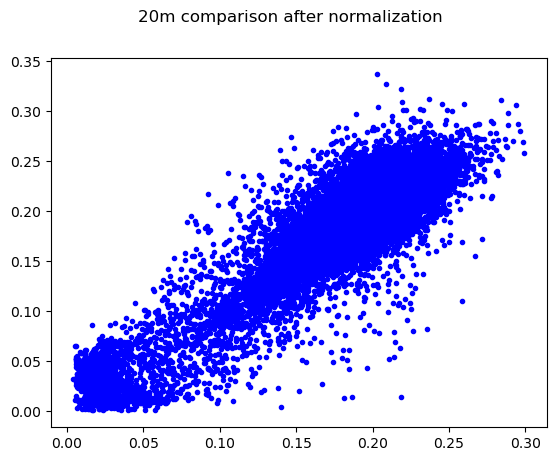

20m After norm {'B7_norm_RMSE': 0.023439953647197607, 'B7_norm_SSIM': 0.6705162811282777, 'B7_norm_R2': 0.8869452443274188}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.09692354788087 SSIM: 0.7674805660364379 R2: -1.0053142700859379 60m before Norm
***************************************************************************************************************************


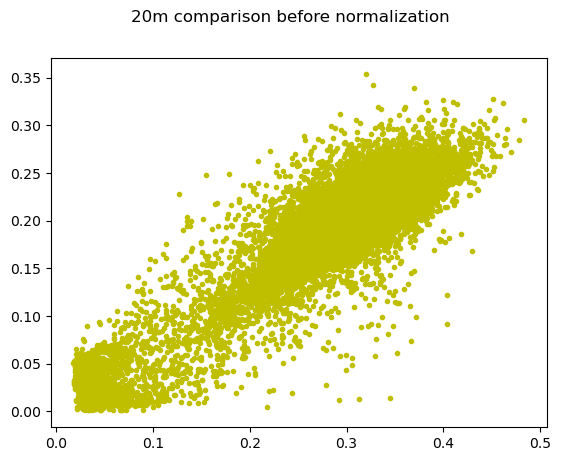

20m before Norm {'B8_RMSE': 0.0982679574519283, 'B8_SSIM': 0.6337832037196691, 'B8_R2': -0.7195762084219661}


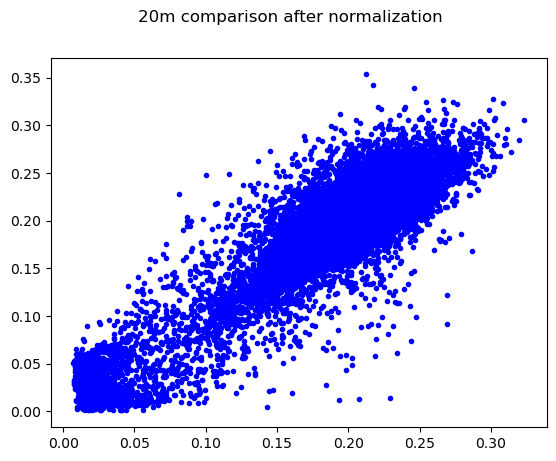

20m After norm {'B8_norm_RMSE': 0.024474796082600104, 'B8_norm_SSIM': 0.6833669420055941, 'B8_norm_R2': 0.8933316115999391}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.08219682151501778 SSIM: 0.8066463297915452 R2: -0.16193642195472613 60m before Norm
***************************************************************************************************************************


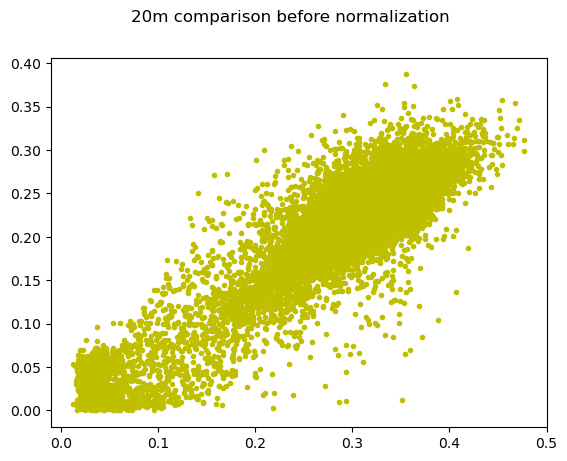

20m before Norm {'B8A_RMSE': 0.08363778975565984, 'B8A_SSIM': 0.6523975182196395, 'B8A_R2': -0.007055160469978228}


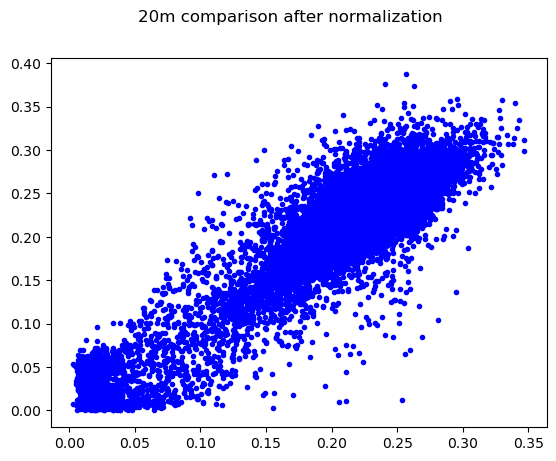

20m After norm {'B8A_norm_RMSE': 0.026742320455132133, 'B8A_norm_SSIM': 0.6671779861905218, 'B8A_norm_R2': 0.8970452610617681}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.05331868178905311 SSIM: 0.7538743582803018 R2: -0.8274152666752164 60m before Norm
***************************************************************************************************************************


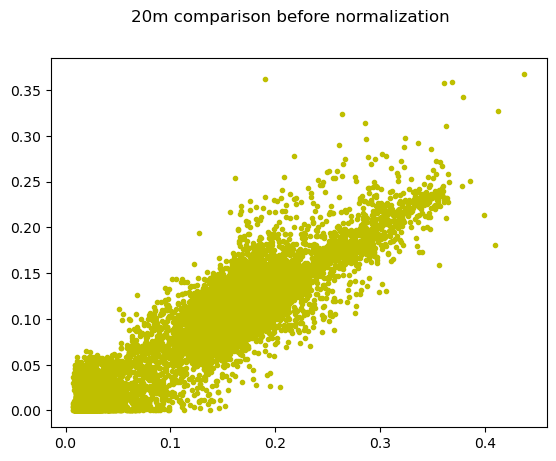

20m before Norm {'B11_RMSE': 0.054642953123464885, 'B11_SSIM': 0.6460531050428979, 'B11_R2': -0.5104587758928187}


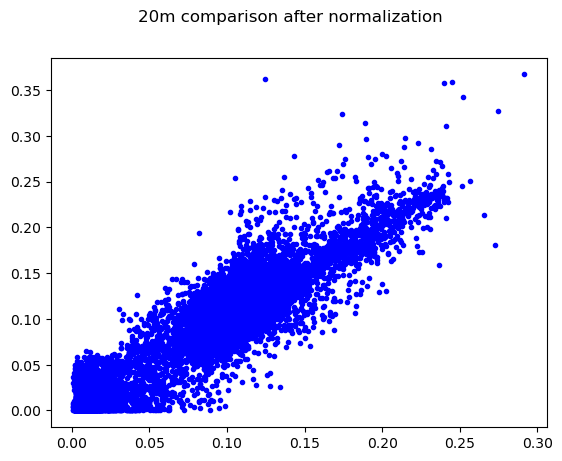

20m After norm {'B11_norm_RMSE': 0.017991138597813944, 'B11_norm_SSIM': 0.6497146973878836, 'B11_norm_R2': 0.8362588445670649}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.02291678593193717 SSIM: 0.8042145180414412 R2: 0.27378562514746907 60m before Norm
***************************************************************************************************************************


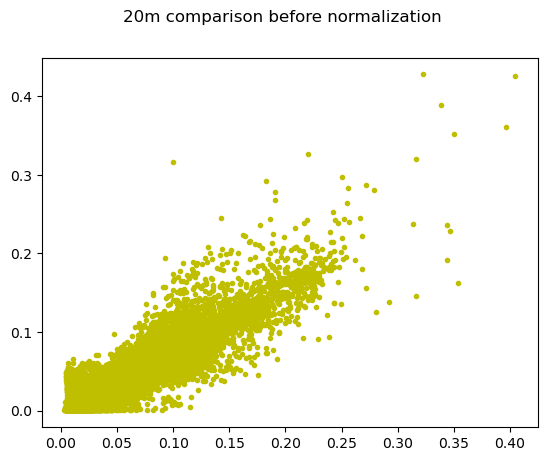

20m before Norm {'B12_RMSE': 0.025453831970122673, 'B12_SSIM': 0.7205575230243695, 'B12_R2': 0.36833537973144925}


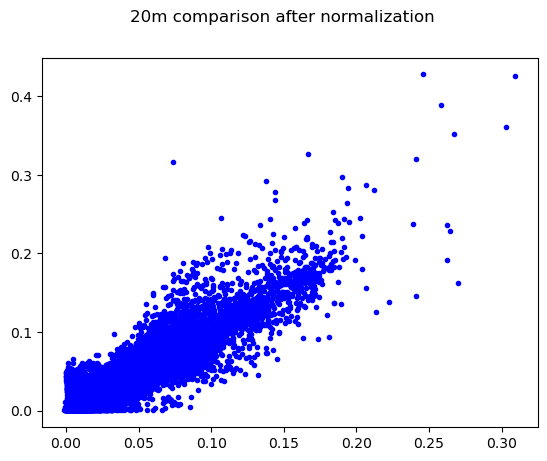

20m After norm {'B12_norm_RMSE': 0.01522173874885962, 'B12_norm_SSIM': 0.716715376794536, 'B12_norm_R2': 0.7741038991922531}
----------------------------------------------------------------------------------------------------------------------
NOGP
F:/neon/normalization/S2/S2_20m_NOGP.tif
F:/neon/normalization/NEON/NEON_D09_NOGP_DP1_20200626_152700_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_NOGP.tif
F:/neon/normalization/NEON/NEON_60m_NOGP.tif
Band B2
RMSE: 0.027530013447314504 SSIM: 0.60902688631355 R2: -3.8609702611344003 60m before Norm
***************************************************************************************************************************


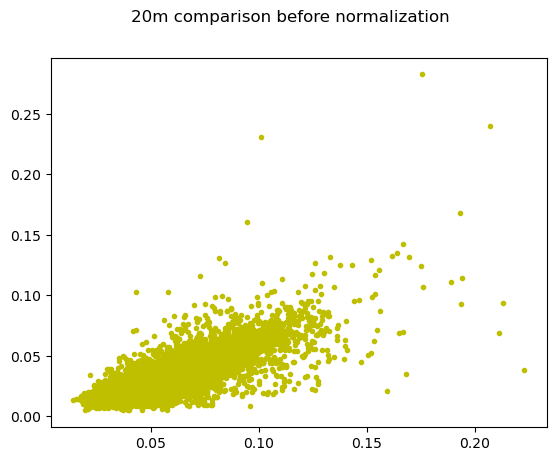

20m before Norm {'B2_RMSE': 0.02859221162014205, 'B2_SSIM': 0.6289542105147315, 'B2_R2': -2.757350733033149}


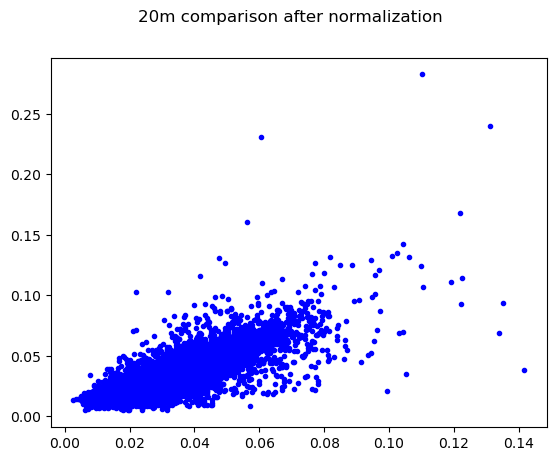

20m After norm {'B2_norm_RMSE': 0.008381895703716795, 'B2_norm_SSIM': 0.7101859577038513, 'B2_norm_R2': 0.6770979942861948}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.041648014069120345 SSIM: 0.5421521430564353 R2: -10.924195628147478 60m before Norm
***************************************************************************************************************************


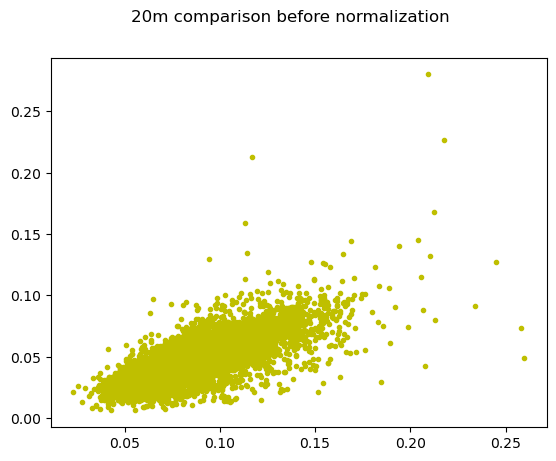

20m before Norm {'B3_RMSE': 0.04255657416887348, 'B3_SSIM': 0.6027442151119196, 'B3_R2': -7.854300941042137}


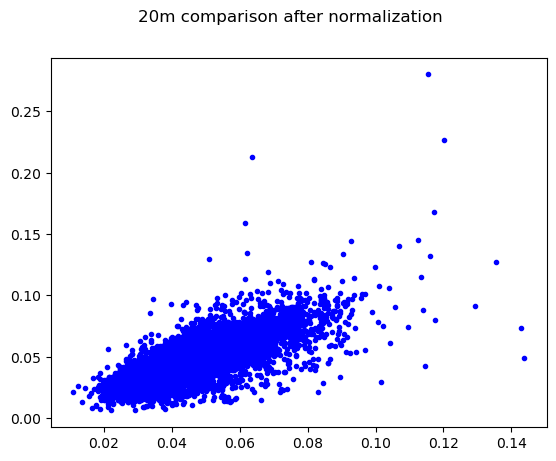

20m After norm {'B3_norm_RMSE': 0.00892260298488808, 'B3_norm_SSIM': 0.6694399416201678, 'B3_norm_R2': 0.6107719791838739}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.046434856498063844 SSIM: 0.6218254993112917 R2: -3.4782508287439606 60m before Norm
***************************************************************************************************************************


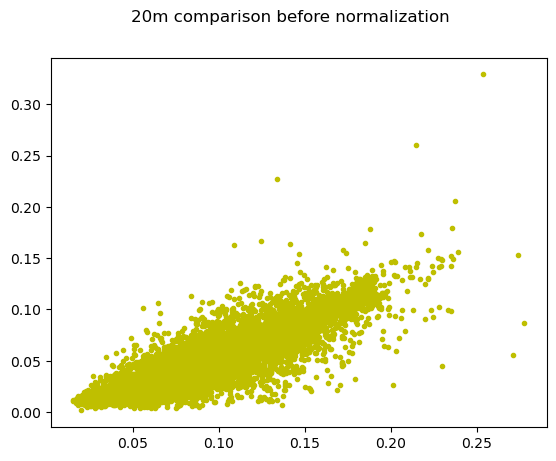

20m before Norm {'B4_RMSE': 0.0478642862543345, 'B4_SSIM': 0.5741542935315426, 'B4_R2': -2.6659357577877048}


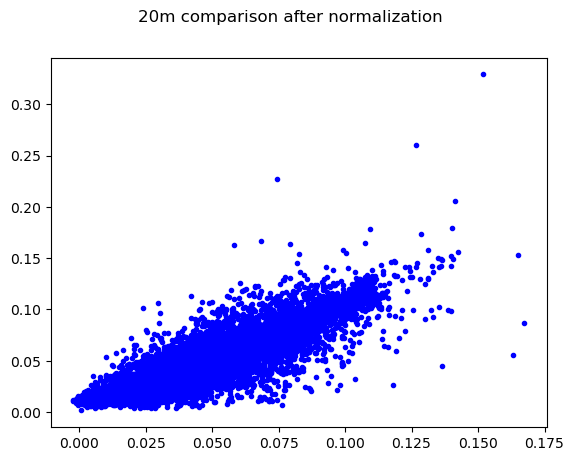

20m After norm {'B4_norm_RMSE': 0.012299776508359221, 'B4_norm_SSIM': 0.6834825380338153, 'B4_norm_R2': 0.7579215576719676}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.06669133842666872 SSIM: 0.5728257577285933 R2: -12.688404783125549 60m before Norm
***************************************************************************************************************************


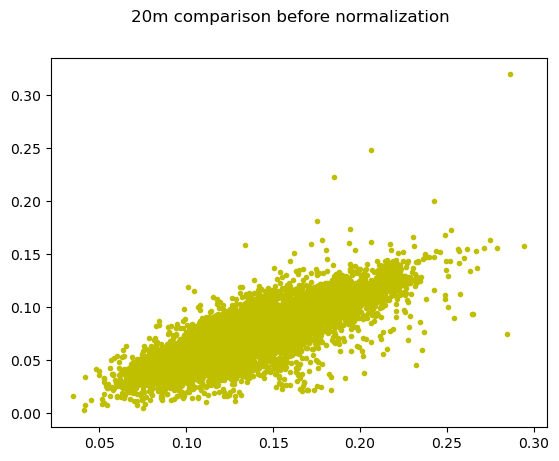

20m before Norm {'B5_RMSE': 0.06751267064777745, 'B5_SSIM': 0.5811434945277609, 'B5_R2': -9.407598157106342}


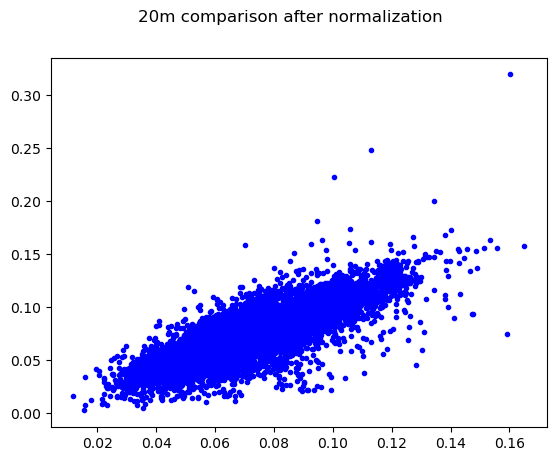

20m After norm {'B5_norm_RMSE': 0.012281652706328057, 'B5_norm_SSIM': 0.6466235078706561, 'B5_norm_R2': 0.6555758744636259}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.09731914266369411 SSIM: 0.6107010651012891 R2: -11.097057687606732 60m before Norm
***************************************************************************************************************************


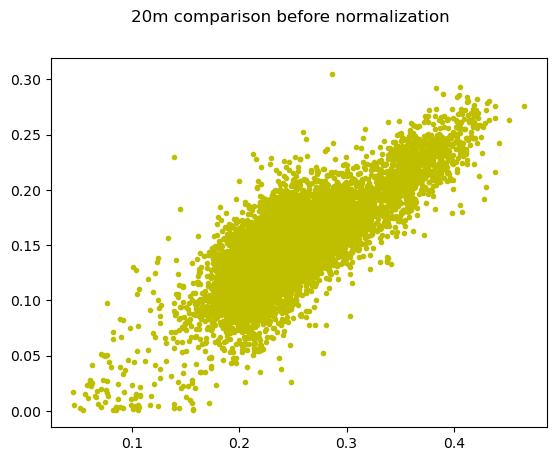

20m before Norm {'B6_RMSE': 0.09879912392972086, 'B6_SSIM': 0.6065981364688704, 'B6_R2': -8.63078540324557}


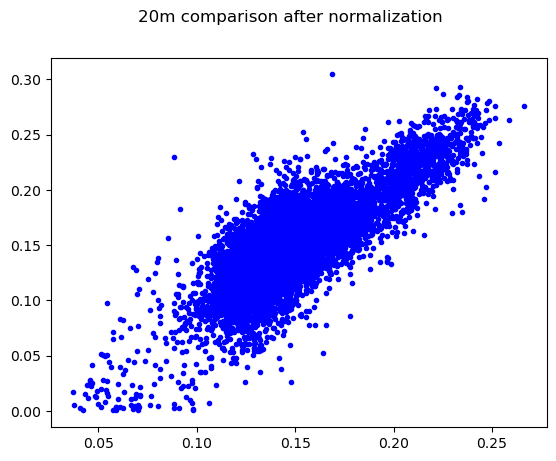

20m After norm {'B6_norm_RMSE': 0.019072294307682695, 'B6_norm_SSIM': 0.6033276646916765, 'B6_norm_R2': 0.6411099663712118}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.10797565306827357 SSIM: 0.6480626968559816 R2: -7.73020696839081 60m before Norm
***************************************************************************************************************************


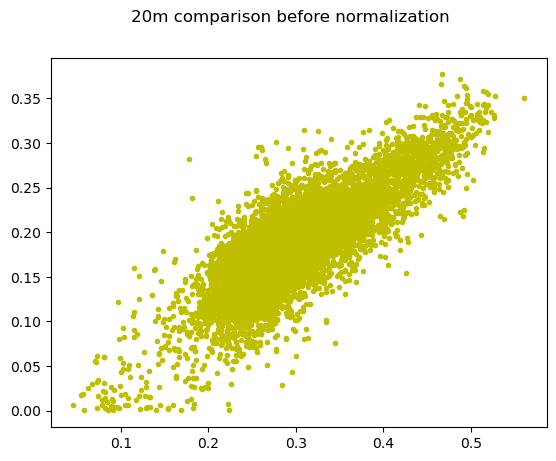

20m before Norm {'B7_RMSE': 0.11008584350389694, 'B7_SSIM': 0.6293013660127662, 'B7_R2': -5.948588739585602}


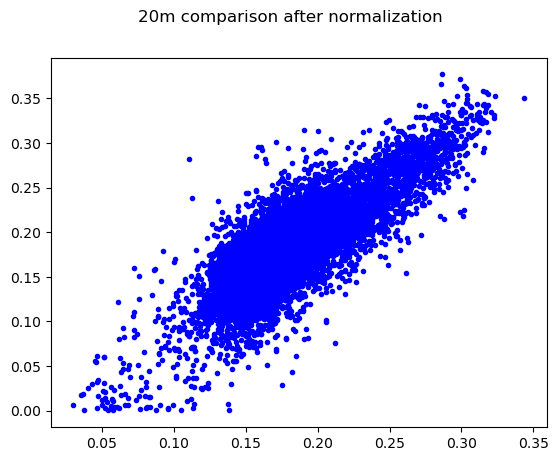

20m After norm {'B7_norm_RMSE': 0.023644439307957746, 'B7_norm_SSIM': 0.6409548921609465, 'B7_norm_R2': 0.6794530130357057}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.09688498901570283 SSIM: 0.6658488538042172 R2: -6.24191087216382 60m before Norm
***************************************************************************************************************************


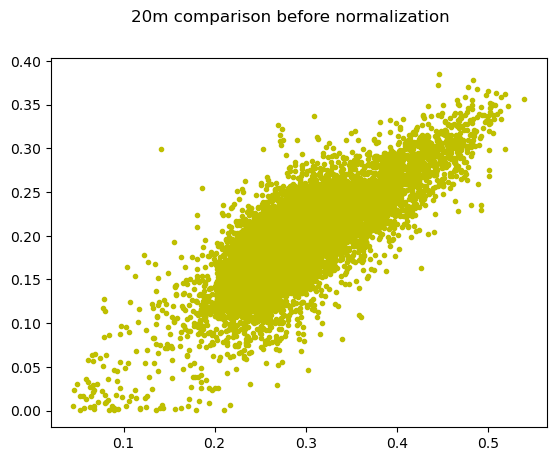

20m before Norm {'B8_RMSE': 0.09939781549233068, 'B8_SSIM': 0.6252327913753027, 'B8_R2': -4.697105649485913}


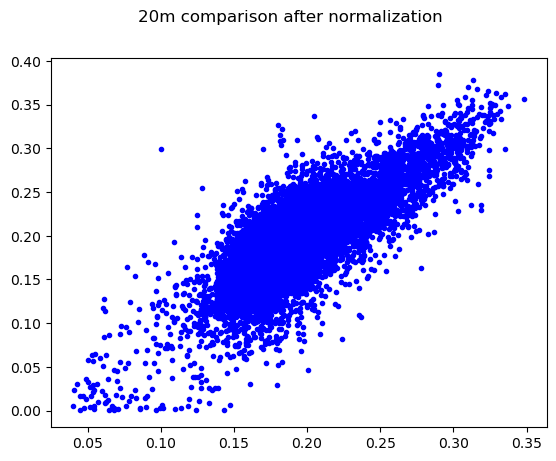

20m After norm {'B8_norm_RMSE': 0.025173949431333414, 'B8_norm_SSIM': 0.6177774087171389, 'B8_norm_R2': 0.6345707517164147}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.09918489595236764 SSIM: 0.6721230321697508 R2: -5.464117790105017 60m before Norm
***************************************************************************************************************************


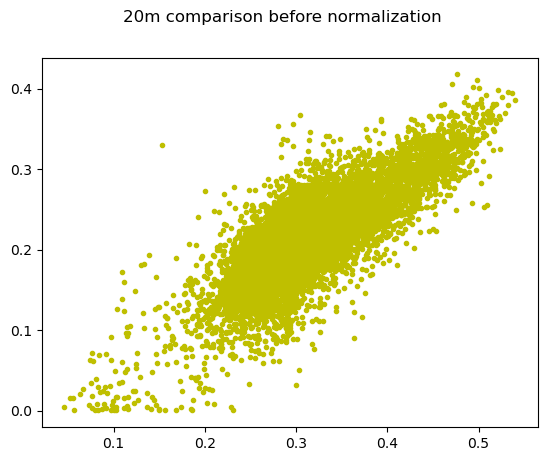

20m before Norm {'B8A_RMSE': 0.10154654807208617, 'B8A_SSIM': 0.6421615399201467, 'B8A_R2': -4.060292750425395}


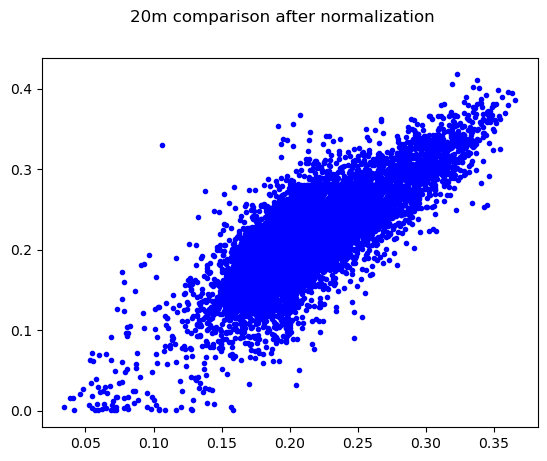

20m After norm {'B8A_norm_RMSE': 0.02697937599532254, 'B8A_norm_SSIM': 0.6283895322044858, 'B8A_norm_R2': 0.6428019211918765}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.15797220817129817 SSIM: 0.5553789572387641 R2: -16.875591764954937 60m before Norm
***************************************************************************************************************************


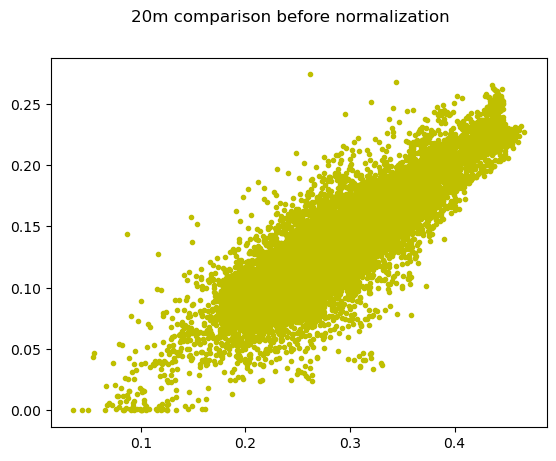

20m before Norm {'B11_RMSE': 0.15857403189987554, 'B11_SSIM': 0.5418698052943627, 'B11_R2': -13.831732064510982}


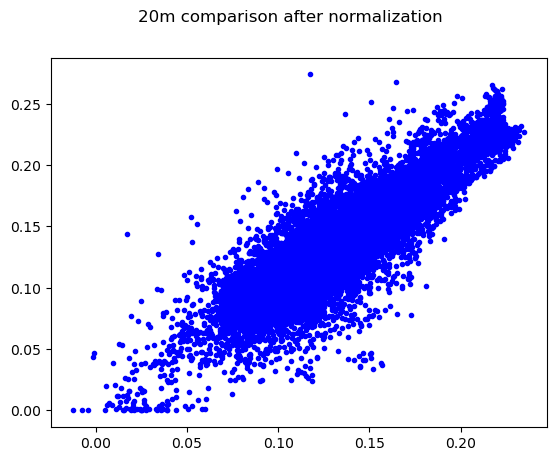

20m After norm {'B11_norm_RMSE': 0.01988886652627221, 'B11_norm_SSIM': 0.6523924195906595, 'B11_norm_R2': 0.7666822388547602}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.10472153386133987 SSIM: 0.6069202215258486 R2: -4.923709002340086 60m before Norm
***************************************************************************************************************************


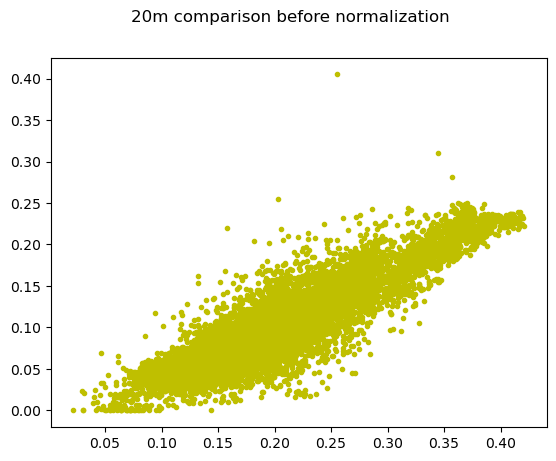

20m before Norm {'B12_RMSE': 0.10568560918237226, 'B12_SSIM': 0.560064755779711, 'B12_R2': -4.102472358022376}


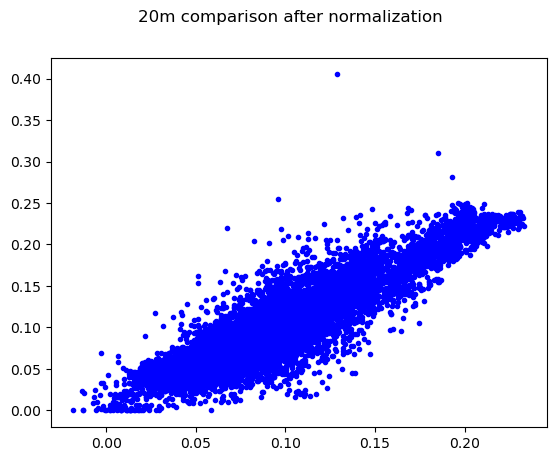

20m After norm {'B12_norm_RMSE': 0.019788921015240758, 'B12_norm_SSIM': 0.6845230495155114, 'B12_norm_R2': 0.8211070685691495}
----------------------------------------------------------------------------------------------------------------------
JORN
F:/neon/normalization/S2/S2_20m_JORN.tif
F:/neon/normalization/NEON/NEON_D14_JORN_DP1_20190825_165611_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_JORN.tif
F:/neon/normalization/NEON/NEON_60m_JORN.tif
Band B2
RMSE: 0.017730379206999058 SSIM: 0.4924843836607407 R2: -2.47696026556781 60m before Norm
***************************************************************************************************************************


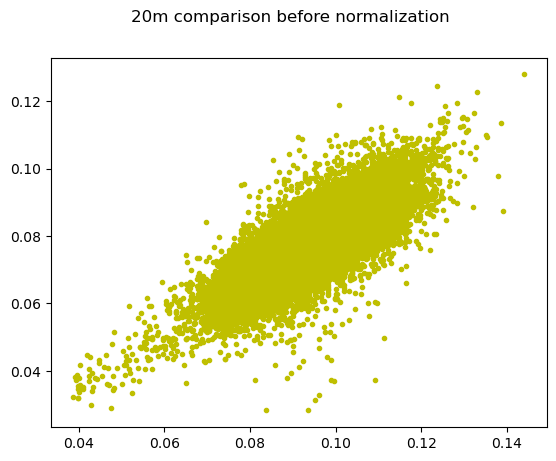

20m before Norm {'B2_RMSE': 0.017994913364861538, 'B2_SSIM': 0.6013733721072978, 'B2_R2': -2.185646906853033}


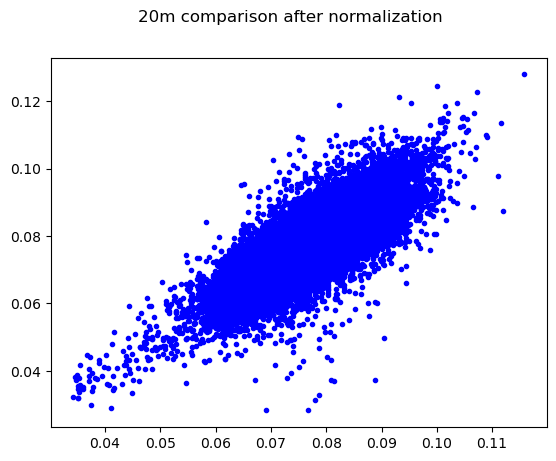

20m After norm {'B2_norm_RMSE': 0.005928730929345947, 'B2_norm_SSIM': 0.5788452412225702, 'B2_norm_R2': 0.6542026994784509}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.045920747571497195 SSIM: 0.4986605733234365 R2: -13.640032696885514 60m before Norm
***************************************************************************************************************************


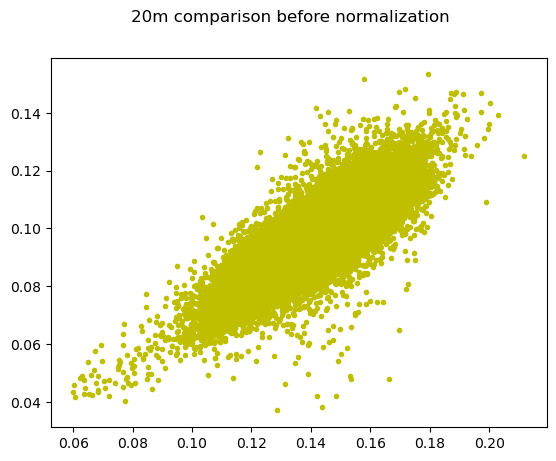

20m before Norm {'B3_RMSE': 0.04613165263585008, 'B3_SSIM': 0.5895048340542636, 'B3_R2': -11.956760501834124}


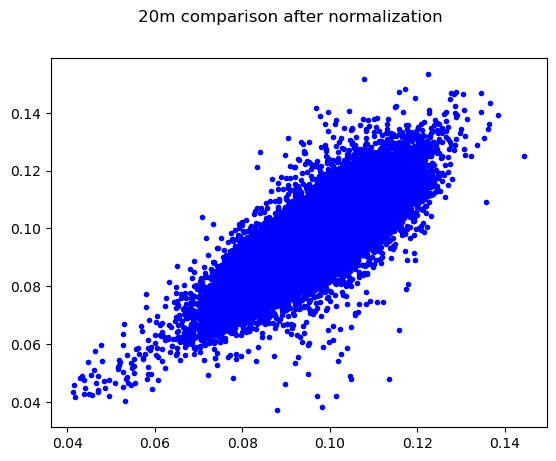

20m After norm {'B3_norm_RMSE': 0.007249178773978229, 'B3_norm_SSIM': 0.5867074064636714, 'B3_norm_R2': 0.6800544861496753}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.06304930023875327 SSIM: 0.5851016086703341 R2: -7.962252220080126 60m before Norm
***************************************************************************************************************************


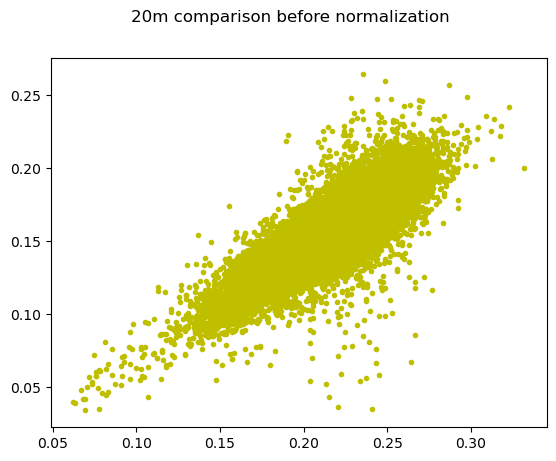

20m before Norm {'B4_RMSE': 0.06355680630983554, 'B4_SSIM': 0.6074884929983292, 'B4_R2': -6.444065166643489}


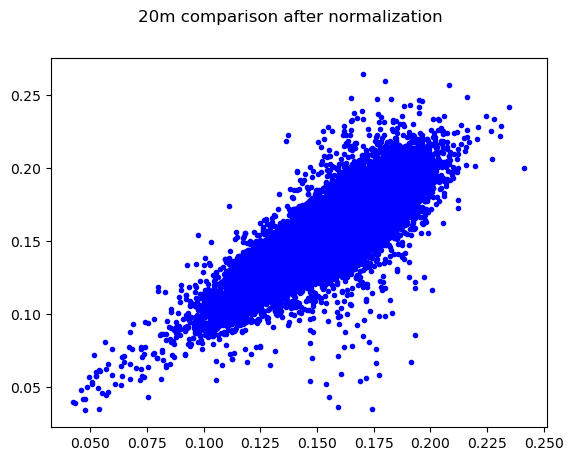

20m After norm {'B4_norm_RMSE': 0.012667621510736698, 'B4_norm_SSIM': 0.5923204331949837, 'B4_norm_R2': 0.7042830679392116}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.08983931892173709 SSIM: 0.5565153397940072 R2: -17.5231577888577 60m before Norm
***************************************************************************************************************************


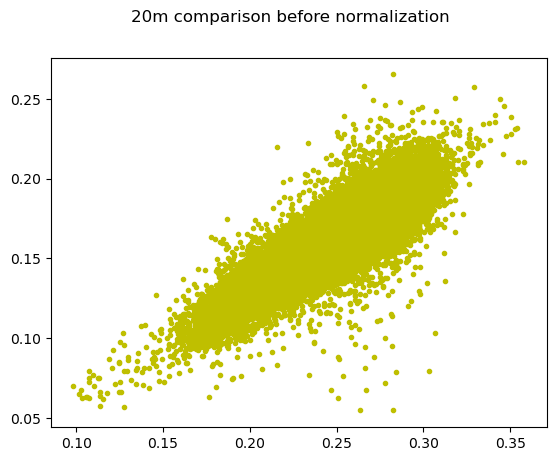

20m before Norm {'B5_RMSE': 0.09006108560186377, 'B5_SSIM': 0.5834075666404568, 'B5_R2': -14.583713565060242}


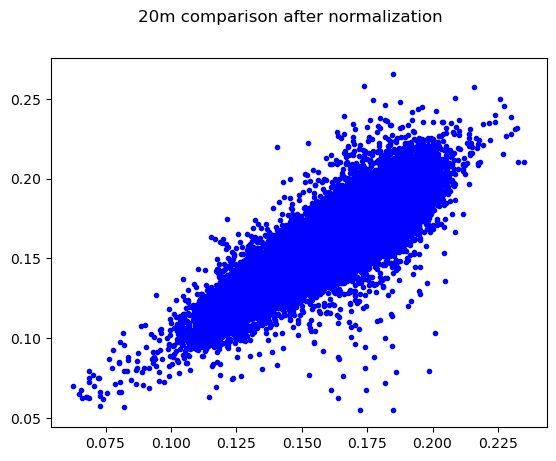

20m After norm {'B5_norm_RMSE': 0.012147453613297499, 'B5_norm_SSIM': 0.5645115613049703, 'B5_norm_R2': 0.7164908366205801}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.10854898569848763 SSIM: 0.5108156826896679 R2: -29.398425375554122 60m before Norm
***************************************************************************************************************************


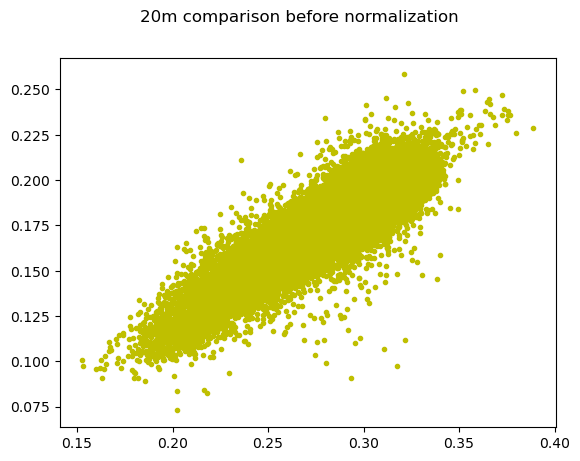

20m before Norm {'B6_RMSE': 0.10862546898714324, 'B6_SSIM': 0.5926607742538731, 'B6_R2': -25.679688621996124}


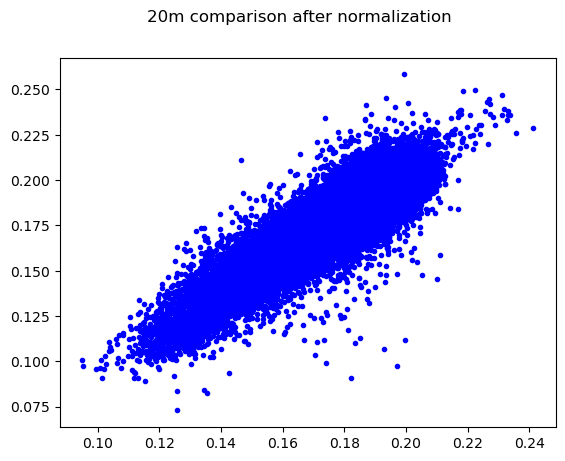

20m After norm {'B6_norm_RMSE': 0.01052953076915992, 'B6_norm_SSIM': 0.5904636587054065, 'B6_norm_R2': 0.7493108928116825}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.1070125348437905 SSIM: 0.5036850894796439 R2: -24.79151077343568 60m before Norm
***************************************************************************************************************************


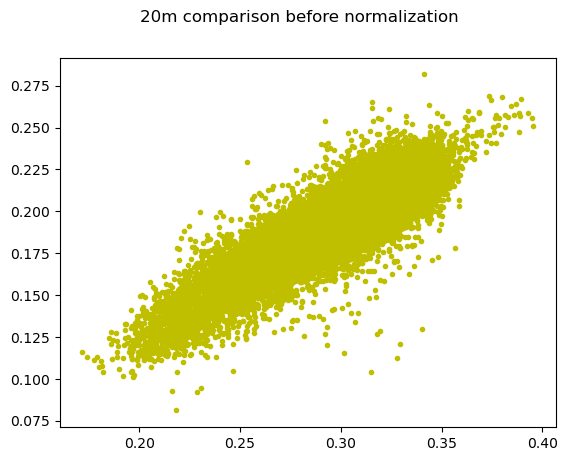

20m before Norm {'B7_RMSE': 0.10716844565500336, 'B7_SSIM': 0.593505113876855, 'B7_R2': -21.891435532985298}


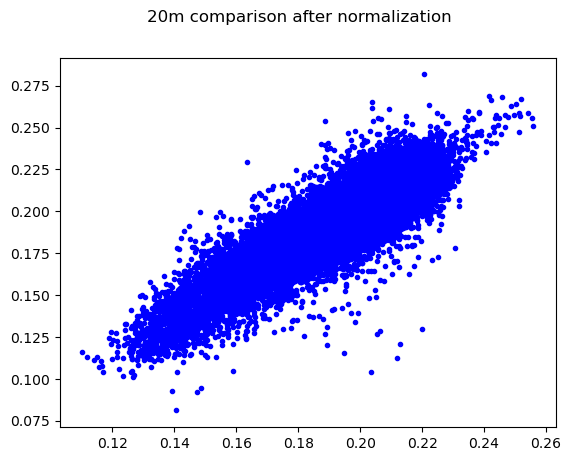

20m After norm {'B7_norm_RMSE': 0.011216447505483548, 'B7_norm_SSIM': 0.5857557755796792, 'B7_norm_R2': 0.7492448733398644}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.09691490786296166 SSIM: 0.49633958947013956 R2: -19.037489397691964 60m before Norm
***************************************************************************************************************************


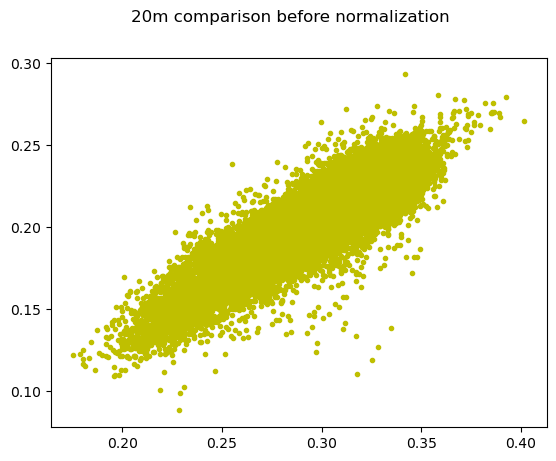

20m before Norm {'B8_RMSE': 0.09699052547143297, 'B8_SSIM': 0.6189881402529839, 'B8_R2': -16.82882624803207}


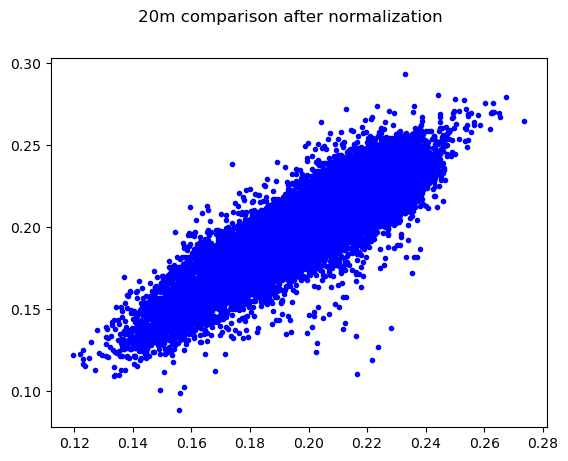

20m After norm {'B8_norm_RMSE': 0.011547265559264967, 'B8_norm_SSIM': 0.6165721661845227, 'B8_norm_R2': 0.7472899955583556}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.0922331103642503 SSIM: 0.4843688934207338 R2: -15.185041933113357 60m before Norm
***************************************************************************************************************************


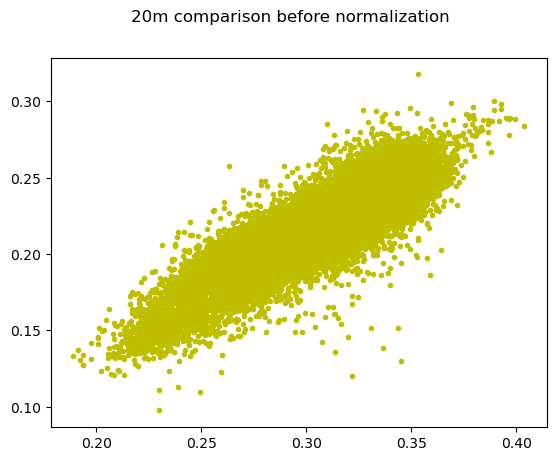

20m before Norm {'B8A_RMSE': 0.092423352970743, 'B8A_SSIM': 0.6002494930842149, 'B8A_R2': -13.523073924195042}


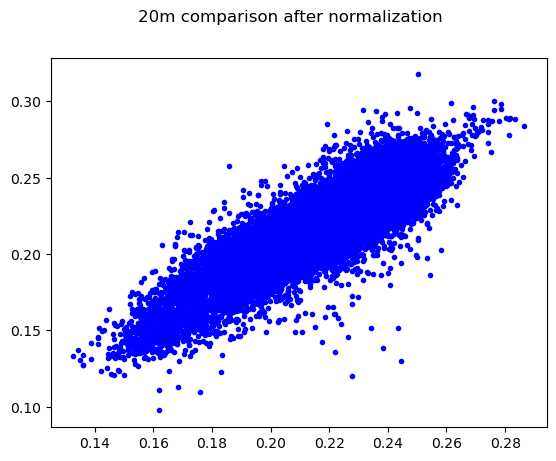

20m After norm {'B8A_norm_RMSE': 0.012455164009459004, 'B8A_norm_SSIM': 0.5767738563185711, 'B8A_norm_R2': 0.7362490640700885}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.1607778582695188 SSIM: 0.4034211340934061 R2: -73.61078302942245 60m before Norm
***************************************************************************************************************************


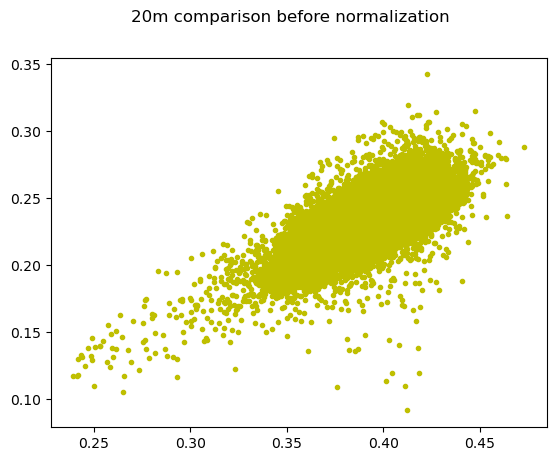

20m before Norm {'B11_RMSE': 0.16087158814402466, 'B11_SSIM': 0.5113715593751125, 'B11_R2': -64.21802085347962}


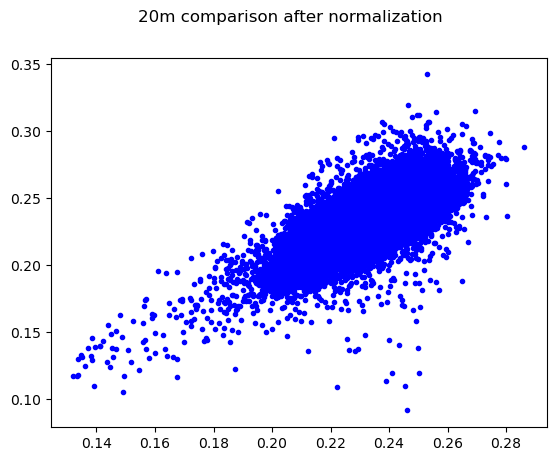

20m After norm {'B11_norm_RMSE': 0.013592866094251763, 'B11_norm_SSIM': 0.4742443489550852, 'B11_norm_R2': 0.5343806780996432}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.11706122965479111 SSIM: 0.4886011855246106 R2: -26.08582867222109 60m before Norm
***************************************************************************************************************************


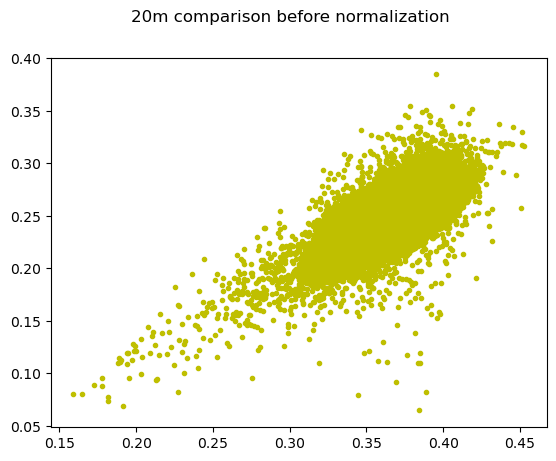

20m before Norm {'B12_RMSE': 0.11728299501958328, 'B12_SSIM': 0.5362657516586855, 'B12_R2': -21.26658913704046}


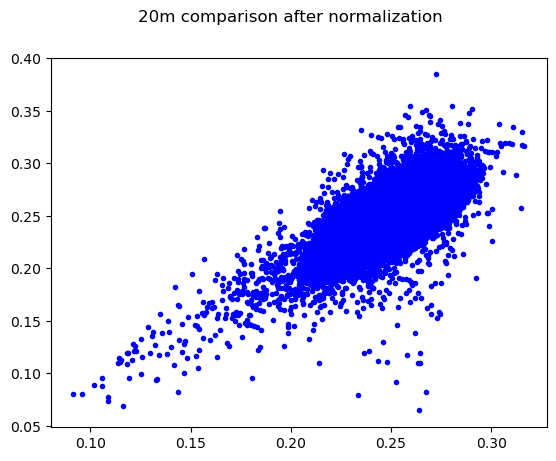

20m After norm {'B12_norm_RMSE': 0.016372018223713952, 'B12_norm_SSIM': 0.4999131213972198, 'B12_norm_R2': 0.5661016100565528}
----------------------------------------------------------------------------------------------------------------------
ABBY
F:/neon/normalization/S2/S2_20m_ABBY.tif
F:/neon/normalization/NEON/NEON_D16_ABBY_DP1_20210719_191207_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_ABBY.tif
F:/neon/normalization/NEON/NEON_60m_ABBY.tif
Band B2
RMSE: 0.004548850467575008 SSIM: 0.8510529052049253 R2: 0.7195021876087968 60m before Norm
***************************************************************************************************************************


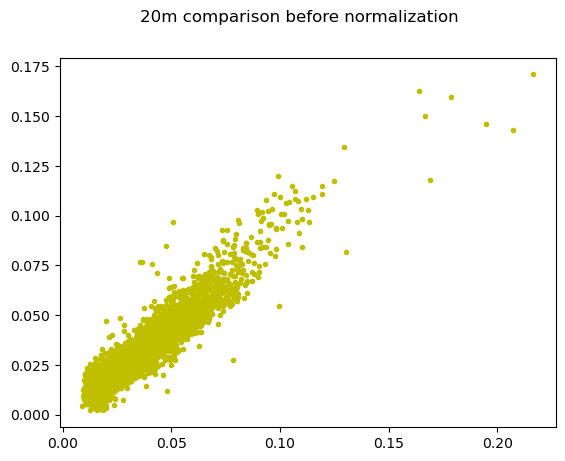

20m before Norm {'B2_RMSE': 0.005031522632724298, 'B2_SSIM': 0.9074963540826014, 'B2_R2': 0.7890639904050559}


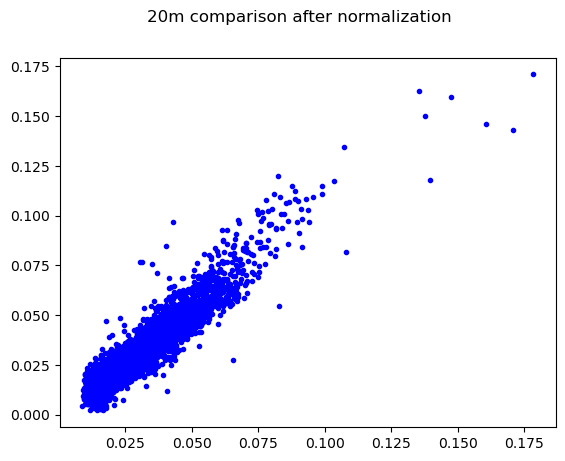

20m After norm {'B2_norm_RMSE': 0.0037761749837847453, 'B2_norm_SSIM': 0.9007744992294546, 'B2_norm_R2': 0.8811891545115756}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.007678642013112443 SSIM: 0.7995942222464112 R2: 0.42355918133046755 60m before Norm
***************************************************************************************************************************


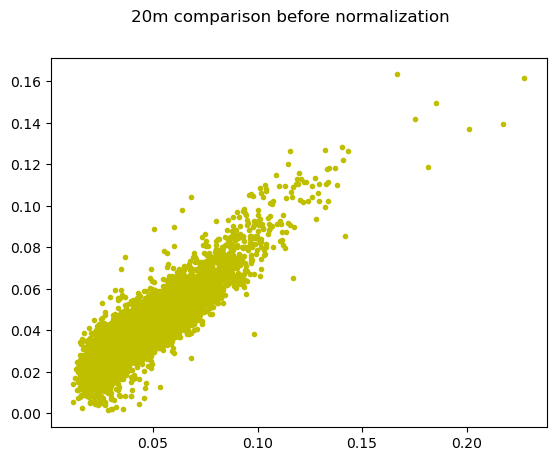

20m before Norm {'B3_RMSE': 0.008333989733617406, 'B3_SSIM': 0.8627486079095441, 'B3_R2': 0.5583561401728458}


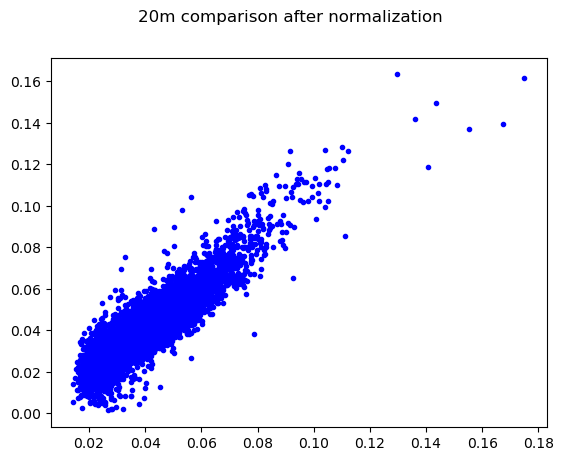

20m After norm {'B3_norm_RMSE': 0.005345217799274732, 'B3_norm_SSIM': 0.8493391251210022, 'B3_norm_R2': 0.8183241978535226}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.006947890811634042 SSIM: 0.8792447513521991 R2: 0.7216423700692081 60m before Norm
***************************************************************************************************************************


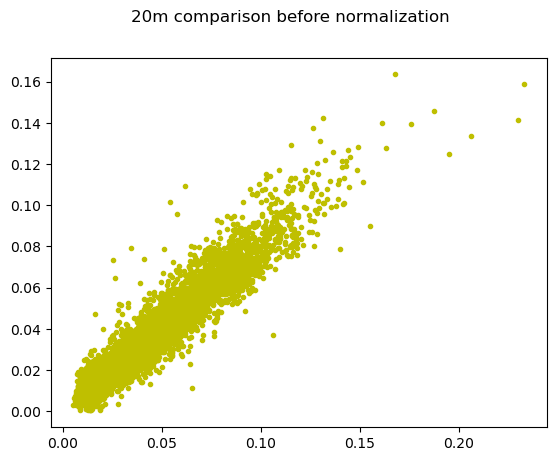

20m before Norm {'B4_RMSE': 0.007555176113628026, 'B4_SSIM': 0.9026245264170438, 'B4_R2': 0.7789724967437254}


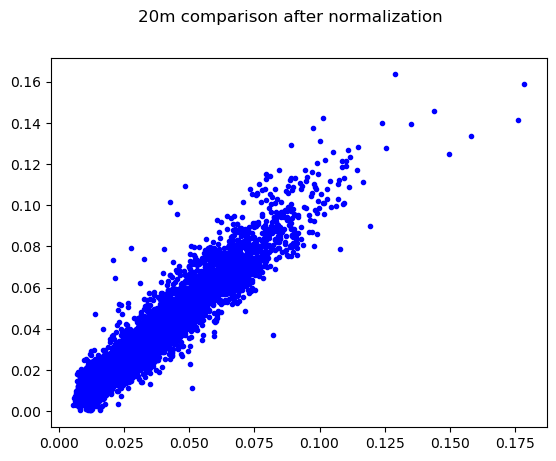

20m After norm {'B4_norm_RMSE': 0.00448945814203286, 'B4_norm_SSIM': 0.9037854602529645, 'B4_norm_R2': 0.9219550176647001}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.01951220422697916 SSIM: 0.7339669162360077 R2: -0.6920586023175761 60m before Norm
***************************************************************************************************************************


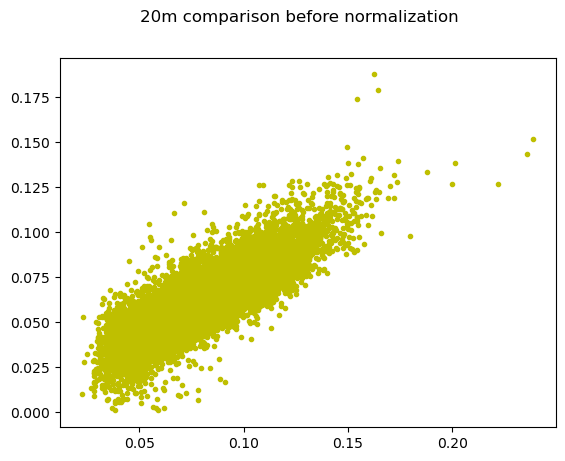

20m before Norm {'B5_RMSE': 0.020629911401616227, 'B5_SSIM': 0.7295916472097893, 'B5_R2': -0.31082302850924703}


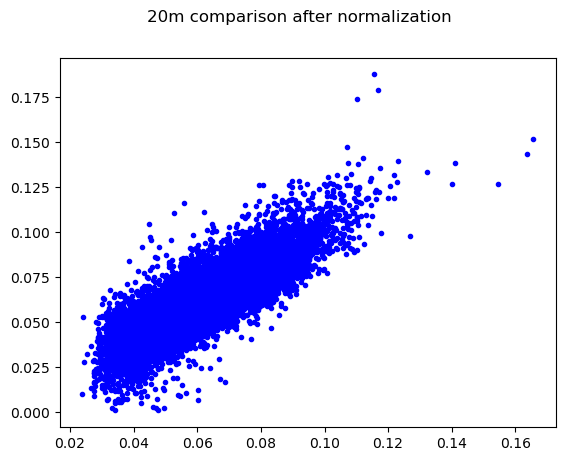

20m After norm {'B5_norm_RMSE': 0.008932535405203421, 'B5_norm_SSIM': 0.7136595087372696, 'B5_norm_R2': 0.7542469993373081}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.02569370691200031 SSIM: 0.7628711099434891 R2: 0.7443272827360292 60m before Norm
***************************************************************************************************************************


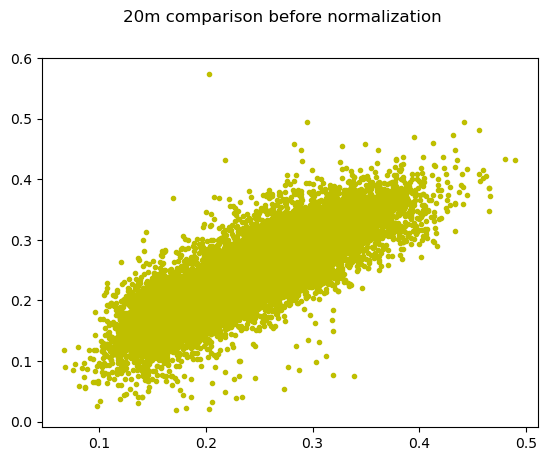

20m before Norm {'B6_RMSE': 0.033431198949688275, 'B6_SSIM': 0.7090116683295687, 'B6_R2': 0.714151545769256}


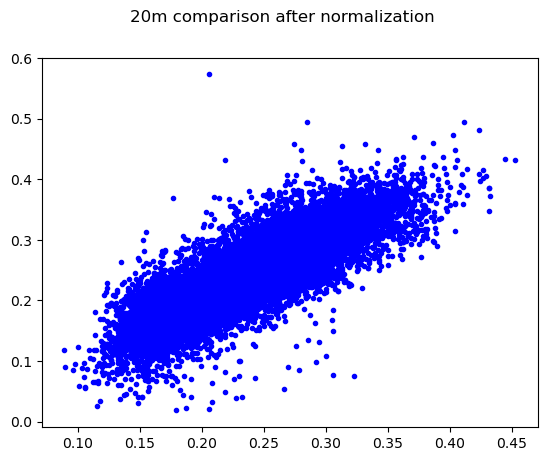

20m After norm {'B6_norm_RMSE': 0.03228367290783873, 'B6_norm_SSIM': 0.685428661476841, 'B6_norm_R2': 0.7334382561727908}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.058175914695405534 SSIM: 0.76549718955592 R2: -0.2889570010835316 60m before Norm
***************************************************************************************************************************


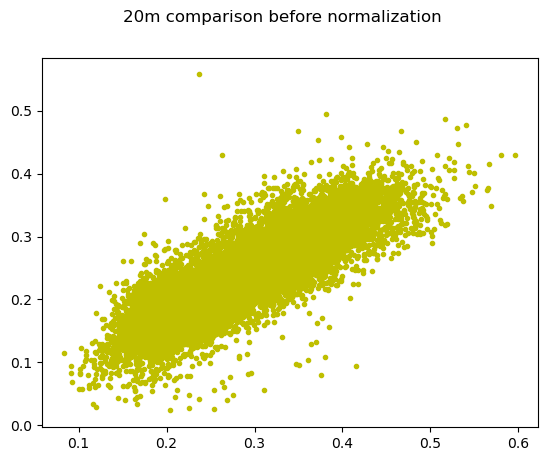

20m before Norm {'B7_RMSE': 0.06269706727726465, 'B7_SSIM': 0.7225568399702968, 'B7_R2': 0.01370805981782186}


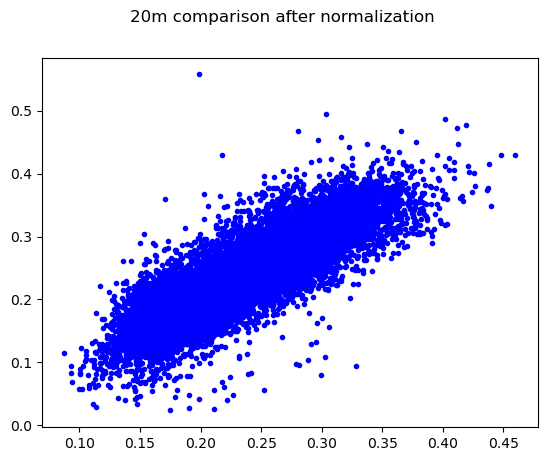

20m After norm {'B7_norm_RMSE': 0.03164297351770308, 'B7_norm_SSIM': 0.698550035300159, 'B7_norm_R2': 0.7487734084162045}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.10250531554060177 SSIM: 0.695844210041628 R2: -4.629058006323422 60m before Norm
***************************************************************************************************************************


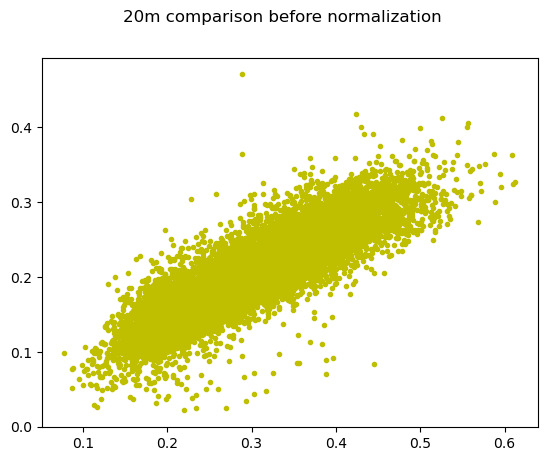

20m before Norm {'B8_RMSE': 0.10503253987384442, 'B8_SSIM': 0.7353172063634013, 'B8_R2': -2.8672199281976387}


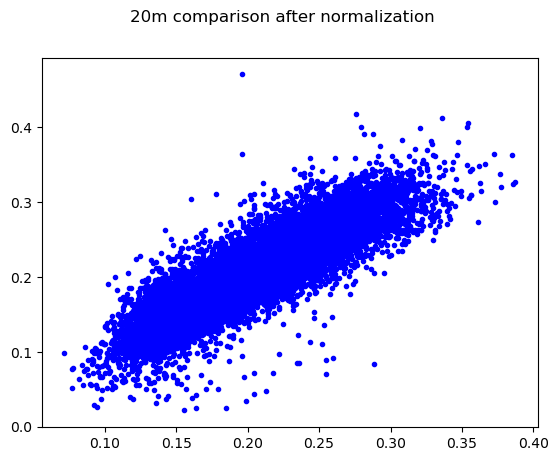

20m After norm {'B8_norm_RMSE': 0.024118740299746023, 'B8_norm_SSIM': 0.7827009126777411, 'B8_norm_R2': 0.796079739019161}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.11490763731267958 SSIM: 0.6751548726156145 R2: -6.306066682492057 60m before Norm
***************************************************************************************************************************


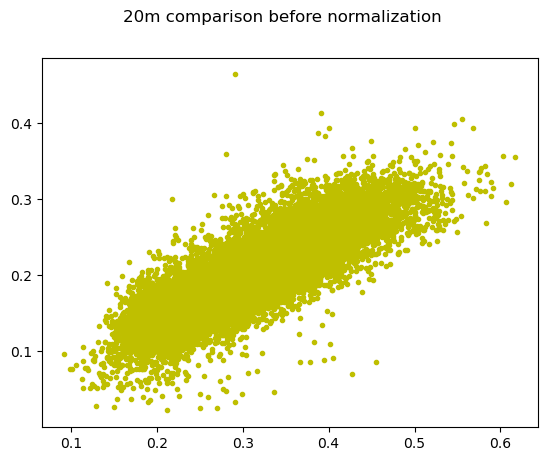

20m before Norm {'B8A_RMSE': 0.11770512452433272, 'B8A_SSIM': 0.662189063817441, 'B8A_R2': -4.020068386067597}


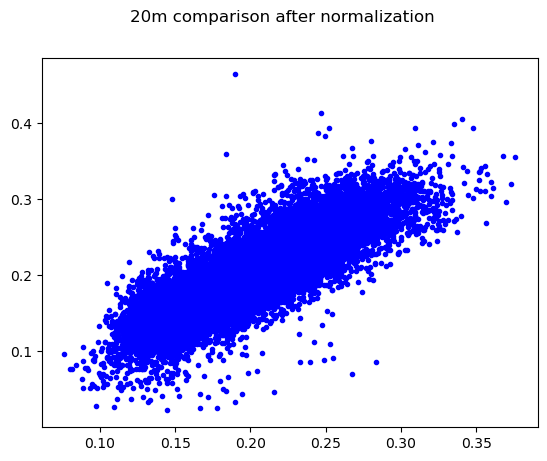

20m After norm {'B8A_norm_RMSE': 0.026565624517369622, 'B8A_norm_SSIM': 0.68796778586066, 'B8A_norm_R2': 0.7442833825487714}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.04648655414902574 SSIM: 0.7490846111033238 R2: -1.437900244441134 60m before Norm
***************************************************************************************************************************


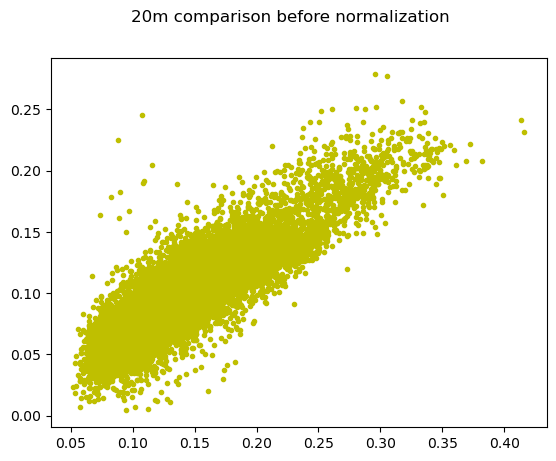

20m before Norm {'B11_RMSE': 0.047779759391548667, 'B11_SSIM': 0.7167388244423214, 'B11_R2': -0.858828256712342}


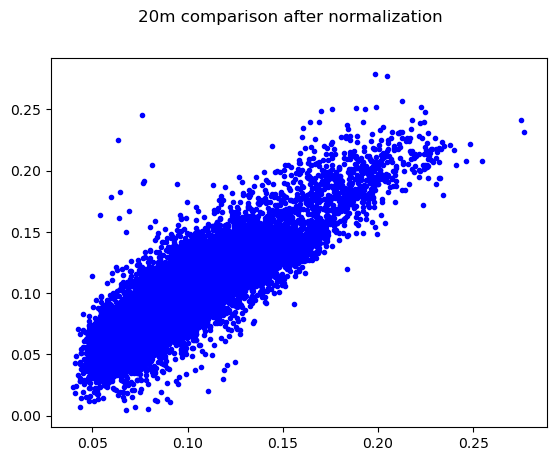

20m After norm {'B11_norm_RMSE': 0.01572650186609487, 'B11_norm_SSIM': 0.706074210723905, 'B11_norm_R2': 0.798620336637273}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.018635325942029313 SSIM: 0.8404614493774208 R2: 0.3745296432847567 60m before Norm
***************************************************************************************************************************


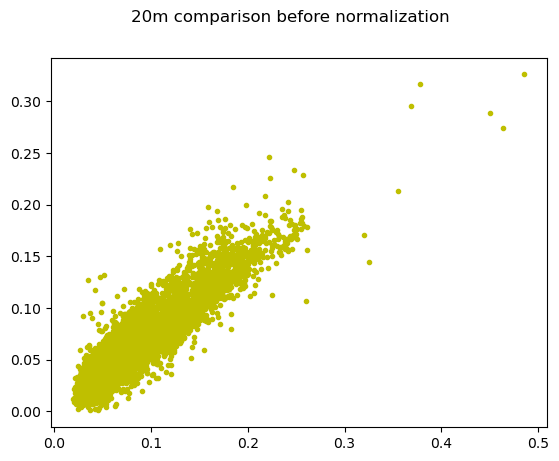

20m before Norm {'B12_RMSE': 0.01988532428893445, 'B12_SSIM': 0.8428415467468936, 'B12_R2': 0.47030196817787484}


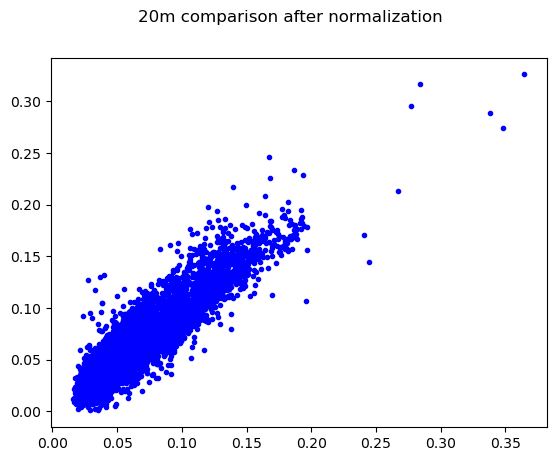

20m After norm {'B12_norm_RMSE': 0.010170794614709763, 'B12_norm_SSIM': 0.8364052749978811, 'B12_norm_R2': 0.8614288655609186}
----------------------------------------------------------------------------------------------------------------------
SJER
F:/neon/normalization/S2/S2_20m_SJER.tif
F:/neon/normalization/NEON/NEON_D17_SJER_DP1_20210331_200812_reflectance_10m.tif
F:/neon/normalization/S2/S2_60m_SJER.tif
F:/neon/normalization/NEON/NEON_60m_SJER.tif
Band B2
RMSE: 0.012841281859012193 SSIM: 0.8943653141748151 R2: 0.27773820402612615 60m before Norm
***************************************************************************************************************************


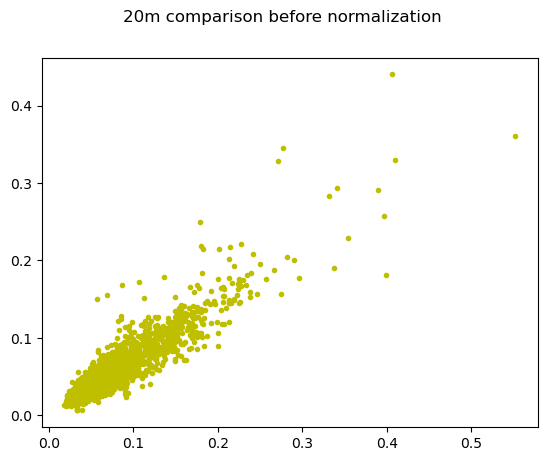

20m before Norm {'B2_RMSE': 0.014115249622666524, 'B2_SSIM': 0.8947354306416435, 'B2_R2': 0.3093734725890612}


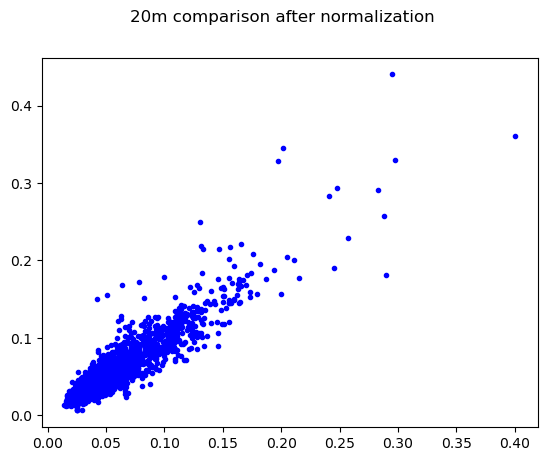

20m After norm {'B2_norm_RMSE': 0.0063408919301966805, 'B2_norm_SSIM': 0.9172113114328259, 'B2_norm_R2': 0.8606307917074364}
----------------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.02394012998788539 SSIM: 0.8396810109855907 R2: -1.7140996948822158 60m before Norm
***************************************************************************************************************************


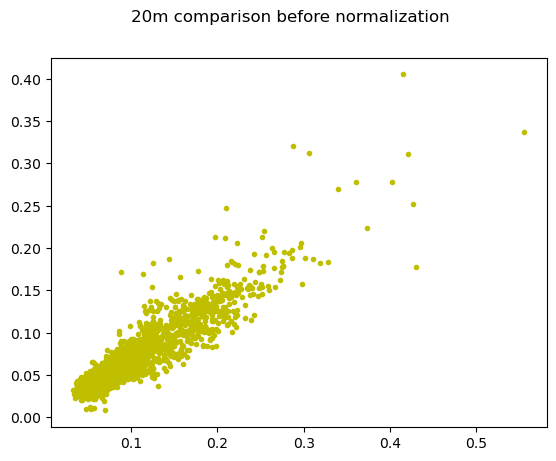

20m before Norm {'B3_RMSE': 0.025022495595007167, 'B3_SSIM': 0.8431775096021382, 'B3_R2': -1.3455808091302512}


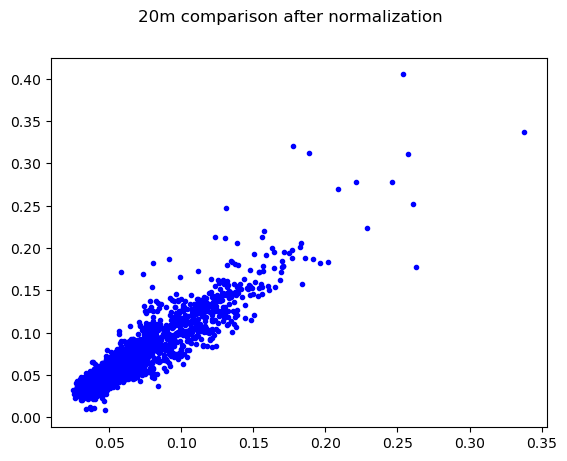

20m After norm {'B3_norm_RMSE': 0.006642896735852931, 'B3_norm_SSIM': 0.8730818921358904, 'B3_norm_R2': 0.8346880839930324}
----------------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.01803205233156249 SSIM: 0.8672505550639801 R2: 0.27819694334638956 60m before Norm
***************************************************************************************************************************


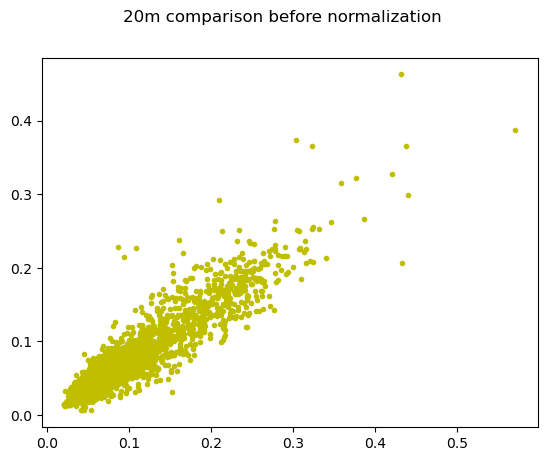

20m before Norm {'B4_RMSE': 0.01978627900701515, 'B4_SSIM': 0.8565565477640187, 'B4_R2': 0.31054214651793455}


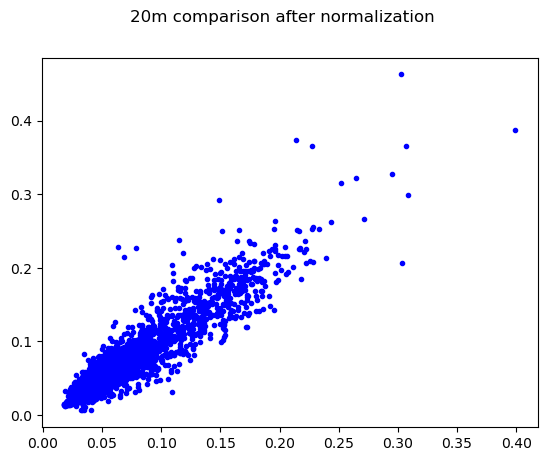

20m After norm {'B4_norm_RMSE': 0.008955054046586254, 'B4_norm_SSIM': 0.869908617020323, 'B4_norm_R2': 0.8587736002311431}
----------------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.043167490668078325 SSIM: 0.745156349731681 R2: -6.345480309956377 60m before Norm
***************************************************************************************************************************


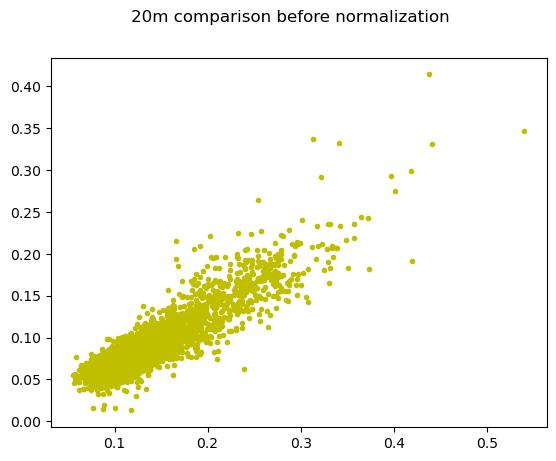

20m before Norm {'B5_RMSE': 0.044274717449274914, 'B5_SSIM': 0.7466169960040342, 'B5_R2': -4.758060122334263}


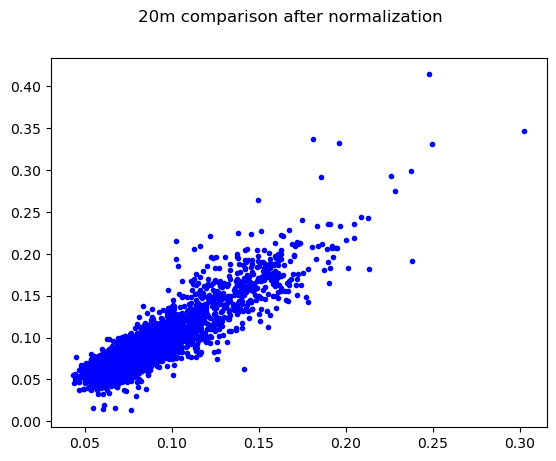

20m After norm {'B5_norm_RMSE': 0.009098401497364999, 'B5_norm_SSIM': 0.745194303036982, 'B5_norm_R2': 0.7568385111658354}
----------------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.09951711949448544 SSIM: 0.6955333893527351 R2: -14.755857608668636 60m before Norm
***************************************************************************************************************************


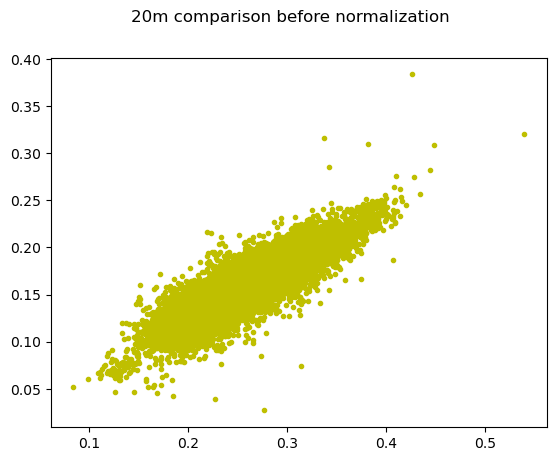

20m before Norm {'B6_RMSE': 0.10077815052315688, 'B6_SSIM': 0.639511191023574, 'B6_R2': -10.789283688245904}


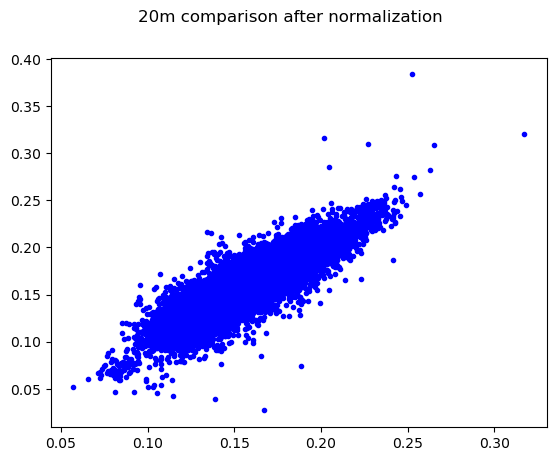

20m After norm {'B6_norm_RMSE': 0.013608915491262993, 'B6_norm_SSIM': 0.690141326054728, 'B6_norm_R2': 0.78501820492426}
----------------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.10895389864088179 SSIM: 0.7274207716805611 R2: -10.652431750198556 60m before Norm
***************************************************************************************************************************


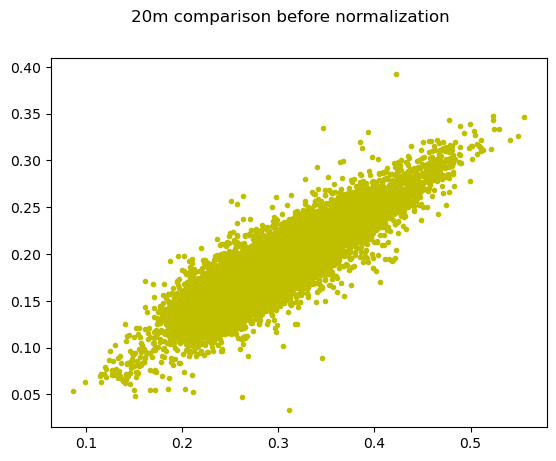

20m before Norm {'B7_RMSE': 0.11046294434508928, 'B7_SSIM': 0.6437645878544085, 'B7_R2': -7.844243660173834}


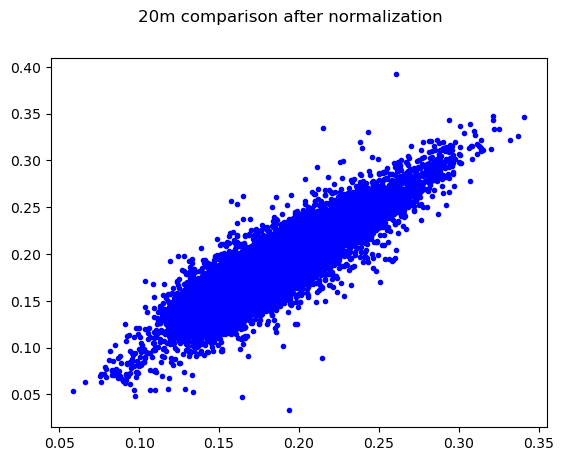

20m After norm {'B7_norm_RMSE': 0.0163175651603616, 'B7_norm_SSIM': 0.6902064454886325, 'B7_norm_R2': 0.8070085006237143}
----------------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.12114380076889562 SSIM: 0.7182797911017288 R2: -12.283069813648561 60m before Norm
***************************************************************************************************************************


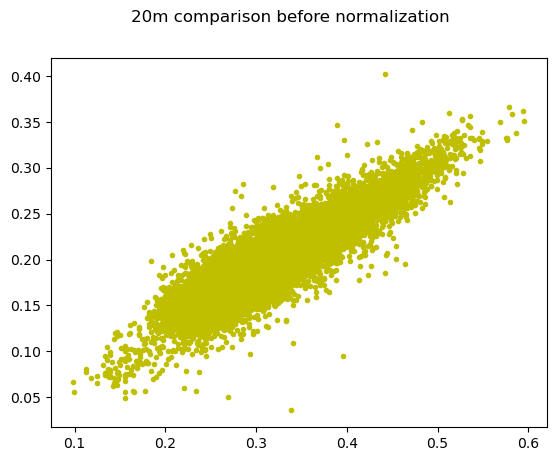

20m before Norm {'B8_RMSE': 0.12282252490317937, 'B8_SSIM': 0.6334760884312916, 'B8_R2': -9.050987613289756}


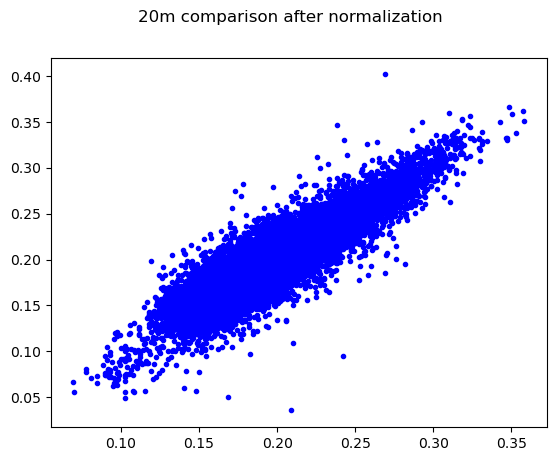

20m After norm {'B8_norm_RMSE': 0.01685584345839558, 'B8_norm_SSIM': 0.7017890412863166, 'B8_norm_R2': 0.810698666099813}
----------------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.09880702519905478 SSIM: 0.7691650624887473 R2: -6.268847425042814 60m before Norm
***************************************************************************************************************************


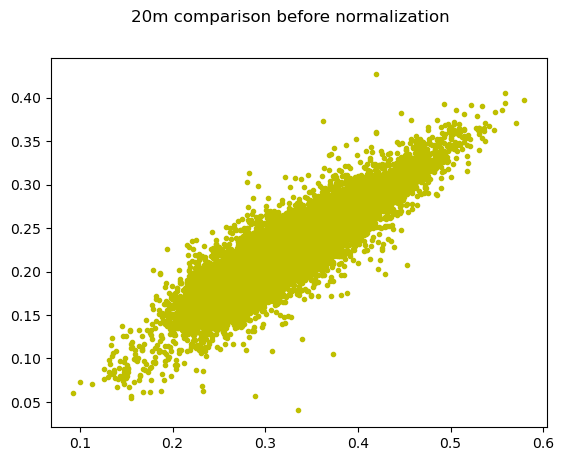

20m before Norm {'B8A_RMSE': 0.1005316488147028, 'B8A_SSIM': 0.6671807367662138, 'B8A_R2': -4.565179948123509}


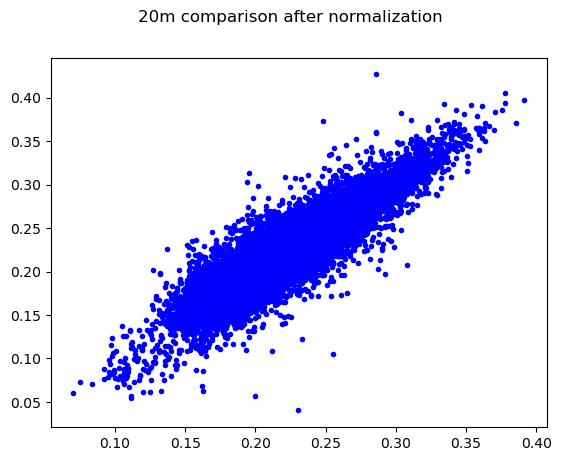

20m After norm {'B8A_norm_RMSE': 0.01890884163461918, 'B8A_norm_SSIM': 0.6786858789215222, 'B8A_norm_R2': 0.8031191617123495}
----------------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.07850862303570043 SSIM: 0.714753222300897 R2: -9.251251060362845 60m before Norm
***************************************************************************************************************************


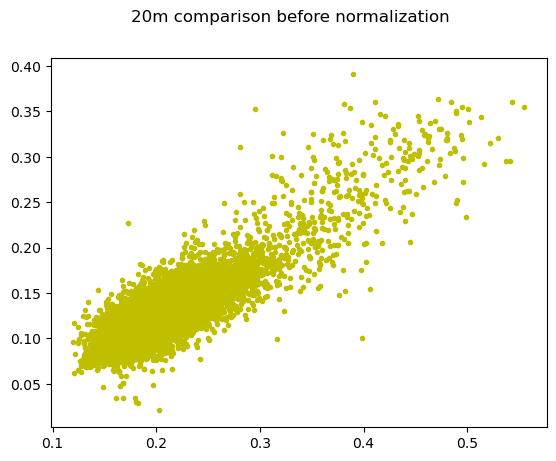

20m before Norm {'B11_RMSE': 0.07991268404004544, 'B11_SSIM': 0.6218292926213157, 'B11_R2': -6.509637657943629}


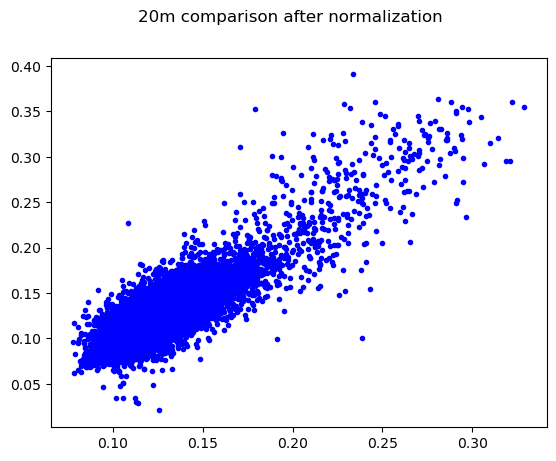

20m After norm {'B11_norm_RMSE': 0.015355965550861295, 'B11_norm_SSIM': 0.6111878077277018, 'B11_norm_R2': 0.7227051487620372}
----------------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.03960497747537138 SSIM: 0.8138101834761583 R2: -0.5302396950706709 60m before Norm
***************************************************************************************************************************


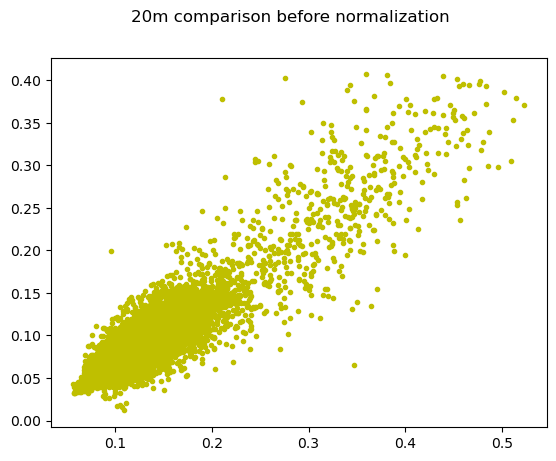

20m before Norm {'B12_RMSE': 0.04210073862670279, 'B12_SSIM': 0.7105490632374066, 'B12_R2': -0.31336224516965494}


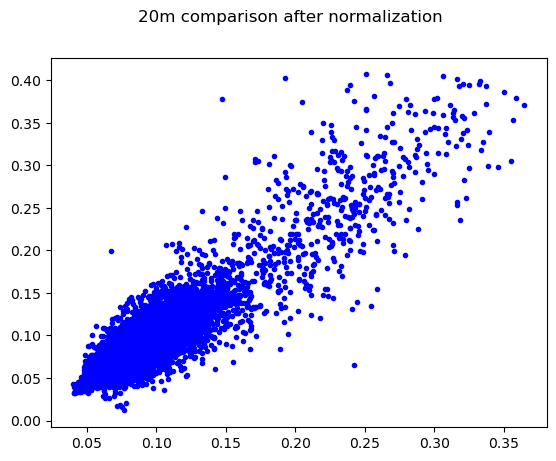

20m After norm {'B12_norm_RMSE': 0.016288640585416365, 'B12_norm_SSIM': 0.7006292630491492, 'B12_norm_R2': 0.8034039543592552}
----------------------------------------------------------------------------------------------------------------------


In [6]:
rows_list_linear = []
rows_list_stats = []
rows_list_norm_stats = []

for file in os.listdir(NEON_dir):
    if file.endswith('10m.tif'):
        site=file.split('_')[2]
        print (site)
        NEON_10m=NEON_dir+file
        S2_20m=S2_dir+'S2_20m_'+site+'.tif'
        NEON_60m=NEON_dir+'NEON_60m_'+site+'.tif'
        NEON_20m=NEON_dir+'NEON_20m_'+site+'.tif'
        S2_20m=S2_dir+'S2_20m_'+site+'.tif'
        S2_60m=S2_dir+'S2_60m_'+site+'.tif'
        print (S2_20m)
        print (NEON_10m)
        print (S2_60m)
        print (NEON_60m)
#         ## generate 60m file to smooth the image
#         raster_rprj1 = gdal.Warp(NEON_60m, NEON_10m, xRes=60, yRes=60, resampleAlg = "average")
#         raster_rprj1 = None
        
        # raster_rprj = gdal.Warp(S2_60m, S2_20m, xRes=60, yRes=60, resampleAlg = "average")
        # raster_rprj = None
        
        # raster_rprj0 = gdal.Warp(NEON_20m, NEON_10m, xRes=20, yRes=20, resampleAlg = "average")
        # raster_rprj0 = None
        ## open 60m file
        ds_S2_60m = gdal.Open(S2_60m)
        ds_NEON_60m = gdal.Open(NEON_60m)
        ds_NEON_20m = gdal.Open(NEON_20m)
        ds_S2_20m = gdal.Open(S2_20m)
           
        ## get the site name, like 'ABBY'
        s_linear={'site': site}  
        s_stats={'site': site} 
        s_norm_stats={'site': site} 
        for ind in bands_related:      
            
            ## get the band name and the corresponding band number in the image file, like B2, NEON:2, S2:1, the index starting from 1
            bandname=ind['band']
            NEON_ind=ind['NEON']
            S2_ind=ind['S2'] 
            print ('Band', bandname)
            
            ### get each band from the S2 and NEON files
            S2_B=np.array(ds_S2_60m.GetRasterBand(S2_ind).ReadAsArray())
            NEON_B=np.array(ds_NEON_60m.GetRasterBand(NEON_ind).ReadAsArray())

            S2_B = np.where(S2_B==-9999, np.nan, S2_B)
            NEON_B = np.where(NEON_B==-9999, np.nan, NEON_B)
            S2_B=S2_B/10000
            
            # print (NEON_B.shape,'NEON')
            # print (S2_B.shape,'S2')

            mask = ~np.isnan(S2_B) & ~np.isnan(NEON_B)
            NEON_B_mask = NEON_B[mask]
            S2_B_mask = S2_B[mask]
            # scipy.stats.theilslopes(y, x=None, alpha=0.95, method='separate')
            # Method to be used for computing estimate for intercept. Following methods are supported,
            # ‘joint’: Uses np.median(y - slope * x) as intercept.
            # ‘separate’: Uses np.median(y) - slope * np.median(x) as intercept.
            # The default is ‘separate’.
            # B3_reg = stats.theilslopes(S2_B3_mask, NEON_B3_mask, 0.90, 'joint')
            B_reg = stats.theilslopes(NEON_B_mask,S2_B_mask, 0.95, 'joint')
            
          ## generate a dictionary to output the coefficient of linear regression           
            key_slope=bandname+'_slope'
            key_intercept=bandname+'_intercept'
            # print (bandname, NEON_ind, S2_ind) 
            # s2={bandname:{'slope': NEON_ind, 'intercept':S2_ind}}
            # s2={key_slope: B_reg[0], key_intercept:B_reg[1]}         
            # s_linear.update(s2)

            ## calculate stats before normalization

            key_rmse=bandname+'_RMSE'
            key_ssim=bandname+'_SSIM'
            key_r2=bandname+'_R2'

            # mean_squared_error(y_actual, y_predicted, squared=False)
            RMSE = mean_squared_error(NEON_B_mask,S2_B_mask,squared=False) 
            ## ssim
            # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
            SSIM = ssim(NEON_B_mask,S2_B_mask,data_range=(S2_B_mask.max()-S2_B_mask.min())) 
            ## R2
            # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
            R2 = r2_score(NEON_B_mask,S2_B_mask)
            # s3={key_rmse: RMSE,  key_ssim:SSIM, key_r2:R2}   
            # s_stats.update(s3)
            # print ('Before norm 60m',s3)
            print ('RMSE:',RMSE, 'SSIM:',SSIM, 'R2:',R2, '60m before Norm')

            # fig1 = plt.figure('')
            # fig1.suptitle('60m comparison before normalization')
            # ax = fig1.add_subplot(111)
            # # ax.plot( NEON_B3_mask, S2_B3_mask, 'b.')
            # # ax.plot( NEON_B3_mask, B3_reg[1] +B3_reg[0] * NEON_B3_mask, 'r-')
            # ax.plot(S2_B_mask,NEON_B_mask, 'g.')
            # # ax.plot(S2_B3_mask, B3_reg[1] +B3_reg[0] *  S2_B3_mask, 'r-')
            # plt.show()

            ### normalizing 60m    
            S2_B_60m_norm=S2_B_mask*B_reg[0]+B_reg[1]
            ### get the difference between neon and the normalized 60m S2
            S2_60m_bias=np.subtract(NEON_B_mask,S2_B_60m_norm)
            S2_60m_bias_mean=np.nanmean(S2_60m_bias)
            S2_60m_bias_std=np.nanstd(S2_60m_bias)
        
            thresh1=S2_60m_bias_mean+2*S2_60m_bias_std
            thresh2=S2_60m_bias_mean-2*S2_60m_bias_std
            # print (thresh1, 'thresh1')
            # print (thresh2, 'thresh2')
            S2_B_mask = np.where((S2_60m_bias>thresh1)|(S2_60m_bias<thresh2), np.nan, S2_B_mask)
            NEON_B_mask = np.where((S2_60m_bias>thresh1)|(S2_60m_bias<thresh2), np.nan, NEON_B_mask)
            # # S2_B=S2_B/10000
            # print (S2_B_mask)
            mask2 = ~np.isnan(S2_B_mask)
            S2_B_mask2=S2_B_mask[mask2]
            NEON_B_mask2=NEON_B_mask[mask2]
            # print (S2_B_mask2)
            # print (S2_B_mask2.shape, 'S2_B_mask2')
            B_reg2 = stats.theilslopes(NEON_B_mask2,S2_B_mask2)
            # print (B_reg2, 'B_reg2')

            s2={key_slope: B_reg2[0], key_intercept:B_reg2[1]}         
            s_linear.update(s2)
            print ('***************************************************************************************************************************')
            ## used the new regression coefficients for normalizing 20m S2            
      
            NEON_B_20m=np.array(ds_NEON_20m.GetRasterBand(NEON_ind).ReadAsArray())   
            S2_B_20m=np.array(ds_S2_20m.GetRasterBand(S2_ind).ReadAsArray())  
            # print (NEON_B_20m.shape,'NEON_20m')
            # print (S2_B_20m.shape,'S2_20m')

            S2_B_20m = np.where(S2_B_20m==-9999, np.nan, S2_B_20m)
            NEON_B_20m = np.where(NEON_B_20m==-9999, np.nan, NEON_B_20m)
            S2_B_20m=S2_B_20m/10000

            NEON_B_20m_2=NEON_B_20m[:S2_B_20m.shape[0],:S2_B_20m.shape[1]]  
            mask = ~np.isnan(S2_B_20m) & ~np.isnan(NEON_B_20m_2)
            NEON_B_20m_mask = NEON_B_20m_2[mask]
            S2_B_20m_mask = S2_B_20m[mask]
            
            ##########################################################
    
            fig0 = plt.figure()
            fig0.suptitle('20m comparison before normalization')
            ax = fig0.add_subplot(111)
            # ax.plot( NEON_B3_mask, S2_B3_mask, 'b.')
            # ax.plot( NEON_B3_mask, B3_reg[1] +B3_reg[0] * NEON_B3_mask, 'r-')
            ax.plot(S2_B_20m_mask, NEON_B_20m_mask, 'y.')
            # ax.plot(S2_B3_mask, B3_reg[1] +B3_reg[0] *  S2_B3_mask, 'r-')
            plt.show()

            # mean_squared_error(y_actual, y_predicted, squared=False)
            RMSE = mean_squared_error(NEON_B_20m_mask,S2_B_20m_mask,squared=False) 
            ## ssim
            # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
            SSIM = ssim(NEON_B_20m_mask,S2_B_20m_mask,data_range=(S2_B_20m_mask.max()-S2_B_20m_mask.min())) 
            ## R2
            # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
            R2 = r2_score(NEON_B_20m_mask,S2_B_20m_mask)

            # print ('RMSE:',RMSE, 'SSIM:',SSIM, 'R2:',R2, '20m before Norm')

            s3={key_rmse: RMSE,  key_ssim:SSIM, key_r2:R2}   
            s_stats.update(s3)

            print ('20m before Norm',s3)      
            

            S2_B_norm=S2_B_20m_mask*B_reg2[0]+B_reg2[1]
            
            fig = plt.figure()
            fig.suptitle('20m comparison after normalization')
            ax = fig.add_subplot(111)
            # ax.plot( NEON_B3_mask, S2_B3_mask, 'b.')
            # ax.plot( NEON_B3_mask, B3_reg[1] +B3_reg[0] * NEON_B3_mask, 'r-')
            ax.plot(S2_B_norm,NEON_B_20m_mask, 'b.')
            # ax.plot(S2_B3_mask, B3_reg[1] +B3_reg[0] *  S2_B3_mask, 'r-')
            plt.show()        
            
            
            ## nomalization statistics
            key_norm_rmse=bandname+'_norm_RMSE'
            key_norm_ssim=bandname+'_norm_SSIM'
            key_norm_r2=bandname+'_norm_R2'

            # mean_squared_error(y_actual, y_predicted, squared=False)
            RMSE = mean_squared_error(NEON_B_20m_mask,S2_B_norm,squared=False) 
            ## ssim
            # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
            SSIM = ssim(NEON_B_20m_mask,S2_B_norm,data_range=(S2_B_norm.max()-S2_B_norm.min())) 
            ## R2
            # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
            R2 = r2_score(NEON_B_20m_mask,S2_B_norm)
            s4={key_norm_rmse: RMSE,  key_norm_ssim:SSIM, key_norm_r2:R2}   
            s_norm_stats.update(s4)
            print ('20m After norm',s4)
            print ('----------------------------------------------------------------------------------------------------------------------')
            ## 
            
        # print (s1)
        rows_list_linear.append(s_linear)
        rows_list_stats.append(s_stats)
        rows_list_norm_stats.append(s_norm_stats)

# df_coe = pd.DataFrame(rows_list)  
# df_coe.to_csv('linearregression_coe.csv')       

In [ ]:
# print (rows_list_linear)
# print (rows_list_stats)
# print (rows_list_norm_stats)

STEI
F:/neon/normalization/S2/S2_20m_STEI.tif
F:/neon/normalization/S2/S2_60m_STEI.tif
F:/neon/normalization/NEON/NEON_60m_STEI.tif
Band B2
RMSE: 0.015767254574433405 SSIM: 0.6559128202355337 R2: -3.912465015735548 60m before Norm
TheilslopesResult(slope=0.5455423266656938, intercept=-0.00044218414733486824, low_slope=0.533985965434582, high_slope=0.5565758948848093) B_reg2
***************************************************************************************************************************


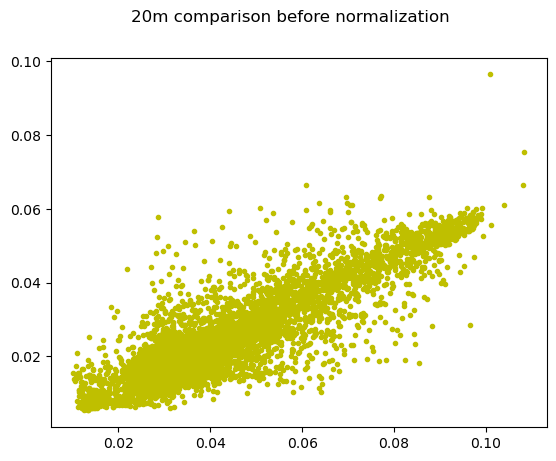

20m before Norm {'B2_RMSE': 0.016226919283027046, 'B2_SSIM': 0.6015657719523081, 'B2_R2': -2.920976832486876}


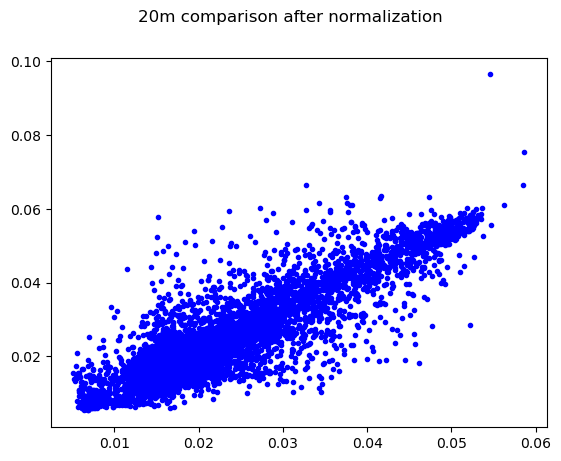

20m After norm {'B2_norm_RMSE': 0.0036206222411994653, 'B2_norm_SSIM': 0.658990998553403, 'B2_norm_R2': 0.8047960711873039}
-------------------------------------------------------------------------------------------------------------
Band B3
RMSE: 0.027755229651908547 SSIM: 0.633929808008184 R2: -8.993197621507663 60m before Norm
TheilslopesResult(slope=0.5496368248714133, intercept=0.00023666291235713982, low_slope=0.5403589890446772, high_slope=0.5587913725883551) B_reg2
***************************************************************************************************************************


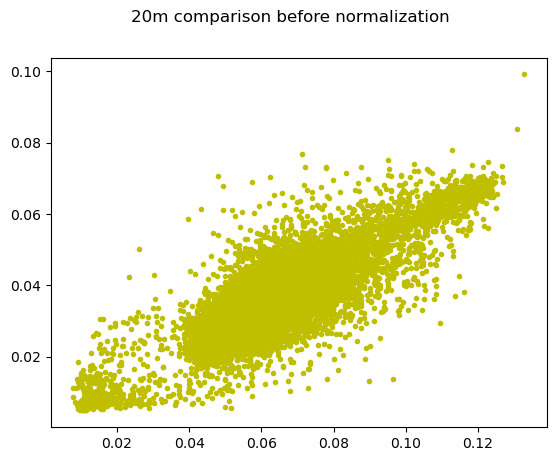

20m before Norm {'B3_RMSE': 0.0282446572076352, 'B3_SSIM': 0.5516883288430872, 'B3_R2': -7.191421317565126}


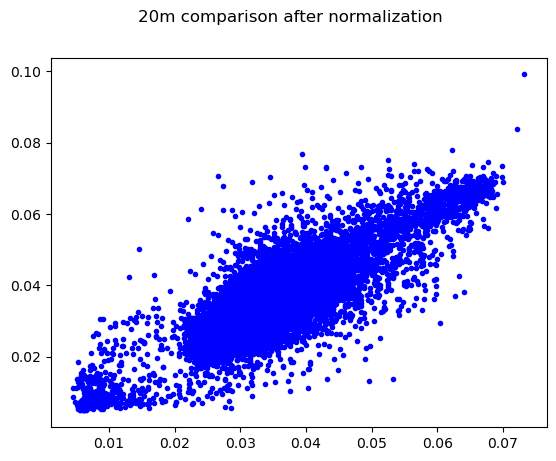

20m After norm {'B3_norm_RMSE': 0.005167505154222151, 'B3_norm_SSIM': 0.5961847548789507, 'B3_norm_R2': 0.7258119743012877}
-------------------------------------------------------------------------------------------------------------
Band B4
RMSE: 0.019694360837598134 SSIM: 0.6574287937057688 R2: -1.4158115873596273 60m before Norm
TheilslopesResult(slope=0.559142508064977, intercept=-0.0024054133431456355, low_slope=0.5499020658640398, high_slope=0.5682358794489427) B_reg2
***************************************************************************************************************************


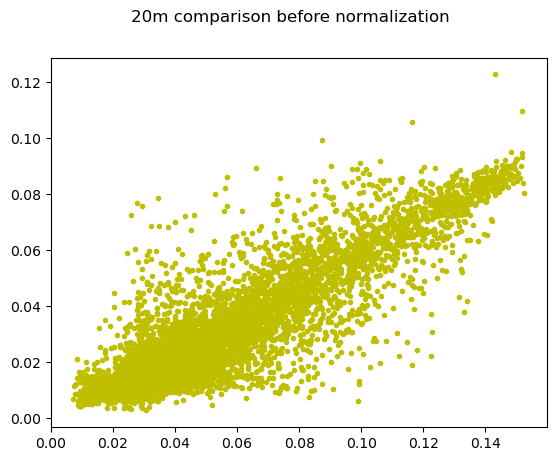

20m before Norm {'B4_RMSE': 0.020582094818330753, 'B4_SSIM': 0.5909684459751343, 'B4_R2': -0.9884188144186314}


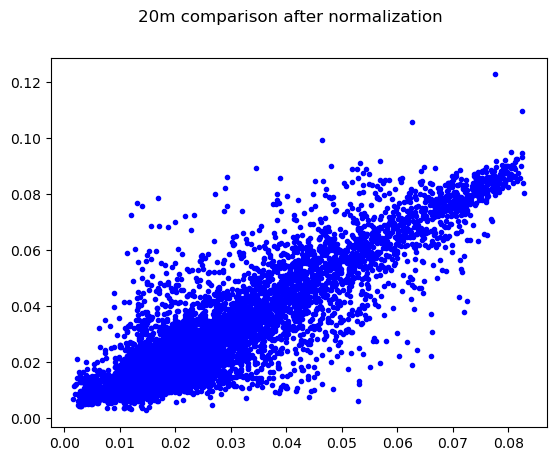

20m After norm {'B4_norm_RMSE': 0.00595307184653811, 'B4_norm_SSIM': 0.7080172756895433, 'B4_norm_R2': 0.8336545360691923}
-------------------------------------------------------------------------------------------------------------
Band B5
RMSE: 0.04536095905011892 SSIM: 0.6348333392973015 R2: -9.38615429387261 60m before Norm
TheilslopesResult(slope=0.5770448069461012, intercept=-0.0032229703511830604, low_slope=0.5679326936786556, high_slope=0.5860992829109907) B_reg2
***************************************************************************************************************************


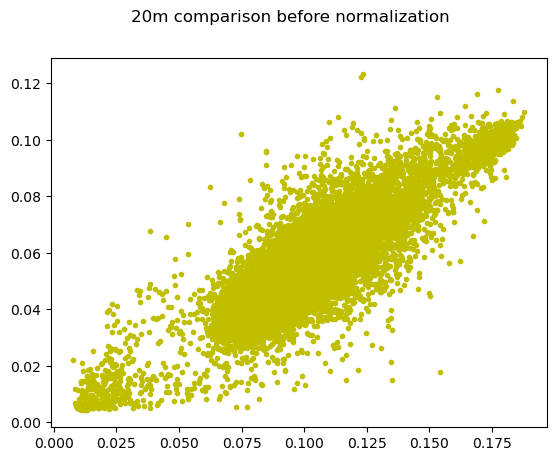

20m before Norm {'B5_RMSE': 0.045882946160992304, 'B5_SSIM': 0.555180452291037, 'B5_R2': -7.49461708580948}


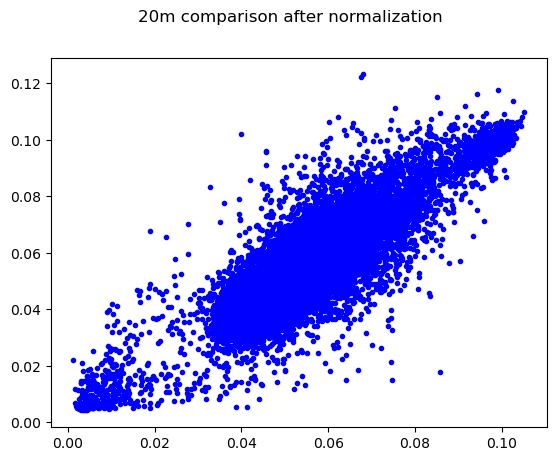

20m After norm {'B5_norm_RMSE': 0.007902644509169634, 'B5_norm_SSIM': 0.6082083406032499, 'B5_norm_R2': 0.7480083753692957}
-------------------------------------------------------------------------------------------------------------
Band B6
RMSE: 0.12151373937563234 SSIM: 0.6570858359855641 R2: -11.379946036813765 60m before Norm
TheilslopesResult(slope=0.6010011529229922, intercept=-0.011137899573160165, low_slope=0.5923870152660782, high_slope=0.6098217786626613) B_reg2
***************************************************************************************************************************


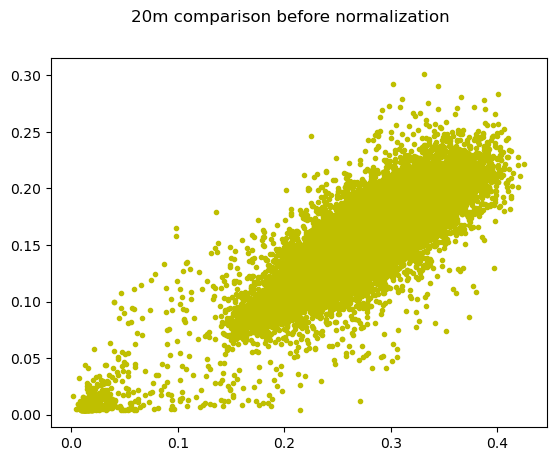

20m before Norm {'B6_RMSE': 0.12286402553876136, 'B6_SSIM': 0.5367815401859579, 'B6_R2': -9.493711990882021}


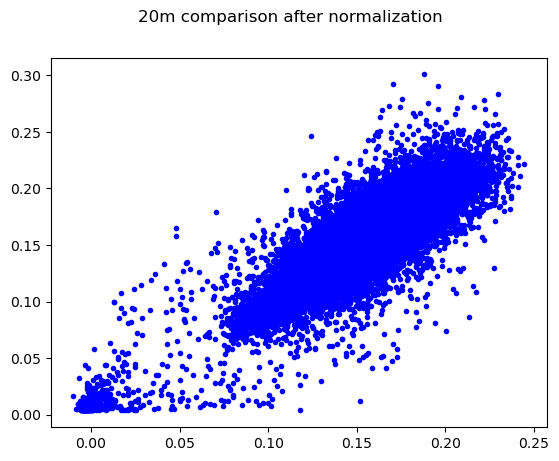

20m After norm {'B6_norm_RMSE': 0.019382683136171565, 'B6_norm_SSIM': 0.5723418859305474, 'B6_norm_R2': 0.7388395239766671}
-------------------------------------------------------------------------------------------------------------
Band B7
RMSE: 0.13418560478111435 SSIM: 0.6881801812376226 R2: -8.42554087186294 60m before Norm
TheilslopesResult(slope=0.634559359436353, intercept=-0.015233215537701489, low_slope=0.6262810094982174, high_slope=0.6429482221490772) B_reg2
***************************************************************************************************************************


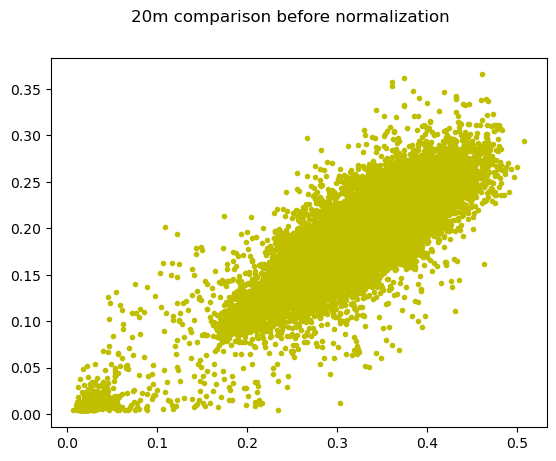

20m before Norm {'B7_RMSE': 0.13590784460401906, 'B7_SSIM': 0.5611363739530169, 'B7_R2': -7.000769470974918}


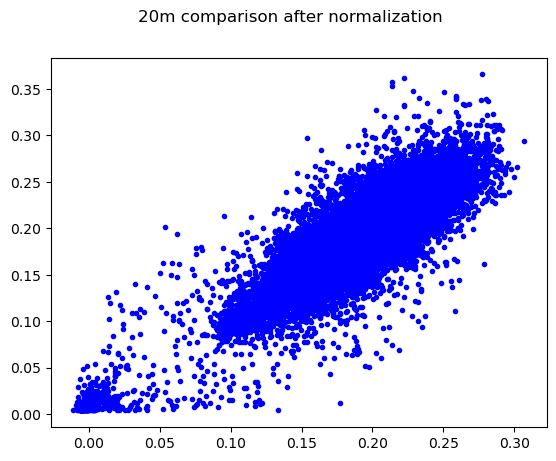

20m After norm {'B7_norm_RMSE': 0.023442607986161258, 'B7_norm_SSIM': 0.5892956467628403, 'B7_norm_R2': 0.761957469884595}
-------------------------------------------------------------------------------------------------------------
Band B8
RMSE: 0.1378206843465142 SSIM: 0.6915402555559045 R2: -8.118507556754752 60m before Norm
TheilslopesResult(slope=0.6362901640539409, intercept=-0.01291511180896715, low_slope=0.6279925378366782, high_slope=0.64474476500044) B_reg2
***************************************************************************************************************************


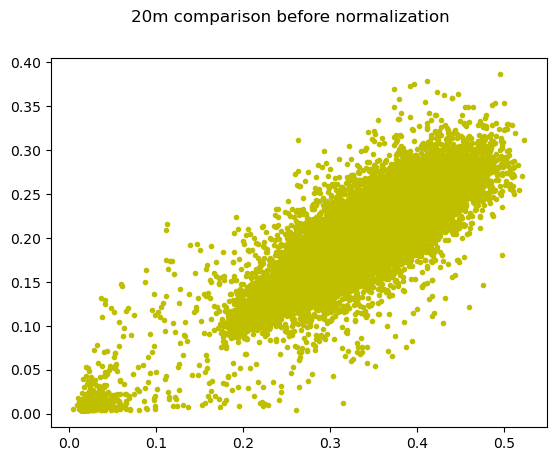

20m before Norm {'B8_RMSE': 0.13988830391502158, 'B8_SSIM': 0.5392306211715465, 'B8_R2': -6.775783256170653}


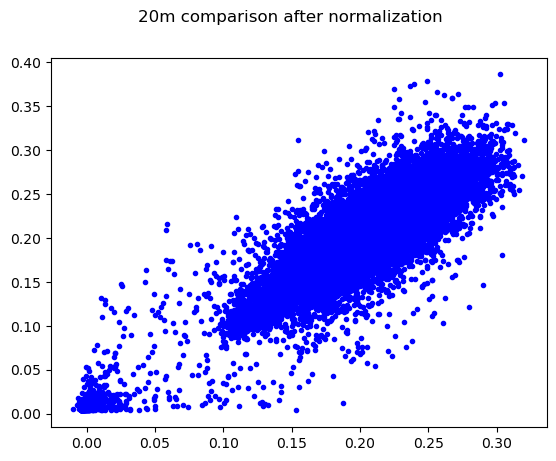

20m After norm {'B8_norm_RMSE': 0.02536104012352261, 'B8_norm_SSIM': 0.5674927341890509, 'B8_norm_R2': 0.7444267123960466}
-------------------------------------------------------------------------------------------------------------
Band B8A
RMSE: 0.12083415715555808 SSIM: 0.7292022486247627 R2: -4.9383259088921925 60m before Norm
TheilslopesResult(slope=0.702955642668139, intercept=-0.01771200379403698, low_slope=0.6934326905765508, high_slope=0.7125540566403313) B_reg2
***************************************************************************************************************************


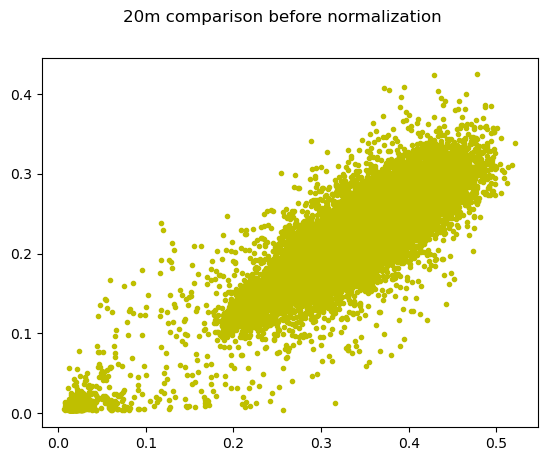

20m before Norm {'B8A_RMSE': 0.12289214409821356, 'B8A_SSIM': 0.5797279126418986, 'B8A_R2': -4.090740538543502}


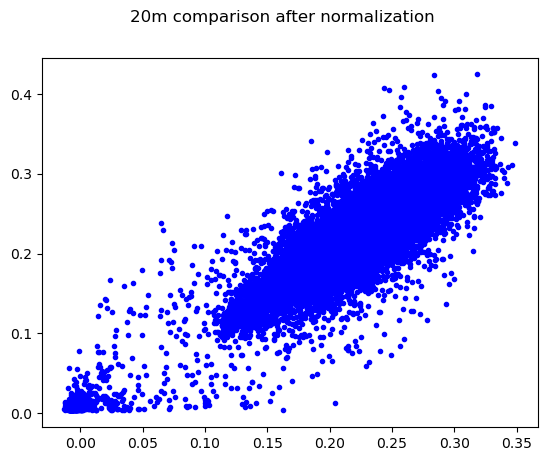

20m After norm {'B8A_norm_RMSE': 0.026803022905154274, 'B8A_norm_SSIM': 0.5807749850064317, 'B8A_norm_R2': 0.7578411893598674}
-------------------------------------------------------------------------------------------------------------
Band B11
RMSE: 0.08167945389502101 SSIM: 0.6705698611251839 R2: -6.31642166528513 60m before Norm
TheilslopesResult(slope=0.6180963605232463, intercept=-0.00661006632804402, low_slope=0.6086203080522985, high_slope=0.6276628747221807) B_reg2
***************************************************************************************************************************


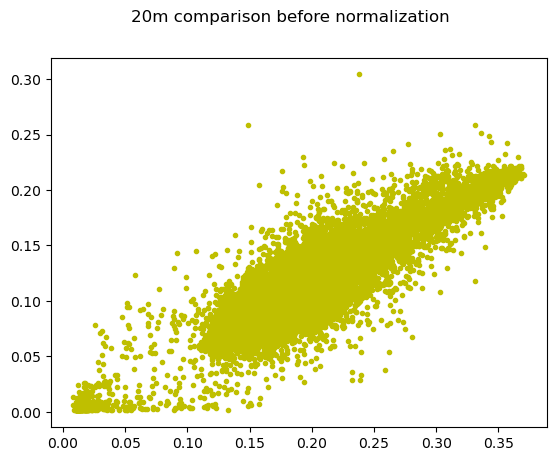

20m before Norm {'B11_RMSE': 0.08251024426246203, 'B11_SSIM': 0.5832545256006002, 'B11_R2': -4.926197894951647}


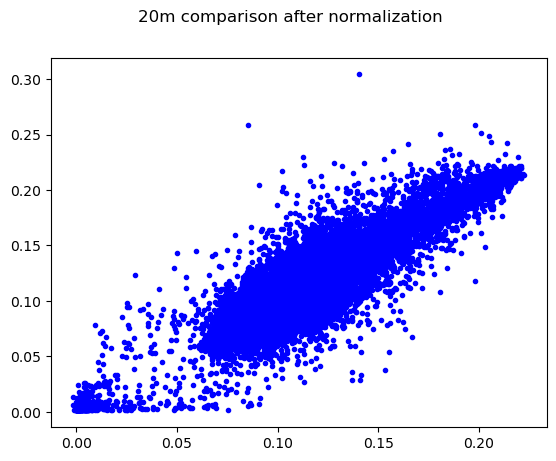

20m After norm {'B11_norm_RMSE': 0.01663043320155246, 'B11_norm_SSIM': 0.6015182996077076, 'B11_norm_R2': 0.7592493165656736}
-------------------------------------------------------------------------------------------------------------
Band B12
RMSE: 0.039857116088719266 SSIM: 0.7218324317772278 R2: -1.3401338030765992 60m before Norm
TheilslopesResult(slope=0.6427068425261458, intercept=-0.002485535390999022, low_slope=0.6318871567888958, high_slope=0.6532394822607649) B_reg2
***************************************************************************************************************************


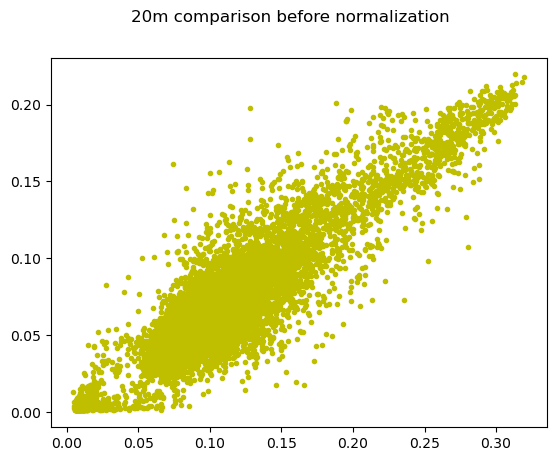

20m before Norm {'B12_RMSE': 0.04079014682526499, 'B12_SSIM': 0.662982395883426, 'B12_R2': -0.9337375819721228}


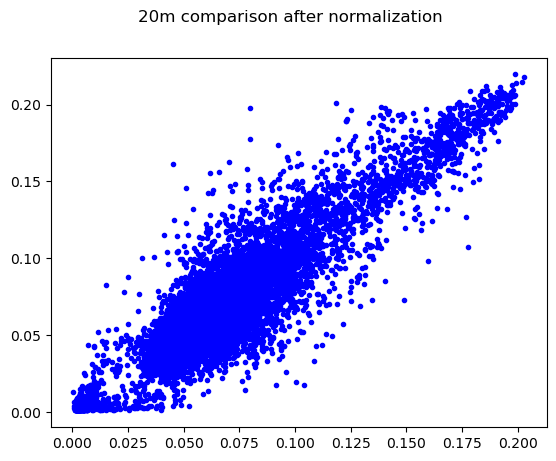

20m After norm {'B12_norm_RMSE': 0.012428874607511745, 'B12_norm_SSIM': 0.6759624387489866, 'B12_norm_R2': 0.820464385014165}
-------------------------------------------------------------------------------------------------------------
{'site': 'STEI', 'B2_slope': 0.5455423266656938, 'B2_intercept': -0.00044218414733486824, 'B3_slope': 0.5496368248714133, 'B3_intercept': 0.00023666291235713982, 'B4_slope': 0.559142508064977, 'B4_intercept': -0.0024054133431456355, 'B5_slope': 0.5770448069461012, 'B5_intercept': -0.0032229703511830604, 'B6_slope': 0.6010011529229922, 'B6_intercept': -0.011137899573160165, 'B7_slope': 0.634559359436353, 'B7_intercept': -0.015233215537701489, 'B8_slope': 0.6362901640539409, 'B8_intercept': -0.01291511180896715, 'B8A_slope': 0.702955642668139, 'B8A_intercept': -0.01771200379403698, 'B11_slope': 0.6180963605232463, 'B11_intercept': -0.00661006632804402, 'B12_slope': 0.6427068425261458, 'B12_intercept': -0.002485535390999022}
{'site': 'STEI', 'B2_RMSE': 0.01

In [8]:
## individual site process using thresholding due to the size not exact same for NEON and S2 after resampling
# site=file.split('_')[2]
site='STEI'
print (site)
# NEON_10m=NEON_dir+file
S2_20m=S2_dir+'S2_20m_'+site+'.tif'
NEON_60m=NEON_dir+'NEON_60m_'+site+'.tif'
NEON_20m=NEON_dir+'NEON_20m_'+site+'.tif'
S2_20m=S2_dir+'S2_20m_'+site+'.tif'
S2_60m=S2_dir+'S2_60m_'+site+'.tif'
print (S2_20m)
# print (NEON_10m)
print (S2_60m)
print (NEON_60m)
## generate 60m file to smooth the image
# raster_rprj1 = gdal.Warp(NEON_60m, NEON_10m, xRes=60, yRes=60, resampleAlg = "average")
# raster_rprj1 = None

# raster_rprj = gdal.Warp(S2_60m, S2_20m, xRes=60, yRes=60, resampleAlg = "average")
# raster_rprj = None
## open 60m file
ds_S2_60m = gdal.Open(S2_60m)
ds_S2_20m = gdal.Open(S2_20m)
ds_NEON_60m = gdal.Open(NEON_60m)
ds_NEON_20m = gdal.Open(NEON_20m)

## get the site name, like 'ABBY'
s_linear={'site': site}  
s_stats={'site': site}
s_norm_stats={'site': site}
for ind in bands_related:      

    ## get the band name and the corresponding band number in the image file, like B2, NEON:2, S2:1, the index starting from 1
    bandname=ind['band']
    NEON_ind=ind['NEON']
    S2_ind=ind['S2'] 
    
    print ('Band', bandname)

    ### get each band from the S2 and NEON files
    S2_B=np.array(ds_S2_60m.GetRasterBand(S2_ind).ReadAsArray())
    NEON_B=np.array(ds_NEON_60m.GetRasterBand(NEON_ind).ReadAsArray())
    
    # print (S2_B.shape, 'S2')
    # print (NEON_B.shape,'NEON')

    S2_B = np.where(S2_B==-9999, np.nan, S2_B)
    NEON_B = np.where(NEON_B==-9999, np.nan, NEON_B)
    S2_B=S2_B/10000

    NEON_B_2=NEON_B[:S2_B.shape[0],:S2_B.shape[1]]
    
    mask = ~np.isnan(S2_B) & ~np.isnan(NEON_B_2)
    NEON_B_mask = NEON_B_2[mask]
    S2_B_mask = S2_B[mask]
    # scipy.stats.theilslopes(y, x=None, alpha=0.95, method='separate')
    # Method to be used for computing estimate for intercept. Following methods are supported,
    # ‘joint’: Uses np.median(y - slope * x) as intercept.
    # ‘separate’: Uses np.median(y) - slope * np.median(x) as intercept.
    # The default is ‘separate’.
    # B3_reg = stats.theilslopes(S2_B3_mask, NEON_B3_mask, 0.90, 'joint')
    # B_reg = stats.theilslopes(NEON_B_mask,S2_B_mask, 0.90, 'joint')
    B_reg = stats.theilslopes(NEON_B_mask,S2_B_mask,0.95, 'joint')

    ## generate a dictionary to output the coefficient of linear regression           
    key_slope=bandname+'_slope'
    key_intercept=bandname+'_intercept'
    # print (bandname, NEON_ind, S2_ind) 
    # s2={bandname:{'slope': NEON_ind, 'intercept':S2_ind}}
#     s2={key_slope: B_reg[0], key_intercept:B_reg[1]}         
#     s_linear.update(s2)
    
#     ## calculate stats before normalization
    
    key_rmse=bandname+'_RMSE'
    key_ssim=bandname+'_SSIM'
    key_r2=bandname+'_R2'
    
    # mean_squared_error(y_actual, y_predicted, squared=False)
    RMSE = mean_squared_error(NEON_B_mask,S2_B_mask,squared=False) 
    ## ssim
    # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
    SSIM = ssim(NEON_B_mask,S2_B_mask,data_range=(S2_B_mask.max()-S2_B_mask.min())) 
    ## R2
    # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    R2 = r2_score(NEON_B_mask,S2_B_mask)
#     s3={key_rmse: RMSE,  key_ssim:SSIM, key_r2:R2}   
#     s_stats.update(s3)     
    print ('RMSE:',RMSE, 'SSIM:',SSIM, 'R2:',R2, '60m before Norm')
    
     ### normalizing 60m    
    S2_B_60m_norm=S2_B_mask*B_reg[0]+B_reg[1]
    ### get the difference between neon and the normalized 60m S2
    S2_60m_bias=np.subtract(NEON_B_mask,S2_B_60m_norm)
    S2_60m_bias_mean=np.nanmean(S2_60m_bias)
    S2_60m_bias_std=np.nanstd(S2_60m_bias)
  
    thresh1=S2_60m_bias_mean+2*S2_60m_bias_std
    thresh2=S2_60m_bias_mean-2*S2_60m_bias_std
    # print (thresh1, 'thresh1')
    # print (thresh2, 'thresh2')
    S2_B_mask = np.where((S2_60m_bias>thresh1)|(S2_60m_bias<thresh2), np.nan, S2_B_mask)
    NEON_B_mask = np.where((S2_60m_bias>thresh1)|(S2_60m_bias<thresh2), np.nan, NEON_B_mask)
    # # S2_B=S2_B/10000
    # print (S2_B_mask)
    mask2 = ~np.isnan(S2_B_mask)
    S2_B_mask2=S2_B_mask[mask2]
    NEON_B_mask2=NEON_B_mask[mask2]
    B_reg2 = stats.theilslopes(NEON_B_mask2,S2_B_mask2)
    print (B_reg2, 'B_reg2')
    
    s2={key_slope: B_reg2[0], key_intercept:B_reg2[1]}         
    s_linear.update(s2)
    print ('***************************************************************************************************************************')
    ## used the new regression coefficients for normalizing 20m S2  
    
   
    NEON_B_20m=np.array(ds_NEON_20m.GetRasterBand(NEON_ind).ReadAsArray())   
    S2_B_20m=np.array(ds_S2_20m.GetRasterBand(S2_ind).ReadAsArray())  
    # print (NEON_B_20m.shape,'NEON_20m')
    # print (S2_B_20m.shape,'S2_20m')
    
    S2_B_20m = np.where(S2_B_20m==-9999, np.nan, S2_B_20m)
    NEON_B_20m = np.where(NEON_B_20m==-9999, np.nan, NEON_B_20m)
    S2_B_20m=S2_B_20m/10000
    
    NEON_B_20m_2=NEON_B_20m[:S2_B_20m.shape[0],:S2_B_20m.shape[1]]  
    mask = ~np.isnan(S2_B_20m) & ~np.isnan(NEON_B_20m_2)
    NEON_B_20m_mask = NEON_B_20m_2[mask]
    S2_B_20m_mask = S2_B_20m[mask]
    
     ##########################################################
    
    fig0 = plt.figure()
    fig0.suptitle('20m comparison before normalization')
    ax = fig0.add_subplot(111)
    # ax.plot( NEON_B3_mask, S2_B3_mask, 'b.')
    # ax.plot( NEON_B3_mask, B3_reg[1] +B3_reg[0] * NEON_B3_mask, 'r-')
    ax.plot(S2_B_20m_mask, NEON_B_20m_mask, 'y.')
    # ax.plot(S2_B3_mask, B3_reg[1] +B3_reg[0] *  S2_B3_mask, 'r-')
    plt.show()
    
    # mean_squared_error(y_actual, y_predicted, squared=False)
    RMSE = mean_squared_error(NEON_B_20m_mask,S2_B_20m_mask,squared=False) 
    ## ssim
    # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
    SSIM = ssim(NEON_B_20m_mask,S2_B_20m_mask,data_range=(S2_B_20m_mask.max()-S2_B_20m_mask.min())) 
    ## R2
    # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    R2 = r2_score(NEON_B_20m_mask,S2_B_20m_mask)
    
    # print ('RMSE:',RMSE, 'SSIM:',SSIM, 'R2:',R2, '20m before Norm')
    
    s3={key_rmse: RMSE,  key_ssim:SSIM, key_r2:R2}   
    s_stats.update(s3)
    
    print ('20m before Norm',s3)     
    
    S2_B_norm=S2_B_20m_mask*B_reg2[0]+B_reg2[1]
    
    fig = plt.figure()
    fig.suptitle('20m comparison after normalization')
    ax = fig.add_subplot(111)
    # ax.plot( NEON_B3_mask, S2_B3_mask, 'b.')
    # ax.plot( NEON_B3_mask, B3_reg[1] +B3_reg[0] * NEON_B3_mask, 'r-')
    ax.plot(S2_B_norm,NEON_B_20m_mask, 'b.')
    # ax.plot(S2_B3_mask, B3_reg[1] +B3_reg[0] *  S2_B3_mask, 'r-')
    plt.show()
      ## nomalize statistics
    key_norm_rmse=bandname+'_norm_RMSE'
    key_norm_ssim=bandname+'_norm_SSIM'
    key_norm_r2=bandname+'_norm_R2'
    
    # mean_squared_error(y_actual, y_predicted, squared=False)
    RMSE = mean_squared_error(NEON_B_20m_mask,S2_B_norm,squared=False) 
    ## ssim
    # skimage.metrics.structural_similarity(im1, im2, *, win_size=None, gradient=False, data_range=None, channel_axis=None, gaussian_weights=False, full=False, **kwargs)
    SSIM = ssim(NEON_B_20m_mask,S2_B_norm,data_range=(S2_B_norm.max()-S2_B_norm.min())) 
    ## R2
    # sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    R2 = r2_score(NEON_B_20m_mask,S2_B_norm)
    s4={key_norm_rmse: RMSE,  key_norm_ssim:SSIM, key_norm_r2:R2}   
    s_norm_stats.update(s4)
    print ('20m After norm',s4)
    print ('-------------------------------------------------------------------------------------------------------------')
    
print (s_linear)
print (s_stats)
print (s_norm_stats)

In [6]:
## combine dictionaries
# rows_list.append(s1)
rows_list_stats.append(s_stats)
rows_list_norm_stats.append(s_norm_stats)
rows_list_linear.append(s_linear)

# make a dataframe
df_stats = pd.DataFrame(rows_list_stats)  
df_norm_stats = pd.DataFrame(rows_list_norm_stats)  
df_linear = pd.DataFrame(rows_list_linear) 
df_stats.to_csv('stats4.csv')       
df_linear.to_csv('linear4.csv') 
df_norm_stats.to_csv('norm4.csv') 